Input Sensitivity and Transferability of Performance Prediction Models of Configurable Systems
--
Case study: x264 video encoder 

Note: the following Python script should be located in x264-inputsensitivity to have a relative access to data.  
Between operating systems, videos datasets are not imported in the same order, hence an explicit and exhaustive ordered list of data in the beginning of the import 

In [34]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing

## We are studying two quantitative/performance properties: 
# elapsed time
# and size of the output 
# we have two distinct datasets for both

predDimension = "elapsedtime" # "size" # 
    
### It is simple/convenient to fix the "order" of dataset once and for all 
# (listing can be sensitive to eg an operating system)
### if you want you can use this method
#dataFolder="./datay4m" 
#listeAdresse = []
#adresseIni = os.listdir(dataFolder)
#for video in adresseIni: 
#    listeRep = os.listdir(dataFolder + "/" + video)
#    for rep in listeRep:
#        listeAdresse.append(dataFolder + "/" + video + "/" + rep)

# dataFolder="./datacalda" 
# all processing using the same exact cluster on IGRIDA (calda) and video format (y4m)
# (experiments suggest that hardware or video format does influence execution time)

dataTimeFolder = './datacalda2/'
dataSizeFolder = './datay4m2/'

def mkDataTime(): 
    return [dataTimeFolder + 'x264-1908-bridgefar-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-ice-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-flower-wasm/x264-results1.csv',
# './datacalda/x264-0408-tos3k-wasm/x264-results1.csv', # can't retrieve the original video
 dataTimeFolder + 'x264-1908-caire-wasm/x264-results1.csv',
# './datacalda/x264-0308-sintel-wasm/x264-results1.csv', # same as calda for time
 dataTimeFolder + 'x264-0208-sintel-calda-wasm/x264-results1.csv', # representative video, right? 
 dataTimeFolder + 'x264-1908-footballcif-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0308-crowd_run-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0608-blue-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0608-people-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-sunflowers-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0408-deadline-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-2108-bridgeclose-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-husky-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-tennis-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-riverbed-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0608-park-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0508-soccer-wasm/x264-results1.csv']

# dataFolder="./datay4m"
# all processing using the same video format (y4m) 
# (experiments confirm that hardware/cluster does not change anything about the size)
def mkDataSize(): 
    return [dataSizeFolder + 'x264-1908-akiyo-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-bridgefar-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-football15-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0608-tractor-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-ice-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-students-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-flower-wasm/x264-results1.csv',
# './datay4m/x264-0408-tos3k-wasm/x264-results1.csv', # can't retrieve the original video
 dataSizeFolder + 'x264-1908-caire-wasm/x264-results1.csv',
# './datay4m/x264-0308-sintel-wasm/x264-results1.csv', # same as calda for size
 dataSizeFolder + 'x264-0208-sintel-calda-wasm/x264-results1.csv', # representative video, right? 
 dataSizeFolder + 'x264-0308-ducks-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-footballcif-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0308-crowd_run-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0608-blue-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0608-people-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-sunflowers-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-2108-netflix-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0408-deadline-wasm/x264-results1.csv',
# './datay4m/x264-0208-crowd_run-bermuda-wasm/x264-results1.csv', # same as crowd above
 dataSizeFolder + 'x264-2108-bridgeclose-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-husky-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-waterfall-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0308-mobilesif-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-tennis-wasm/x264-results1.csv',
 # './datay4m/x264-0408-football-wasm/x264-results1.csv', # same as football15
 dataSizeFolder + 'x264-1908-riverbed-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0608-park-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0508-soccer-wasm/x264-results1.csv']
 
# the key idea is to have in the *same order* video (for the size dataset or the time dataset)
# ie each "common" video will have the same "identifier"
def mkData(): 
    
    sizeAlignment = [x.replace(dataSizeFolder, '') for x in mkDataSize()]
    timeAlignment = [x.replace(dataTimeFolder, '') for x in mkDataTime()]
    common = []
    for s in sizeAlignment: 
        if s in timeAlignment:
            common.append(s)    
            
    common = np.sort(common)

    specificSize = []
    for s in sizeAlignment: 
        if s not in timeAlignment:
            specificSize.append(s)

    specificSize = np.sort(specificSize)
            
    # unnecessary 
    specificTime = []
    for t in timeAlignment: 
        if t not in sizeAlignment:
            specificTime.append(t)

    # time datas are subsets of size datas
    assert(len(specificSize) + len(common) == len(sizeAlignment))
    assert (len(specificTime) == 0)
    
    if predDimension == "size":     # mkDataSize()
        return list(map(lambda s: dataSizeFolder + s, np.append(common, specificSize)))
    elif predDimension == "elapsedtime":     #mkDataTime() 
        return list(map(lambda s: dataTimeFolder + s, np.append(common, specificTime)))
    else: 
        print("Error (pred dimension unknown)")

listeAdresse = mkData() # mkDataTime() #
if predDimension == "size":
    assert(len(listeAdresse) == len(mkDataSize()))
elif predDimension == "elapsedtime":
    assert(len(listeAdresse) == len(mkDataTime()))
#print(np.sort(mkDataSize()))
#print(np.sort(mkDataTime()))

#print(np.intersect1d(mkDataSize(), mkDataTime()))


        
# creation of the list of videos (for each video: x264 configurations + measurements)
listeVideo = []
for adresse in listeAdresse:
    listeVideo.append(pd.read_csv(open(adresse,"r")))
# test
print("There are " + str(len(listeVideo)) + " videos")
assert (len(listeAdresse) == len(listeVideo))
listeAdresse
#vidEx = listeVideo[0][0:5]
#vidEx.drop(['usertime', 'systemtime'], axis=1)
#pd.DataFrame(listeVideo[2])#['elapsedtime']


##### NORMALIZATION 
#X = []
#for i in range(len(listeVideo)):
#    X.append(listeVideo[i][predDimension])

#norms = pd.DataFrame(preprocessing.normalize(X, norm='max')).transpose()
#for i in range(len(listeVideo)):
#    listeVideo[i][predDimension] = norms[i]
    
## example
#listeVideo[1].drop(['size', 'usertime', 'systemtime', 'H264', 'no_asm', 'configurationID'], axis=1)

listeVideo[7].drop(['no_8x8dct', 'no_deblock', 'no_mixed_refs', 'no_weightb', 'size', 'usertime', 'systemtime', 'H264', 'no_asm', 'configurationID'], axis=1)



There are 17 videos


,no_cabac,no_fast_pskip,no_mbtree,rc_lookahead,ref,elapsedtime
0,False,True,False,20,9,3.1876
1,True,True,False,40,9,4.5942
2,False,False,True,40,1,2.4482
3,True,True,True,40,9,3.4714
4,False,False,False,60,5,3.0110
5,True,True,False,60,5,3.8668
6,False,False,False,60,1,2.6088
7,True,True,False,60,1,2.5650
8,False,True,False,60,1,2.3302
9,False,True,False,60,9,5.0076


In [33]:
import pandas as pd
# excerpt of data 
# works for predDimension = elapsedtime 
def mkPredColumnName(eVideo):
    return predDimension + " (video " + str(eVideo) + ")" 
    

eVideo1 = 7
eVideo2 = 1
print(pd.concat([pd.DataFrame(listeVideo[eVideo1]).rename(columns={predDimension: mkPredColumnName(eVideo1)})
           
           , pd.DataFrame(listeVideo[eVideo2][predDimension]).rename(columns={predDimension: mkPredColumnName(eVideo2)})], axis=1).filter(['configurationID', 'no_cabac', 'no_mixed_refs', 'no_deblock', 'no_mbtree', 'ref', 'rc_lookahead', mkPredColumnName(eVideo1), mkPredColumnName(eVideo2)]).sort_values(by=['configurationID'])[:10].reset_index(drop = True).to_latex(index=False))


\begin{tabular}{rllllrrrr}
\toprule
 configurationID &  no\_cabac &  no\_mixed\_refs &  no\_deblock &  no\_mbtree &  ref &  rc\_lookahead &  elapsedtime (video 7) &  elapsedtime (video 1) \\
\midrule
               1 &     False &           True &        True &      False &    9 &            20 &                 3.1876 &              13.631667 \\
               2 &     False &           True &        True &      False &    5 &            20 &                 2.4930 &              10.048000 \\
               3 &      True &           True &       False &       True &    5 &            60 &                 3.3454 &               9.361000 \\
               4 &      True &           True &       False &       True &    1 &            60 &                 2.7352 &               7.567000 \\
               5 &      True &          False &        True &       True &    9 &            40 &                 5.8700 &              15.668333 \\
               6 &     False &          False &        

In [3]:
import matplotlib.pyplot as plt
from scipy import stats


def plotCorrelationVideo(v1ID, v2ID,plot=True):
    video1 = listeVideo[v1ID][:]
    video2 = listeVideo[v2ID][:]
    v1 = video1[predDimension]
    v2 = video2[predDimension]
    
    if plot:
        fig = plt.figure()
        plt.scatter(v1,v2)   
        slope, intercept, r_value, p_value, std_err = stats.linregress(v1, v2)
        plt.plot(v1,slope*v1+intercept,color="black")   
        plt.xlabel("Video %d (%s)" % (v1ID, predDimension))
        plt.ylabel("Video %d (%s)" % (v2ID, predDimension))
        fig.savefig("correlation-v" + str(v1ID) + "v" + str(v2ID) + ".pdf", format="pdf", bbox_inches='tight')
    return np.corrcoef(v1,v2)[0,1]

if (predDimension == "elapsedtime"):
    v1ID = 1
    v2ID = 7
elif (predDimension == "size"):
    v1ID = 1
    v2ID = 7
    
plotCorrelationVideo(v1ID, v2ID, plot=True)



0.8331501375715294

Correlation matrix (Pearson and Spearman)
--

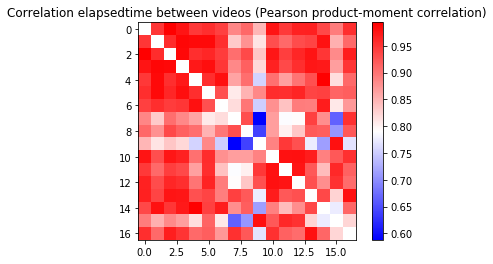

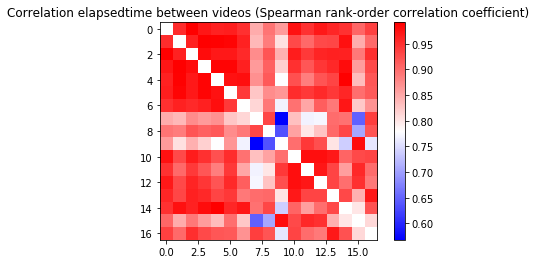

Difference between Spearman and Pearson (elapsedtime ):  (min) nan (max) nan (std) nan 
Min, max, std, mean of Pearson (elapsedtime) :  0.59 0.99 0.08 0.90
Min, max, std, mean of Spearman (elapsedtime) :  0.57 0.99 0.08 0.90


/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


<Figure size 432x288 with 0 Axes>

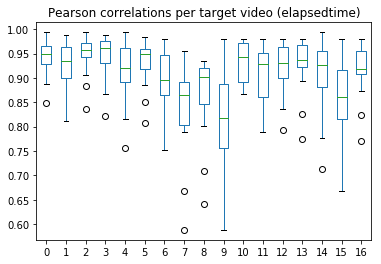

<Figure size 432x288 with 0 Axes>

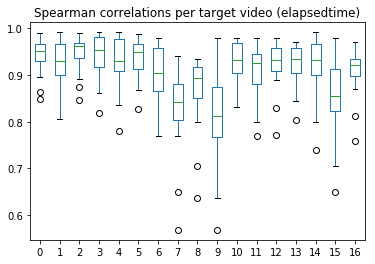

<Figure size 432x288 with 0 Axes>

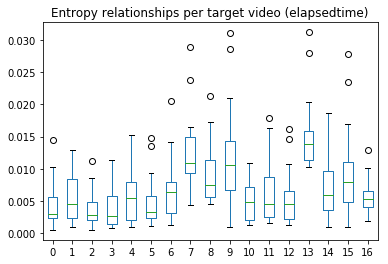

0 with 2 (0.991217807926087 ) // Spearman
0 with 2 (0.9936781455218427) // Pearson
0 with 2 (0.0005183675332552749) // Entropy
1 with 3 (0.9918193945625379 ) // Spearman
1 with 3 (0.9873408571988513) // Pearson
1 with 3 (0.0009647764924765466) // Entropy
2 with 0 (0.991217807926087 ) // Spearman
2 with 0 (0.9936781455218427) // Pearson
2 with 0 (0.0005217475525325665) // Entropy
3 with 1 (0.991819394562538 ) // Spearman
3 with 1 (0.9873408571988513) // Pearson
3 with 2 (0.0008080969867381398) // Entropy
4 with 14 (0.9917463637039651 ) // Spearman
4 with 14 (0.9933801096402197) // Pearson
4 with 14 (0.0009442870169933725) // Entropy
5 with 3 (0.9879878359956121 ) // Spearman
5 with 1 (0.9842887754697622) // Pearson
5 with 1 (0.0010720338307294063) // Entropy
6 with 4 (0.9788425606208199 ) // Spearman
6 with 4 (0.9806807859839762) // Pearson
6 with 4 (0.0012286070851946279) // Entropy
7 with 16 (0.9401882247678156 ) // Spearman
7 with 16 (0.9548038652509021) // Pearson
7 with 16 (0.00437

In [4]:
from scipy import stats 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sc

from numpy import *

# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html

nbVideos = len(listeVideo)

#corrUserTime = [[0 for x in range(nbVideos)] for y in range(nbVideos)]
#corrElap= [[0 for x in range(nbVideos)] for y in range(nbVideos)]
# corrElapSpearman= [[0 for x in range(nbVideos)] for y in range(nbVideos)]
#corrSys= [[0 for x in range(nbVideos)] for y in range(nbVideos)]

#corrTaille = [[0 for x in range(nbVideos)] for y in range(nbVideos)]
#corrTailleSpearman = [[0 for x in range(nbVideos)] for y in range(nbVideos)]


corrPearson= [[0 for x in range(nbVideos)] for y in range(nbVideos)] 
corrSpearman= [[0 for x in range(nbVideos)] for y in range(nbVideos)] # rank-based 
corrEntropy = [[0 for x in range(nbVideos)] for y in range(nbVideos)]


# pour chaque vidéo, on calcule sa corrélation (Pearson) avec toutes les autres

for i in range(nbVideos):
    for j in range(nbVideos):
        if (i == j):
            corrPearson[i][j] = NaN
            corrSpearman[i][j] = NaN
            corrEntropy[i][j] = NaN
        #corrUserTime[i][j] = np.corrcoef(listeVideo[i].usertime,listeVideo[j].usertime)[0,1]
        #corrSys[i][j] = np.corrcoef(listeVideo[i]['systemtime'],listeVideo[j]['systemtime'])[0,1]
        else:
            corrPearson[i][j] = np.corrcoef(listeVideo[i][predDimension],listeVideo[j][predDimension])[0,1]
            corrSpearman[i][j] = stats.spearmanr(listeVideo[i][predDimension],listeVideo[j][predDimension]).correlation
            corrEntropy[i][j] = sc.entropy(pk=listeVideo[i][predDimension],
                                       qk=listeVideo[j][predDimension])
       # corrElap[i][j] = np.corrcoef(listeVideo[i]['elapsedtime'],listeVideo[j]['elapsedtime'])[0,1]
       # corrElapSpearman[i][j] = stats.spearmanr(listeVideo[i]['elapsedtime'],listeVideo[j]['elapsedtime']).correlation
       # corrTaille[i][j] = np.corrcoef(listeVideo[i]['size'],listeVideo[j]['size'])[0,1]
       # corrTailleSpearman[i][j] = stats.spearmanr(listeVideo[i]['size'],listeVideo[j]['size']).correlation 

#plt.imshow(corrUserTime,cmap='Reds',interpolation='nearest')
#plt.title('Correlations (user time) between videos (Pearson product-moment correlation)')
#plt.colorbar()
#plt.show()
#print("Les coefficicients des temps utilisateurs sont très corrélés, les coef. sont souvent > 0.8")
#print("C'est bon signe, on doit pourvoir trouver des paramètres optimaux")
#rint("communs à toutes les vidéos pour diminuer les temps users")

plt.imshow(corrPearson,cmap='bwr',interpolation='nearest')
plt.title('Correlation ' + predDimension + ' between videos (Pearson product-moment correlation)')
plt.colorbar()
plt.show()
#print("Les temps écoulés sont également fortement correlés entre les vidéos")
#print("Mais on peut voir une 'anomalie' dans certaines vidéos")

        
plt.imshow(corrSpearman,cmap='bwr',interpolation='nearest')
plt.title('Correlation ' + predDimension + ' between videos (Spearman rank-order correlation coefficient)')
plt.colorbar()
plt.show()

# difference between Spearman and Pearson 
dPS = np.subtract(corrPearson, corrSpearman)
print("Difference between Spearman and Pearson (" + predDimension + " ):  (min) %.2f (max) %.2f (std) %.2f " % (np.min(dPS), np.max(dPS), np.std(dPS)))

# system time (can be future work but cautious: (1) hard to interpret/isolate system time wrt x264); (2) less usable/actionable
#plt.imshow(corrSys,cmap='Reds',interpolation='nearest')
#plt.title('Corrélations des temps systèmes')
#plt.colorbar()
#plt.show()
# print("Les temps système sont moins corrélés linéairement, peut-être un autre type de relation")

      
#plt.imshow(corrTaille,cmap='bwr',interpolation='nearest')
#plt.title('Correlation (sizes) between videos (Pearson)')
#plt.colorbar()
#plt.show()
#print("En revanche, les tailles des vidéos dépendent moins des paramètres d'entrée")
#print("Un paramètre peut donner une bonne qualité pour une vidéo mais une mauvaise pour une autre")
#print("Du coup, l'intérêt, c'est de classifier les vidéos pour comprendre l'influence des paramètres sur leur taille")
    

#plt.imshow(corrTailleSpearman,cmap='bwr',interpolation='nearest') # origin='bottom',
#plt.title('Correlations (sizes) between videos (Spearman)')
#plt.colorbar()
#plt.show()


# no difference between Spearman and Pearson 
#dTaille = np.subtract(corrTaille, corrTailleSpearman)
#print("Negligible difference between Spearman and Pearson:  %.2f %.2f %.2f" % (np.std(dTaille), np.min(dTaille), np.max(dTaille)))

print("Min, max, std, mean of Pearson (" + predDimension + ") :  %.2f %.2f %.2f %.2f" 
      % (np.nanmin(corrPearson), np.nanmax(corrPearson), np.nanstd(corrPearson), np.nanmean(corrPearson)))
print("Min, max, std, mean of Spearman (" + predDimension + ") :  %.2f %.2f %.2f %.2f" 
      % (np.nanmin(corrSpearman), np.nanmax(corrSpearman), np.nanstd(corrSpearman), np.nanmean(corrSpearman)))

plt.figure()
pd.DataFrame(corrPearson).plot.box(title="Pearson correlations per target video (" + str(predDimension) + ")") # abs()
plt.show()

plt.figure()
pd.DataFrame(corrSpearman).plot.box(title="Spearman correlations per target video (" + str(predDimension) + ")") # abs()
plt.show()

plt.figure()
pd.DataFrame(corrEntropy).plot.box(title="Entropy relationships per target video (" + str(predDimension) + ")") # abs()
plt.show()

# print(pd.DataFrame(corrSpearman).describe())
bestLinSourcesSpearman = [0 for x in range(len(listeVideo))]
bestLinSourcesPearson = [0 for x in range(len(listeVideo))]
bestEntroSources = [0 for x in range(len(listeVideo))]
for vi in range(len(listeVideo)):
    print(str(vi) + " with " + str(np.nanargmax(pd.DataFrame(corrSpearman)[vi])) + " (" + str(np.nanmax(pd.DataFrame(corrSpearman)[vi])) + " ) // Spearman") # .abs()
    print(str(vi) + " with " + str(np.nanargmax(pd.DataFrame(corrPearson)[vi])) + " (" + str(np.nanmax(pd.DataFrame(corrPearson)[vi])) + ") // Pearson") # .abs()
    print(str(vi) + " with " + str(np.nanargmin(pd.DataFrame(corrEntropy)[vi])) + " (" + str(np.nanmin(pd.DataFrame(corrEntropy)[vi])) + ") // Entropy") # min for Entropy
  
    bestLinSourcesSpearman[vi] = np.nanargmax(pd.DataFrame(corrSpearman)[vi])
    bestLinSourcesPearson[vi] = np.nanargmax(pd.DataFrame(corrPearson)[vi])
    bestEntroSources[vi] = np.nanargmin(pd.DataFrame(corrEntropy)[vi]) # min for Entropy, since best is closed to 0
    
bestLinearSourcesSpearman = pd.DataFrame(bestLinSourcesSpearman, columns=["best_video_source"])
bestLinearSourcesPearson = pd.DataFrame(bestLinSourcesPearson, columns=["best_video_source"])
bestEntropySources = pd.DataFrame(bestEntroSources, columns=["best_video_source"])

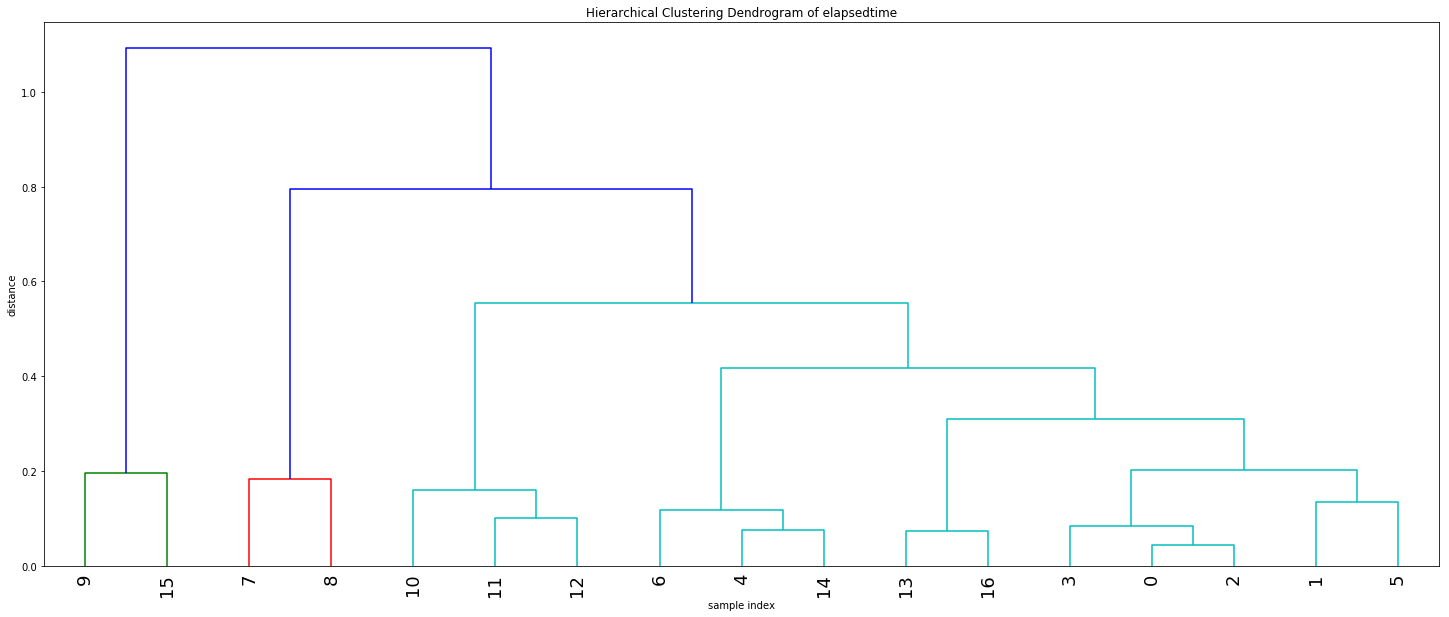

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import MeanShift


corrPearsonN = pd.DataFrame(corrPearson).fillna(1)
dendTime = linkage(corrPearsonN, method='ward')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram of ' + predDimension)
plt.xlabel('sample index')
plt.ylabel('distance')
d = dendrogram(    
    dendTime,    
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=18.,  # font size for the x axis labels
)
d
plt.show()

indicesDimension = d['leaves']

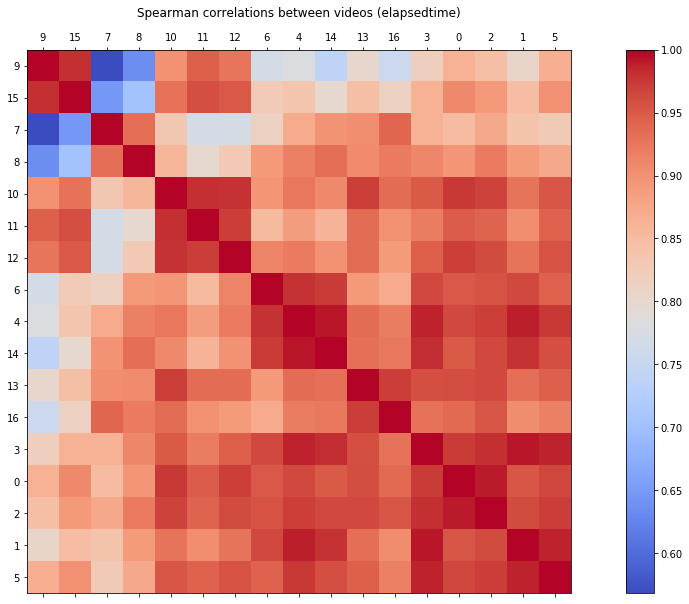

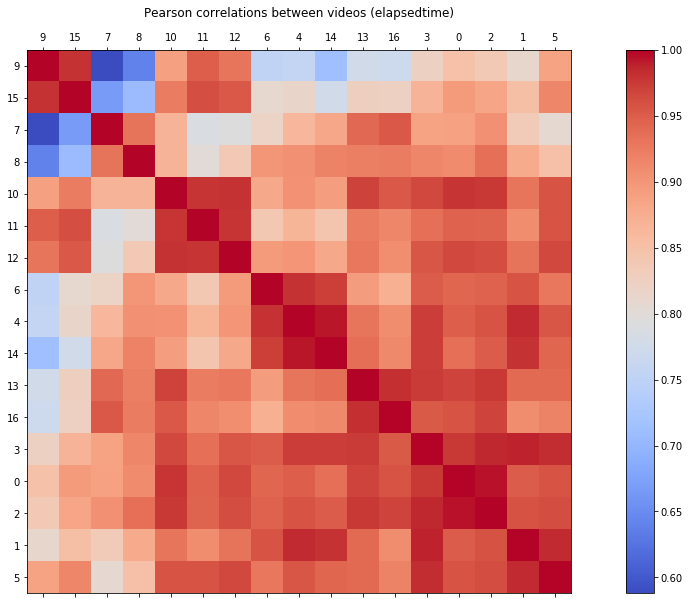

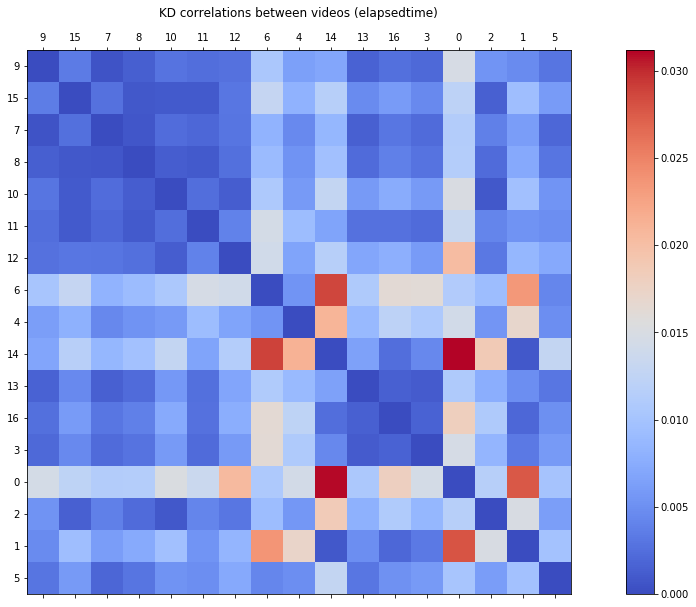

In [6]:
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

from numpy import *
from scipy import stats 
import scipy.stats as sc

taille = len(listeVideo)

listeVideoTri = []

for i in range(len(indicesDimension)):
    indice = indicesDimension[i]
    listeVideoTri.append(listeVideo[indice])
    
corrTri = [[0 for x in range(taille)] for y in range(taille)]
corrTriPearson = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrTriPearson[i][j] = np.corrcoef(listeVideoTri[i][predDimension],listeVideoTri[j][predDimension])[0,1]
        corrTri[i][j] = stats.spearmanr(listeVideoTri[i][predDimension],listeVideoTri[j][predDimension]).correlation

#indicesTemps = [29,31,27,17,0,15,5,16,9,11,19,28,14,26,13,2,20,4,22,33,8,7,30,10,21,25,3,18,1,12,32,24,23,6]

#listeVideoTriTemps= []

#for i in range(len(indicesTemps)):
#    indice = indicesTemps[i]
#    listeVideoTriTemps.append(listeVideo[indice])
    
        
#corrTempsTri = [[0 for x in range(taille)] for y in range(taille)]

#for i in range(taille):
 #   for j in range(taille):
        # corrTempsTri[i][j] = np.corrcoef(listeVideoTriTemps[i]['elapsedtime'],listeVideoTriTemps[j]['elapsedtime'])[0,1]
  #      corrTempsTri[i][j] = stats.spearmanr(listeVideoTriTemps[i]['elapsedtime'],listeVideoTriTemps[j]['elapsedtime']).correlation
             

        
def plot_corr(corr,cm,ind,metric,size):
    fig, ax = plt.subplots(figsize=(size, size))
    fig.set_size_inches(20, 10)
    cax = ax.matshow(corr,cmap=cm) # interpolation='nearest'
    plt.xticks(range(len(ind)), ind)
    plt.yticks(range(len(corr.columns)), ind)
    txt = metric + " correlations between videos (" + predDimension + ")"
    plt.title(txt)
    fig.colorbar(cax)    
    fig.savefig('mat' + metric + 'corr-' + predDimension + '.pdf', format='pdf', dpi=100, bbox_inches='tight')
    plt.show()
    


divKL = [[0 for x in range(len(listeVideo))] for y in range(len(listeVideo))]
for i in range(len(listeVideo)):
    for j in range(len(listeVideo)):
        divKL[i][j] = sc.entropy(pk=listeVideo[i][predDimension],
                                       qk=listeVideo[j][predDimension])




plot_corr(pd.DataFrame(corrTri),'coolwarm', indicesDimension, "Spearman", 6)
plot_corr(pd.DataFrame(corrTriPearson),'coolwarm', indicesDimension, "Pearson", 6)
plot_corr(pd.DataFrame(divKL), 'coolwarm', indicesDimension, "KD", 6)
#plot_corr(pd.DataFrame(corrTempsTri),'Reds',indicesTemps, 'elapsed time')
#pd.DataFrame(corrTempsTri).describe()

In [7]:
# Do inputs change the performance distributions?

In [8]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt

### TODO: a very specific example ABOUT SIZE 
# DEPRECATED

if (predDimension == "size"):
    v1IDexample = 2
    v2IDexample = 11
    x = listeVideo[v1IDexample]['size']
    y = listeVideo[v2IDexample]['size']

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    predict = slope*x+intercept

    plt.scatter(x,y)
    plt.xlabel("Size video " + str(v1IDexample))
    plt.ylabel("Size video " + str(v2IDexample))
    plt.plot(x,slope*x+intercept,color="black")
    plt.show()

    print("An example where linear regression works very well")

    v1IDexample = 22 # 22
    v2IDexample = 24
    x = listeVideo[v1IDexample]['size']
    y = listeVideo[v2IDexample]['size']

    plt.scatter(x,y)
    plt.xlabel("Size video " + str(v1IDexample))
    plt.ylabel("Size video " + str(v2IDexample))

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    predict = slope*x+intercept
    plt.plot(x,predict,color="black")

    # a configuration option is responsible, guess what? mbtreeee 
    xm = x[x<800000]
    ym = y[x<800000]

    slope, intercept, r_value, p_value, std_err = stats.linregress(xm, ym)
    predictm = slope*xm+intercept
    plt.plot(xm,predictm,color="red")

    xp = x[x>=800000] 
    yp = y[x>=800000]

    slope, intercept, r_value, p_value, std_err = stats.linregress(xp, yp)
    predictp = slope*xp+intercept
    plt.plot(xp,predictp,color="red")

    plt.show()

    print("But there are some exceptions like this example.")
    print("Intuitively there is a distinction between 2 groups of parameters (homogeneous clusters)")


Feature importances (with random forest)
--

Video 0: 
Feature ranking:
1. feature ref 9 (0.661336)
2. feature no_mixed_refs 6 (0.219715)
3. feature no_mbtree 5 (0.065155)
4. feature rc_lookahead 8 (0.028664)
5. feature no_8x8dct 0 (0.015659)
6. feature no_fast_pskip 4 (0.008479)
7. feature no_weightb 7 (0.000555)
8. feature no_cabac 2 (0.000312)
9. feature no_deblock 3 (0.000125)
10. feature no_asm 1 (0.000000)


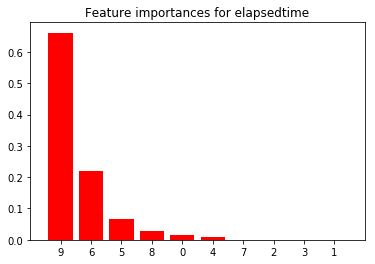

Prediction score: 0.41
Video 1: 
Feature ranking:
1. feature ref 9 (0.856010)
2. feature no_mixed_refs 6 (0.078077)
3. feature no_mbtree 5 (0.051647)
4. feature no_8x8dct 0 (0.009461)
5. feature rc_lookahead 8 (0.002776)
6. feature no_fast_pskip 4 (0.000846)
7. feature no_deblock 3 (0.000765)
8. feature no_cabac 2 (0.000353)
9. feature no_weightb 7 (0.000064)
10. feature no_asm 1 (0.000000)


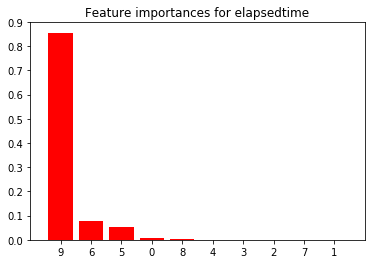

Prediction score: 0.36
Video 2: 
Feature ranking:
1. feature ref 9 (0.701720)
2. feature no_mixed_refs 6 (0.212446)
3. feature no_mbtree 5 (0.037456)
4. feature rc_lookahead 8 (0.020100)
5. feature no_fast_pskip 4 (0.013417)
6. feature no_8x8dct 0 (0.013180)
7. feature no_cabac 2 (0.001310)
8. feature no_deblock 3 (0.000239)
9. feature no_weightb 7 (0.000132)
10. feature no_asm 1 (0.000000)


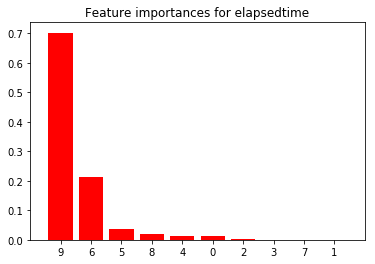

Prediction score: 0.51
Video 3: 
Feature ranking:
1. feature ref 9 (0.783440)
2. feature no_mixed_refs 6 (0.159292)
3. feature no_mbtree 5 (0.036075)
4. feature rc_lookahead 8 (0.008482)
5. feature no_8x8dct 0 (0.007448)
6. feature no_fast_pskip 4 (0.003671)
7. feature no_deblock 3 (0.000924)
8. feature no_cabac 2 (0.000466)
9. feature no_weightb 7 (0.000202)
10. feature no_asm 1 (0.000000)


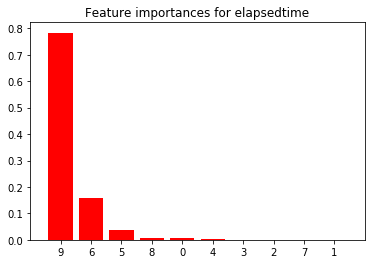

Prediction score: 0.38
Video 4: 
Feature ranking:
1. feature ref 9 (0.900313)
2. feature no_mixed_refs 6 (0.055970)
3. feature no_mbtree 5 (0.016197)
4. feature rc_lookahead 8 (0.014303)
5. feature no_8x8dct 0 (0.009995)
6. feature no_fast_pskip 4 (0.001990)
7. feature no_deblock 3 (0.000690)
8. feature no_cabac 2 (0.000381)
9. feature no_weightb 7 (0.000162)
10. feature no_asm 1 (0.000000)


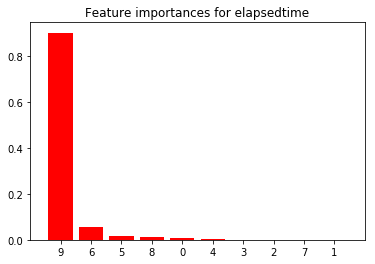

Prediction score: 0.48
Video 5: 
Feature ranking:
1. feature ref 9 (0.773193)
2. feature no_mbtree 5 (0.102484)
3. feature no_mixed_refs 6 (0.102433)
4. feature rc_lookahead 8 (0.011079)
5. feature no_8x8dct 0 (0.008733)
6. feature no_cabac 2 (0.001764)
7. feature no_deblock 3 (0.000135)
8. feature no_fast_pskip 4 (0.000098)
9. feature no_weightb 7 (0.000081)
10. feature no_asm 1 (0.000000)


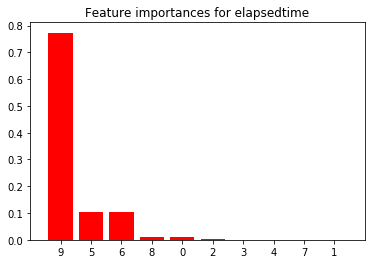

Prediction score: 0.36
Video 6: 
Feature ranking:
1. feature ref 9 (0.847372)
2. feature no_mbtree 5 (0.040883)
3. feature no_mixed_refs 6 (0.038218)
4. feature rc_lookahead 8 (0.035902)
5. feature no_fast_pskip 4 (0.026406)
6. feature no_8x8dct 0 (0.003907)
7. feature no_deblock 3 (0.003868)
8. feature no_cabac 2 (0.003205)
9. feature no_weightb 7 (0.000240)
10. feature no_asm 1 (0.000000)


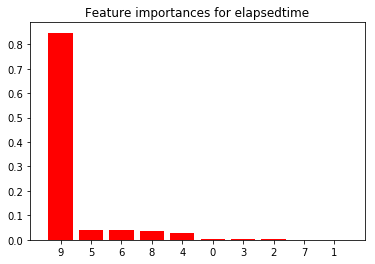

Prediction score: 0.58
Video 7: 
Feature ranking:
1. feature ref 9 (0.605785)
2. feature no_mixed_refs 6 (0.301760)
3. feature no_mbtree 5 (0.050471)
4. feature no_8x8dct 0 (0.031839)
5. feature rc_lookahead 8 (0.004928)
6. feature no_deblock 3 (0.003977)
7. feature no_cabac 2 (0.000574)
8. feature no_fast_pskip 4 (0.000561)
9. feature no_weightb 7 (0.000104)
10. feature no_asm 1 (0.000000)


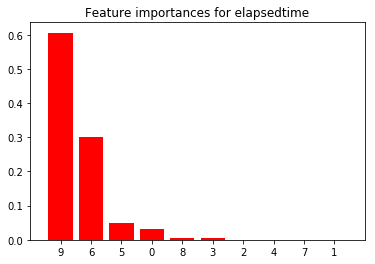

Prediction score: 0.56
Video 8: 
Feature ranking:
1. feature ref 9 (0.702263)
2. feature no_mixed_refs 6 (0.171708)
3. feature no_fast_pskip 4 (0.066148)
4. feature no_mbtree 5 (0.018983)
5. feature no_8x8dct 0 (0.013085)
6. feature rc_lookahead 8 (0.011342)
7. feature no_weightb 7 (0.005656)
8. feature no_deblock 3 (0.005567)
9. feature no_cabac 2 (0.005248)
10. feature no_asm 1 (0.000000)


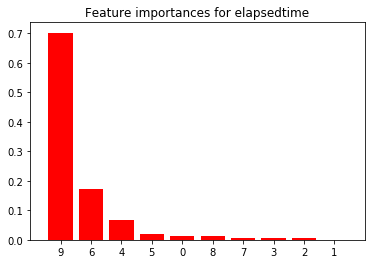

Prediction score: 3.66
Video 9: 
Feature ranking:
1. feature ref 9 (0.376681)
2. feature no_mbtree 5 (0.367071)
3. feature no_mixed_refs 6 (0.117686)
4. feature rc_lookahead 8 (0.078087)
5. feature no_cabac 2 (0.038634)
6. feature no_8x8dct 0 (0.015171)
7. feature no_weightb 7 (0.002524)
8. feature no_fast_pskip 4 (0.002120)
9. feature no_deblock 3 (0.002025)
10. feature no_asm 1 (0.000000)


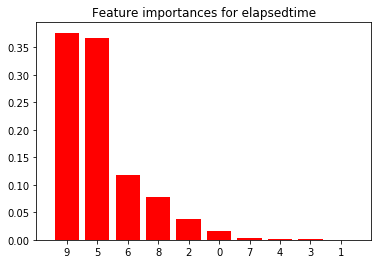

Prediction score: 1.70
Video 10: 
Feature ranking:
1. feature ref 9 (0.606476)
2. feature no_mixed_refs 6 (0.269310)
3. feature no_mbtree 5 (0.083540)
4. feature rc_lookahead 8 (0.024631)
5. feature no_8x8dct 0 (0.012984)
6. feature no_fast_pskip 4 (0.000902)
7. feature no_cabac 2 (0.000745)
8. feature no_weightb 7 (0.000726)
9. feature no_deblock 3 (0.000686)
10. feature no_asm 1 (0.000000)


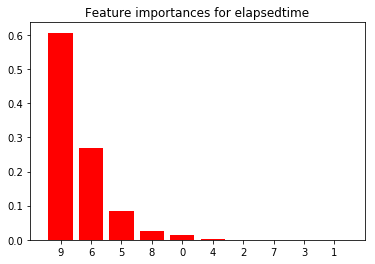

Prediction score: 1.25
Video 11: 
Feature ranking:
1. feature ref 9 (0.548801)
2. feature no_mixed_refs 6 (0.224517)
3. feature no_mbtree 5 (0.166638)
4. feature rc_lookahead 8 (0.023594)
5. feature no_8x8dct 0 (0.016872)
6. feature no_cabac 2 (0.016557)
7. feature no_deblock 3 (0.001095)
8. feature no_fast_pskip 4 (0.000983)
9. feature no_weightb 7 (0.000942)
10. feature no_asm 1 (0.000000)


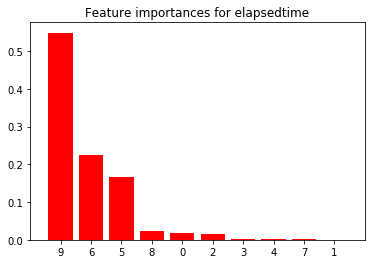

Prediction score: 1.23
Video 12: 
Feature ranking:
1. feature ref 9 (0.591412)
2. feature no_mixed_refs 6 (0.191346)
3. feature no_mbtree 5 (0.145051)
4. feature rc_lookahead 8 (0.048194)
5. feature no_8x8dct 0 (0.010258)
6. feature no_fast_pskip 4 (0.007762)
7. feature no_cabac 2 (0.002011)
8. feature no_deblock 3 (0.001987)
9. feature no_weightb 7 (0.001980)
10. feature no_asm 1 (0.000000)


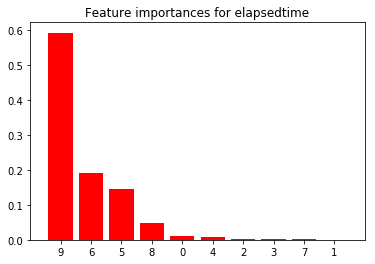

Prediction score: 2.01
Video 13: 
Feature ranking:
1. feature ref 9 (0.701762)
2. feature no_mixed_refs 6 (0.281326)
3. feature no_mbtree 5 (0.009370)
4. feature rc_lookahead 8 (0.004103)
5. feature no_8x8dct 0 (0.003016)
6. feature no_cabac 2 (0.000191)
7. feature no_deblock 3 (0.000150)
8. feature no_fast_pskip 4 (0.000042)
9. feature no_weightb 7 (0.000041)
10. feature no_asm 1 (0.000000)


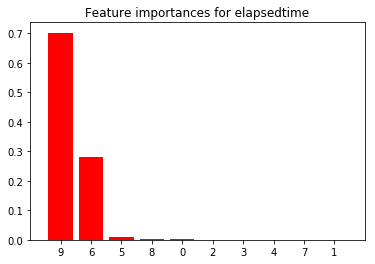

Prediction score: 0.41
Video 14: 
Feature ranking:
1. feature ref 9 (0.909959)
2. feature no_mixed_refs 6 (0.071038)
3. feature rc_lookahead 8 (0.005419)
4. feature no_fast_pskip 4 (0.003861)
5. feature no_mbtree 5 (0.003689)
6. feature no_8x8dct 0 (0.003229)
7. feature no_deblock 3 (0.002125)
8. feature no_cabac 2 (0.000446)
9. feature no_weightb 7 (0.000235)
10. feature no_asm 1 (0.000000)


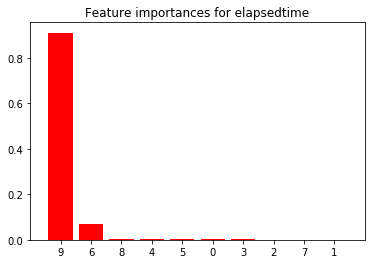

Prediction score: 0.45
Video 15: 
Feature ranking:
1. feature ref 9 (0.455193)
2. feature no_mbtree 5 (0.249645)
3. feature no_mixed_refs 6 (0.130052)
4. feature rc_lookahead 8 (0.110226)
5. feature no_cabac 2 (0.023988)
6. feature no_8x8dct 0 (0.020915)
7. feature no_weightb 7 (0.003655)
8. feature no_deblock 3 (0.003242)
9. feature no_fast_pskip 4 (0.003083)
10. feature no_asm 1 (0.000000)


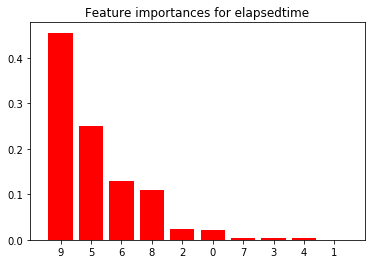

Prediction score: 2.01
Video 16: 
Feature ranking:
1. feature ref 9 (0.676957)
2. feature no_mixed_refs 6 (0.266377)
3. feature no_8x8dct 0 (0.024008)
4. feature no_mbtree 5 (0.015818)
5. feature no_cabac 2 (0.008517)
6. feature rc_lookahead 8 (0.007923)
7. feature no_deblock 3 (0.000182)
8. feature no_fast_pskip 4 (0.000116)
9. feature no_weightb 7 (0.000102)
10. feature no_asm 1 (0.000000)


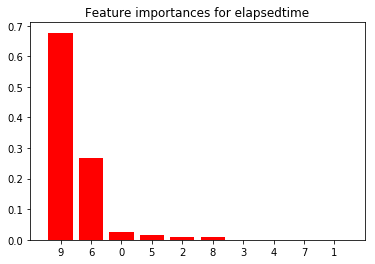

Prediction score: 0.49


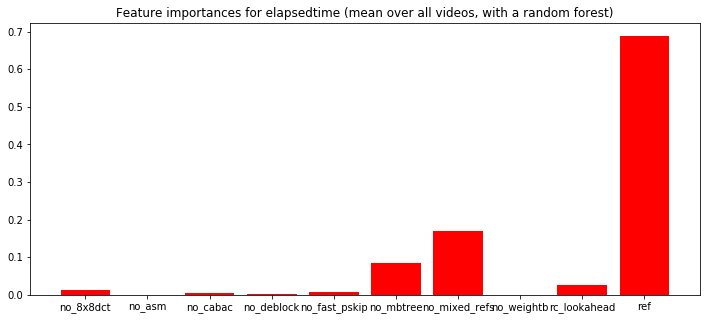

In [9]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split  
import numpy as np
from sklearn.metrics import accuracy_score, mean_absolute_error
import pandas as pd

#from sklearn.utils import check_arrays
def mean_relative_error(y_true, y_pred): 
    #y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    # return mean_absolute_error(y_true, y_pred)

def ftImportancesByVideo(idVideo): 
    

    X, y = listeVideo[idVideo][:], listeVideo[idVideo][predDimension][:]
    X = X.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'elapsedtime', 'size'],axis=1)
    clf = RandomForestRegressor(n_estimators=500)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)  
    #X_train = X[0:800]
    #X_test = X[801:1152]
    #y_train = y [0:800] 
    #y_test = y [801:1152]
    freg = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    importances = freg.feature_importances_
    indices = np.argsort(importances)[::-1]    

    print("Video %d: " % idVideo)
    # Print the feature ranking
    print("Feature ranking:")
    for f in range(len(indices)):
        print("%d. feature %s %d (%f)" % (f + 1, X.columns[indices[f]], indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances for " + predDimension)
    plt.bar(range(X.shape[1]), importances[indices],color="r", align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()
    acc = mean_relative_error (y_test,y_pred)
    print("Prediction score: %.2f" % (acc))
    return importances, indices


def plotGeneralFtImportances(importancePerFt):
    ftImpMean = [0]*(len(importancePerFt))
    for i in range(len(importancePerFt)):
        ftImpMean[i] = mean(importancePerFt[i])

    exampleVideo = listeVideo[0]
    exampleVideo = exampleVideo.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'elapsedtime', 'size'],axis=1)

    ftNames = [""]*(len(exampleVideo.columns))

    for i in range(len(exampleVideo.columns)):
        ftNames[i] = exampleVideo.columns[i]

    plt.figure(figsize=(12, 5))
    plt.title("Feature importances for " + predDimension + " (mean over all videos, with a random forest)")
    plt.bar(ftNames, ftImpMean, color="r", align="center")
    plt.show()


importancePerFt = np.zeros((10, len(listeVideo)), dtype='float') # [[] for i in range(10)] 
for idVideo in range(len(listeVideo)):
    imps, inds = ftImportancesByVideo(idVideo)
    for i in range(len(imps)):
        importancePerFt[i][idVideo] = imps[i] #inds[i] #.append(inds[i])

plotGeneralFtImportances(importancePerFt)




,no_8x8dct,no_cabac,no_deblock,no_fast_pskip,no_mbtree,no_mixed_refs,no_weightb
0,-3.73704,-0.137252,-0.0409408,2.22252,-7.2971,-13.5619,-0.605942
1,-3.27975,-0.527887,0.910905,0.667177,-7.69998,-7.64374,-0.0144211
2,-3.67907,1.09243,0.18954,3.08985,-5.74532,-13.3814,0.115862
3,-2.88447,-0.668307,0.928187,1.57304,-6.33689,-11.2443,-0.294177
4,-3.30669,-0.522524,0.634047,1.1097,-3.46885,-6.57001,-0.18326
5,-3.11304,1.27791,-0.284166,0.0812406,-11.2031,-8.87025,-0.0627656
6,-1.90924,-1.82153,1.80205,4.26158,-4.40624,-5.44424,-0.0250806
7,-5.93938,0.612646,1.87522,0.477109,7.01201,-17.3151,-0.03691
8,-3.64563,0.226324,-0.519303,7.37676,3.23535,-12.2012,-1.14117
9,-3.97557,6.62131,-0.524896,0.438328,-25.4962,-10.2061,-0.665788


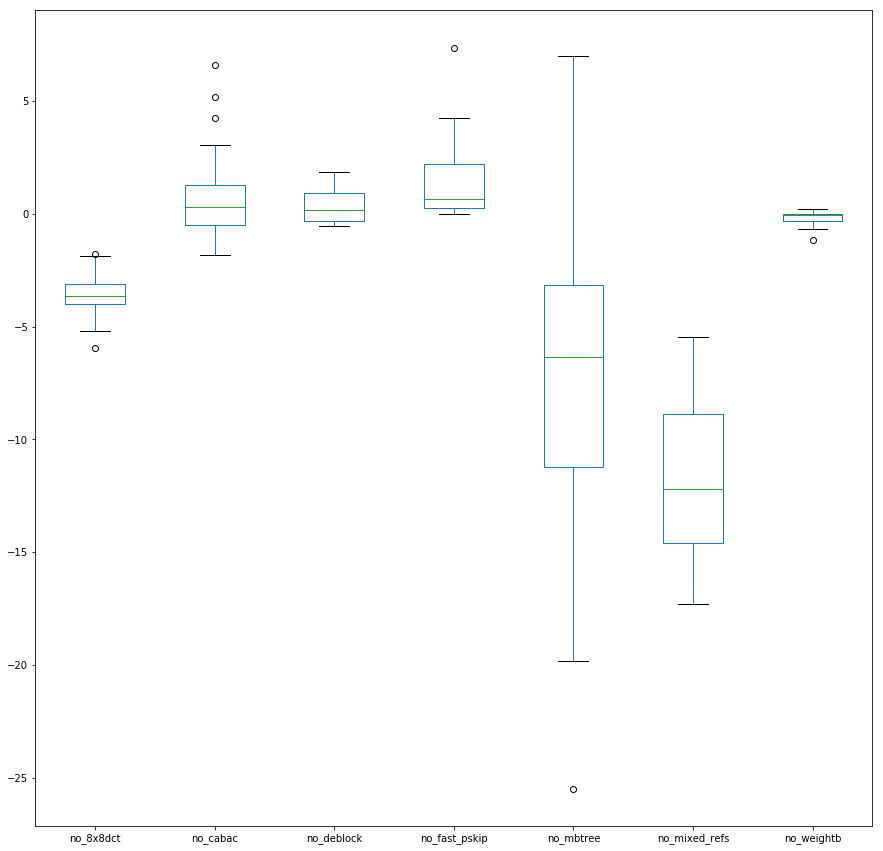

(9, 7)

In [10]:
from scipy import stats
from IPython.display import display, HTML

allPredictorFts = pd.DataFrame(listeVideo[0]).columns.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'elapsedtime', 'size'])
fttestPaired = pd.DataFrame(columns=range(len(listeVideo)),index=allPredictorFts)

def high_max(s):
    '''
    highlight the maximum in a Series green.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def high_min(s):
    '''
    highlight the maximum in a Series red.
    '''
    is_max = s == s.min()
    return ['background-color: red' if v else '' for v in is_max]

def ftImportancesByVideoPairedTest(idVideo): 
    pVideo = pd.DataFrame(listeVideo[idVideo])
    fttest = pd.DataFrame(columns=["Paired test", "Wilcoxon"])
    ftsMatter = []
    for ft in allPredictorFts: 
        if (len(pVideo[ft].unique()) == 2):  # trick for handling only Boolean predictors 
            positiveFt = pVideo.loc[pVideo[ft] == True]
            negativeFt = pVideo.loc[pVideo[ft] == False]
            ttestFt = stats.ttest_rel(positiveFt[predDimension], negativeFt[predDimension])[0]
            wFt = stats.wilcoxon(positiveFt[predDimension], negativeFt[predDimension])[0]
            fttest.loc[ft] = [ttestFt, wFt]
            ftsMatter.append(ft)
            fttestPaired[idVideo].loc[ft] = ttestFt
            #print ("For feature " + str(ft) + " t-test: " + str(ttestFt) + "\t\t" + "wft: " + str(wFt))
    #display(HTML(fttest.to_html()))
    #fttest["Paired test"].dropna().plot()
    #plt.show()
    
#vid1, vid2 = np.unravel_index(np.argmin(corrPearson,axis=None), np.array(corrPearson).shape)
#ftImportancesByVideoPairedTest(vid1)
#ftImportancesByVideoPairedTest(vid2)


#pearsonWithoutMutualCorr = [[0 for x in range(len(corrPearson))] for y in range(len(corrPearson))]
#for i in range(len(corrPearson)):
#    for j in range(len(corrPearson)):
#        if (i == j):
#            pearsonWithoutMutualCorr[i][j] = np.NaN
#        else:
#            pearsonWithoutMutualCorr[i][j] = corrPearson[i][j]
            
#vid3, vid4 = np.unravel_index(np.nanargmax(pearsonWithoutMutualCorr,axis=None), np.array(pearsonWithoutMutualCorr).shape)


#ftImportancesByVideoPairedTest(vid3)
#ftImportancesByVideoPairedTest(vid4)
for i in range(len(listeVideo)):
    ftImportancesByVideoPairedTest(i)
                                                             
display(HTML(pd.DataFrame(fttestPaired.dropna().transpose()).style.set_caption("paired-test for Boolean features and for all videos").
             apply(high_max)
             .apply(high_min).render()))  
# TODO: non Boolean features like "ref"
fttestPaired.dropna().transpose().plot.box(figsize=(15, 15)) 
plt.show()
#if (predDimension == "size" or predDimension == "elapsedtime"):

# two videos for which mbtree has different effects
np.argmin(fttestPaired.transpose()['no_mbtree'].values), np.argmax(fttestPaired.transpose()['no_mbtree'].values)
    #fttestPaired.transpose()['no_mbtree'].values.argmin # ), np.argmax(fttestPaired.transpose()['no_mbtree'])

In [11]:
#DEPRECATED (heatmaps)
#from string import ascii_letters
#import numpy as np
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline
#sns.set(style="white")
#
# Generate a large random dataset
#rs = np.random.RandomState(33)
#corr = pd.DataFrame(data=corrSpearman)
#
# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
#
# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           # square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.show()

In [12]:
def plot_corrBis(corr,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns + 1)
    plt.yticks(range(len(corr.columns)), corr.columns + 1)

# DEPRECATED plot_corr(pd.DataFrame(corrPearson))


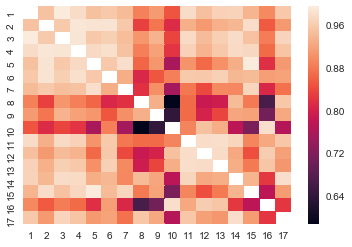

In [13]:
import seaborn as sns
%matplotlib inline

sns.set(style="white")
corr = pd.DataFrame(corrPearson)
sns.heatmap(corr, 
            xticklabels=corr.columns.values + 1,
            yticklabels=corr.columns.values + 1)
plt.show()

Method:	 ward


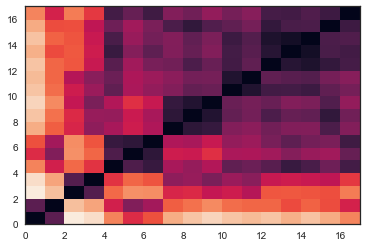

Method:	 single


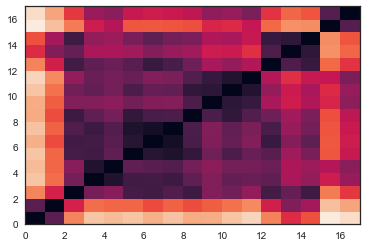

Method:	 average


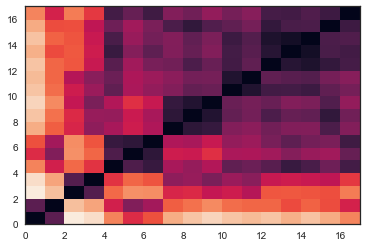

Method:	 complete


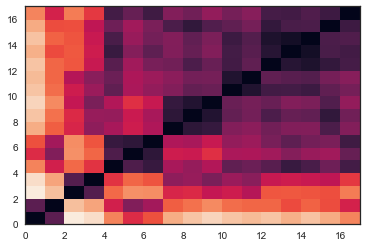

In [14]:
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage

import numpy as np
from scipy.spatial.distance import pdist, squareform, euclidean
from sklearn import datasets
from fastcluster import linkage

import matplotlib.pyplot as plt
%matplotlib inline

# https://docs.scipy.org/doc/scipy-0.14.0/reference/spatial.distance.html
# https://gmarti.gitlab.io/ml/2017/09/07/how-to-sort-distance-matrix.html
# http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software
# https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas
# https://en.wikipedia.org/wiki/Correlation_clustering
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

methods = ["ward","single","average","complete"]

corrPearsonN = pd.DataFrame(corrPearson).fillna(1)
N = len(corrPearson)
for method in methods:
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(squareform(pdist(corrPearsonN)),method) #hack
    
    plt.pcolormesh(ordered_dist_mat)
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.show()

0.5879814635269692
0.9936781455218427


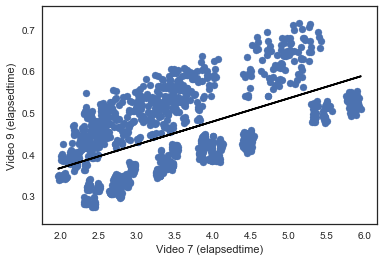

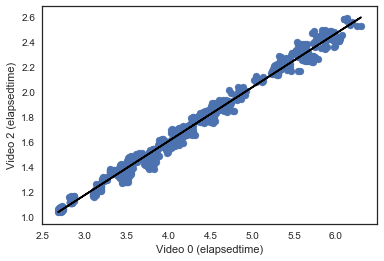

In [29]:
def plotCorrVideo(v1ID, v2ID,plot=True, plotfilename=""):
    video1 = listeVideo[v1ID][:]
    video2 = listeVideo[v2ID][:]
    v1 = video1[predDimension]
    v2 = video2[predDimension]
    
    
    mbtree = video1['no_mbtree']
    cabac = video1['no_cabac']
    col = []
    for i in range(len(video1)):
        if mbtree[i]:
            if cabac[i]:
                col.append("blue")
            else:
                col.append("lightblue")    
        else:
            if cabac[i]:
                col.append("red")
            else:
                col.append("orange")
    
    if plot:
        fig = plt.figure()
        #fig.set_size_inches(10, 5)
        #plt.scatter(v1,v2,color=col)
        plt.scatter(v1,v2)   
        slope, intercept, r_value, p_value, std_err = stats.linregress(v1, v2)
        plt.plot(v1,slope*v1+intercept,color="black")   
        plt.xlabel("Video %d (%s)" % (v1ID, predDimension))
        plt.ylabel("Video %d (%s)" % (v2ID, predDimension))
        if not plotfilename:
            fig.savefig("correlation-" + predDimension + "-v" + str(v1ID) + "v" + str(v2ID) + ".pdf", format="pdf", bbox_inches='tight')
        else:
            fig.savefig(plotfilename + ".pdf", format="pdf", bbox_inches='tight')
 
    return np.corrcoef(v1,v2)[0,1]
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html
# seeking where the lowest correlation occurs (btw 2 videos)


# seeking where the highest correlation occurs (btw 2 videos)
# we first exclude 1 correalation (same videos)
 
pearsonWithoutMutualCorr = [[0 for x in range(len(corrPearson))] for y in range(len(corrPearson))]
for i in range(len(corrPearson)):
    for j in range(len(corrPearson)):
        if (i == j):
            pearsonWithoutMutualCorr[i][j] = np.NaN
        else:
            pearsonWithoutMutualCorr[i][j] = corrPearson[i][j]

vid1, vid2 = np.unravel_index(np.nanargmin(pearsonWithoutMutualCorr,axis=None), np.array(pearsonWithoutMutualCorr).shape)
print(plotCorrVideo(vid1, vid2, True, "worst-plot-correlation-" + predDimension))
vid3, vid4 = np.unravel_index(np.nanargmax(pearsonWithoutMutualCorr,axis=None), np.array(pearsonWithoutMutualCorr).shape)
print(plotCorrVideo(vid3, vid4, True, "best-plot-correlation-" + predDimension))
#plotCorrVideo(23, 25)
#high coorelation plotCorrVideo(6, 9, 'elapsedtime')
# plotCorrVideo(2, 14, 'elapsedtime') # high correlation
# plotCorrVideo(2, 5, 'elapsedtime') # medium correlation (worst for execution time)
# plotCorrVideo(22, 16, 'size')
# plotCorrVideo(2, 5, 'elapsedtime')
# stats.spearmanr(listeVideo[2]['elapsedtime'],listeVideo[5]['elapsedtime']).correlation

# stats.spearmanr(listeVideo[16]['size'],listeVideo[22]['size']).correlation
# plotCorrVideo(16, 22, 'size')


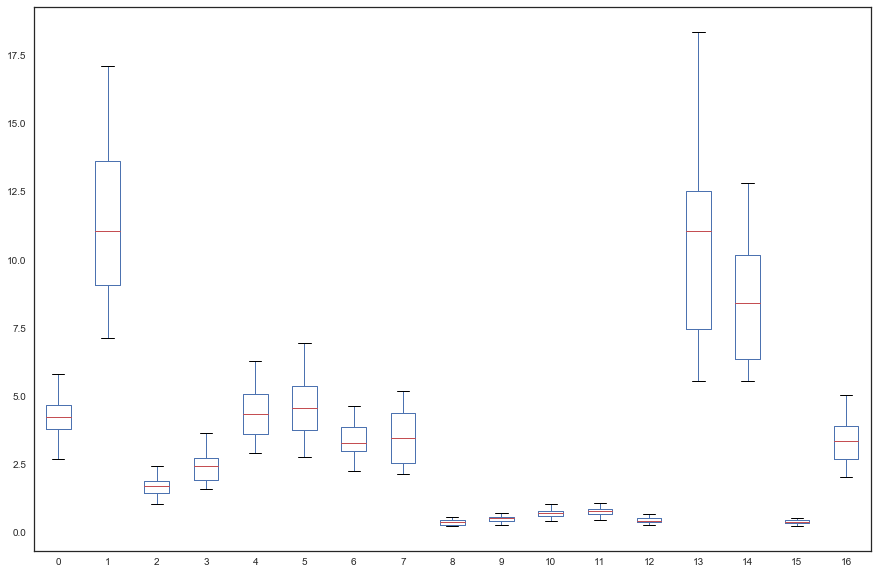

In [16]:
# AVERAGE time or sizes 
# if (predDimension == "elapsedtime"):
sizeVids = len(listeVideo)
meanTimes = [NaN for i in range(sizeVids)]
allPredsMeasure = pd.DataFrame(columns=range(0, sizeVids)) # [NaN for i in range(sizeVids)]
#fig, axs = plt.subplots(ncols=sizeVids,figsize=(16.7, 13.27))
for i in range(sizeVids):
    meanTimes[i] = np.mean(listeVideo[i][predDimension])
    allPredsMeasure.loc[i] = listeVideo[i][predDimension]
   # allPredsMeasure[i].columns.name = str(i)
    #abr = sns.boxplot(data=listeVideo[i][predDimension], ax=axs[i])
#pd.DataFrame(meanTimes).plot()
# pd.DataFrame(allPredsMeasure).plot(legend=False) # for fun
# pd.DataFrame(allPredsMeasure).boxplot()
allPredsMeasure.transpose().plot(kind="box", grid=False,figsize=(15, 10)) # figsize issue: https://github.com/pandas-dev/pandas/issues/11959




In [17]:
# transfer learning with v1 and v5 
# FIXME: plot
# DEPRECATED and size specific
# (playground)

#import matplotlib.pyplot as plt
#import numpy as np
#from sklearn import datasets, linear_model
# from sklearn.metrics import mean_squared_error, r2_score

#v1ID = 1
#v2ID = 11
#v1 = listeVideo[v1ID]
#v2 = listeVideo[v2ID]

# Split the targets into training/testing sets
#x_train = v1[['size', 'no_mbtree']][0:800] # .reshape(-1,2)
#y_train = v2['size'][0:800]

#x_test = v1[['size', 'no_mbtree']][801:1052] # .reshape(-1,2)
#y_test = v2['size'][801:1052]


#regr = linear_model.LinearRegression()
#regr.fit(x_train, y_train)

# Make predictions using the testing set
#y_pred = regr.predict(x_test)

#y_predict2 = 1.53700227*x_test['size']+ 4.03375832e+05*x_test['no_mbtree'] + regr.intercept_

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
 #    % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(y_test, y_pred))



# Plot outputs

#plt.figure()
# plt.scatter(x_train['size'], y_train,  color='red')
#plt.scatter(x_test['size'], y_test,  color='black')
#plt.scatter(x_test['size'], y_pred,  color='red')
#plt.plot(x_test['size'], y_predict2, color='blue')

#plt.xticks(())
#plt.yticks(())

#plt.show()
#r2_score(y_test, y_predict2) 


In [18]:
# showing that some videos are equivalent (wrt configurations and correlations) and one of them is "cheaper" (execution time per configuration is less)
# deprecated but good idea 
# x = listeVideo[3]['size']
# y = listeVideo[4]['size']
# np.corrcoef(x, y)[0, 1], mean(listeVideo[3]['elapsedtime']), mean(listeVideo[4]['elapsedtime'])

Replication 0

######

random forest


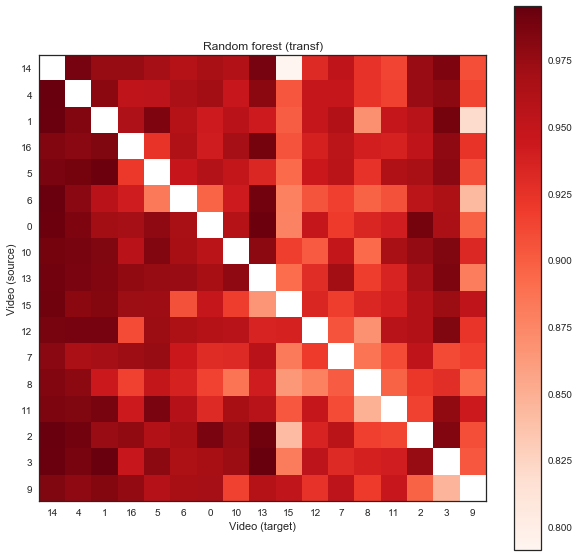

R2 stats
mean 0.947316556438183
std 0.03639188502719521
min 0.7912683209456639

######

random forest multi-output


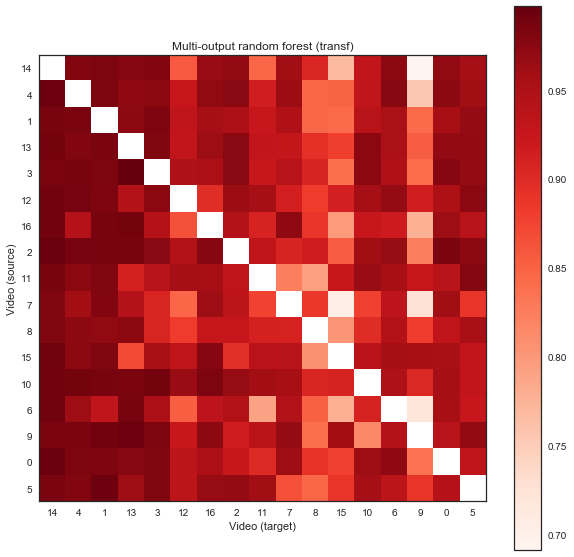

R2 stats
mean 0.9341736617490703
std 0.05684593381984361
min 0.6912369534861245

######

polynomial degree=1
features used=['elapsedtime']


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


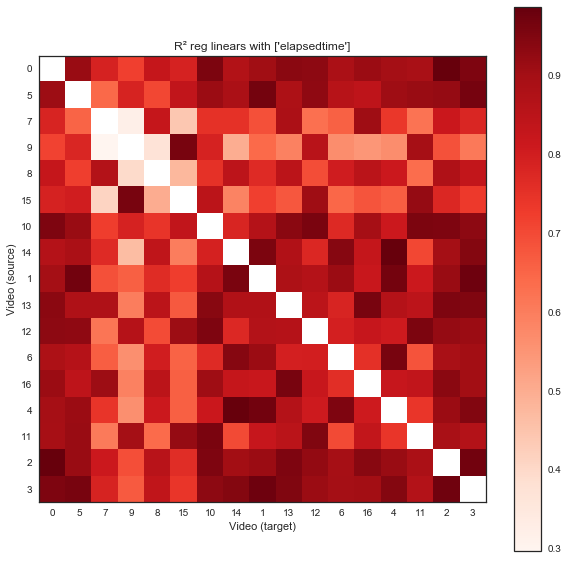

R2 stats
mean 0.8181535489824519
std 0.13218606304206199
min 0.297183561047321

######

polynomial degree=1
features used=['elapsedtime', 'no_mbtree', 'no_mixed_refs']


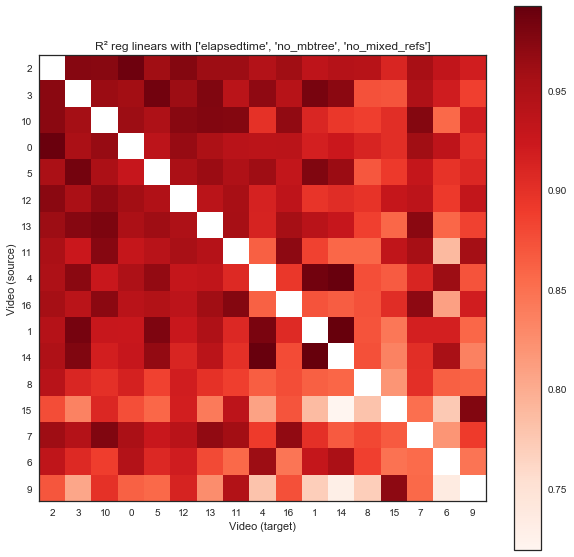

R2 stats
mean 0.9168242644557036
std 0.05243508397070086
min 0.7190500914557048

######

polynomial degree=2
features used=['elapsedtime', 'no_mbtree', 'no_mixed_refs']


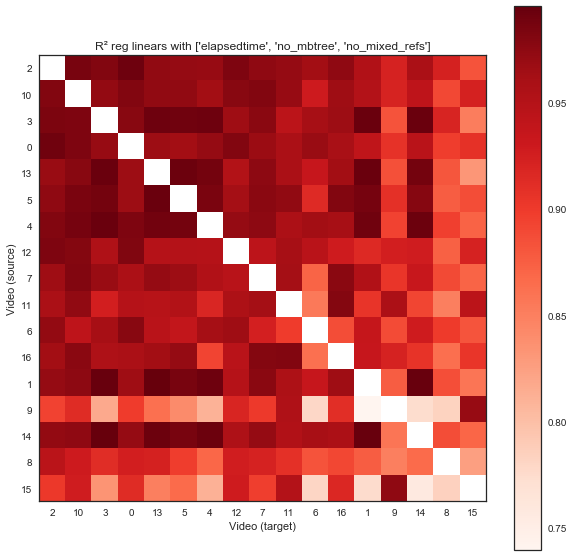

R2 stats
mean 0.9368874319019128
std 0.05141292626255986
min 0.7395427921873199

######

polynomial degree=3
features used=['elapsedtime', 'no_mbtree', 'no_mixed_refs']


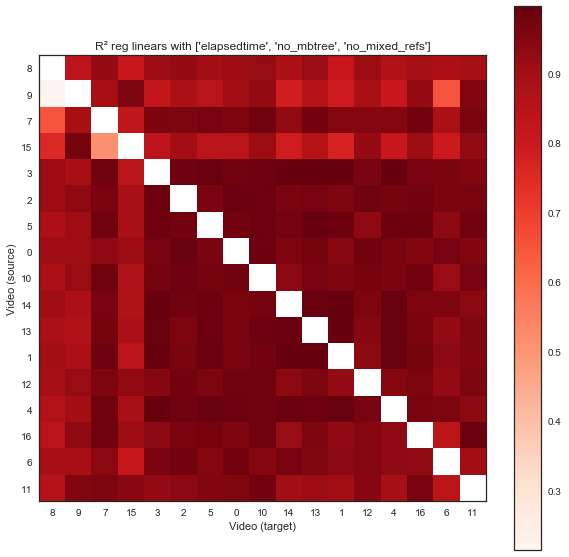

R2 stats
mean 0.9305933747718935
std 0.07528917111007652
min 0.21484764205484563

######

polynomial degree=1
features used=['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree']


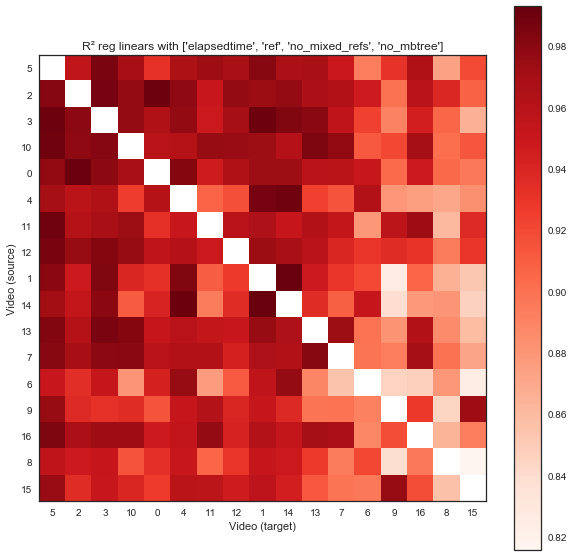

R2 stats
mean 0.9404209984326274
std 0.0389559357438799
min 0.8157194139999984

######

polynomial degree=2
features used=['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree']


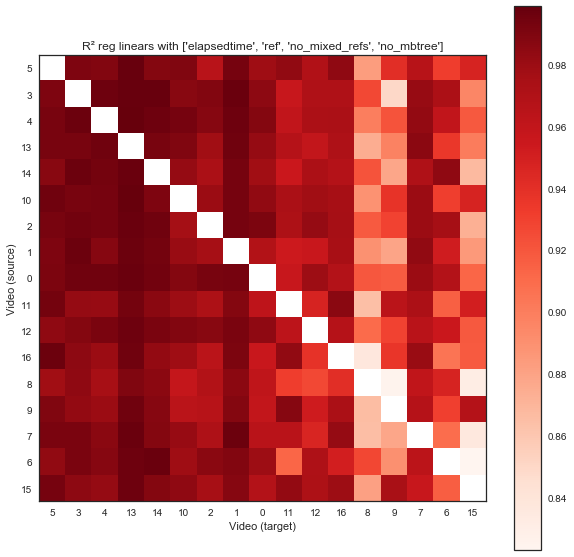

R2 stats
mean 0.9642936957097163
std 0.03740550765366217
min 0.8229994121490725

######

polynomial degree=3
features used=['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree']


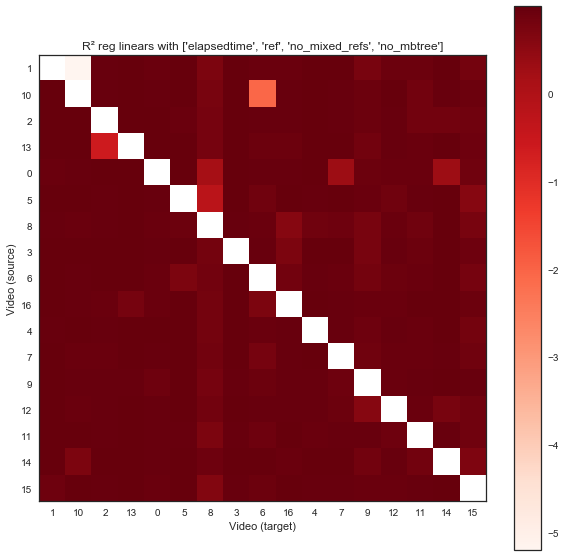

R2 stats
mean 0.8803351345939475
std 0.4391012207271885
min -5.201202252570392

######

polynomial degree=1
features used=['elapsedtime', 'no_mbtree', 'ref', 'no_mixed_refs', 'rc_lookahead']


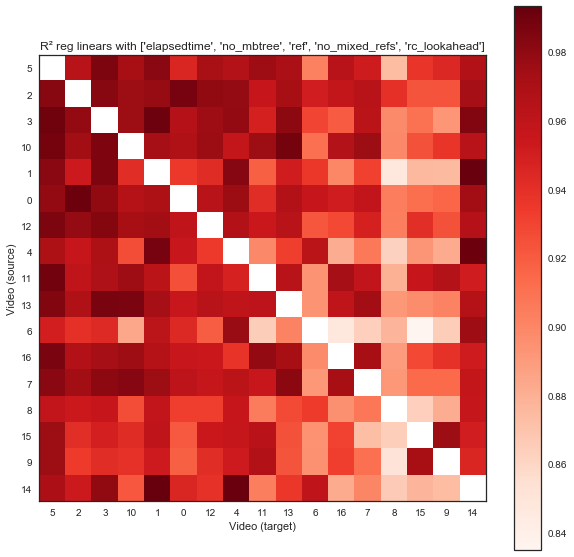

R2 stats
mean 0.9445101801907662
std 0.03520771991113579
min 0.8350276729683029

######

polynomial degree=2
features used=['elapsedtime', 'no_mbtree', 'ref', 'no_mixed_refs', 'rc_lookahead']


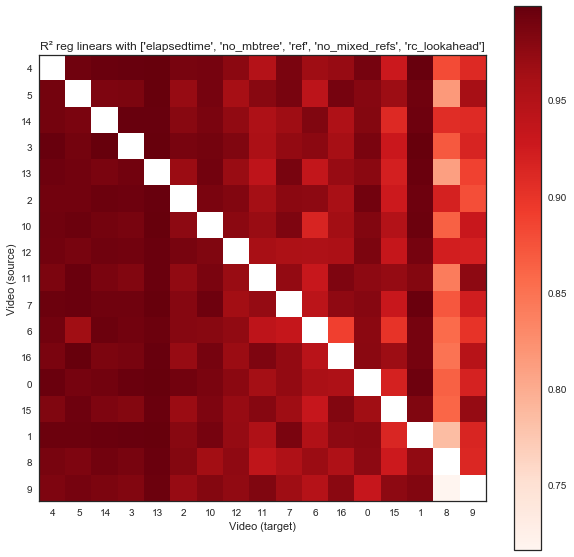

R2 stats
mean 0.9659479485340838
std 0.03931501498363668
min 0.7162658193385669

######

polynomial degree=3
features used=['elapsedtime', 'no_mbtree', 'ref', 'no_mixed_refs', 'rc_lookahead']


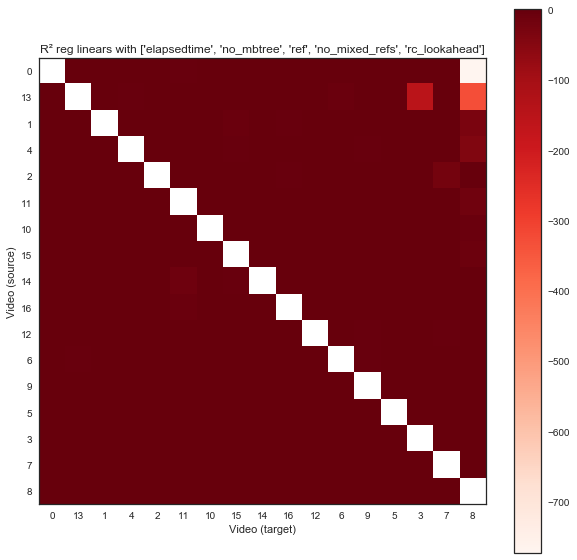

R2 stats
mean -4.788396313223264
std 51.696966108310775
min -773.0382618264193

######

polynomial degree=1
features used=['elapsedtime', 'no_mbtree', 'ref', 'no_mixed_refs', 'rc_lookahead', 'no_8x8dct']


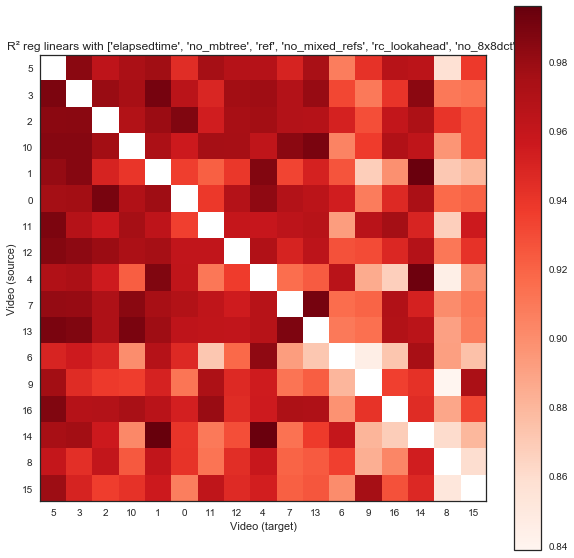

R2 stats
mean 0.9460337805418675
std 0.034733326060931796
min 0.8386548801376201

######

polynomial degree=2
features used=['elapsedtime', 'no_mbtree', 'ref', 'no_mixed_refs', 'rc_lookahead', 'no_8x8dct']


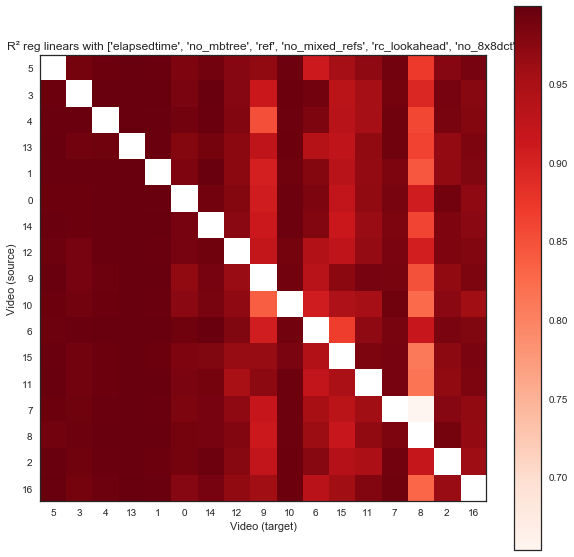

R2 stats
mean 0.969325630428852
std 0.04212388193485745
min 0.6535949594677193

######

polynomial degree=3
features used=['elapsedtime', 'no_mbtree', 'ref', 'no_mixed_refs', 'rc_lookahead', 'no_8x8dct']


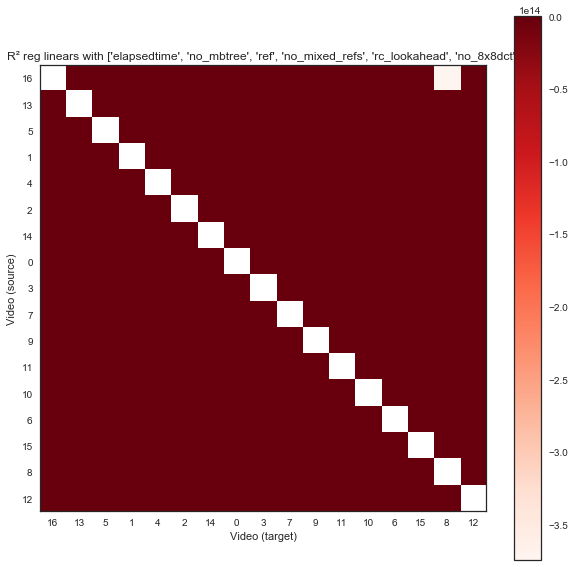

R2 stats
mean -1379058896806.8877
std 22663642901944.3
min -374469521630811.44

######

polynomial degree=1
features used=['no_8x8dct', 'no_asm', 'no_cabac', 'no_deblock', 'no_fast_pskip', 'no_mbtree', 'no_mixed_refs', 'no_weightb', 'rc_lookahead', 'ref', 'elapsedtime']


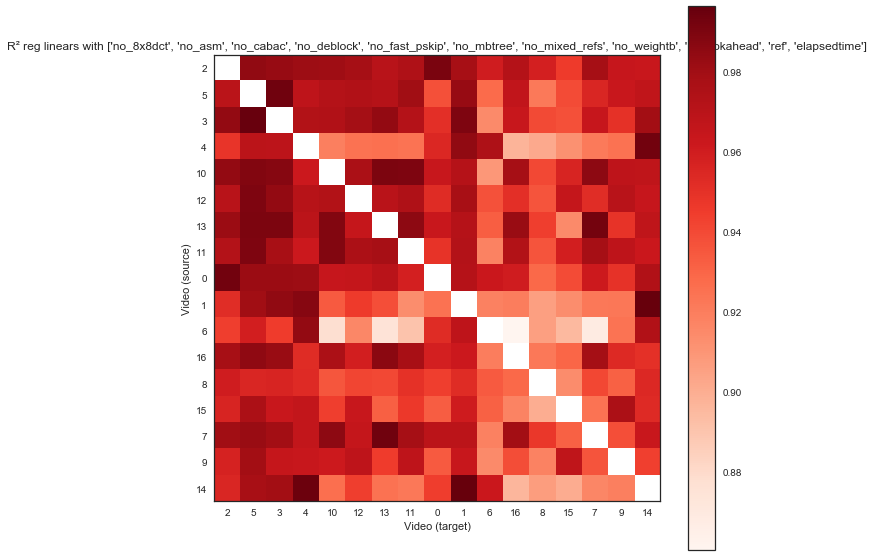

R2 stats
mean 0.9555502808058725
std 0.026592714656470933
min 0.8603457646899337

######

polynomial degree=2
features used=['no_8x8dct', 'no_asm', 'no_cabac', 'no_deblock', 'no_fast_pskip', 'no_mbtree', 'no_mixed_refs', 'no_weightb', 'rc_lookahead', 'ref', 'elapsedtime']


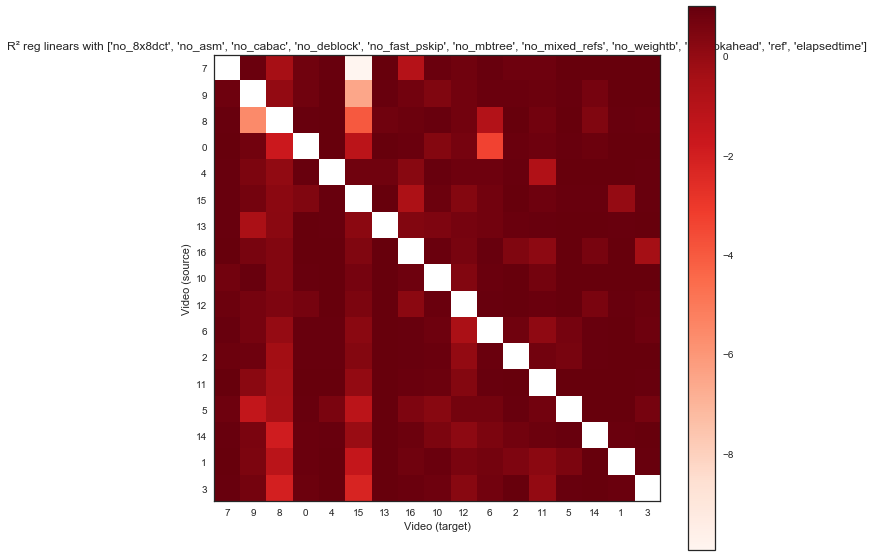

R2 stats
mean 0.5140674200423695
std 1.0870116124838634
min -9.947717323678686

######

polynomial degree=3
features used=['no_8x8dct', 'no_asm', 'no_cabac', 'no_deblock', 'no_fast_pskip', 'no_mbtree', 'no_mixed_refs', 'no_weightb', 'rc_lookahead', 'ref', 'elapsedtime']


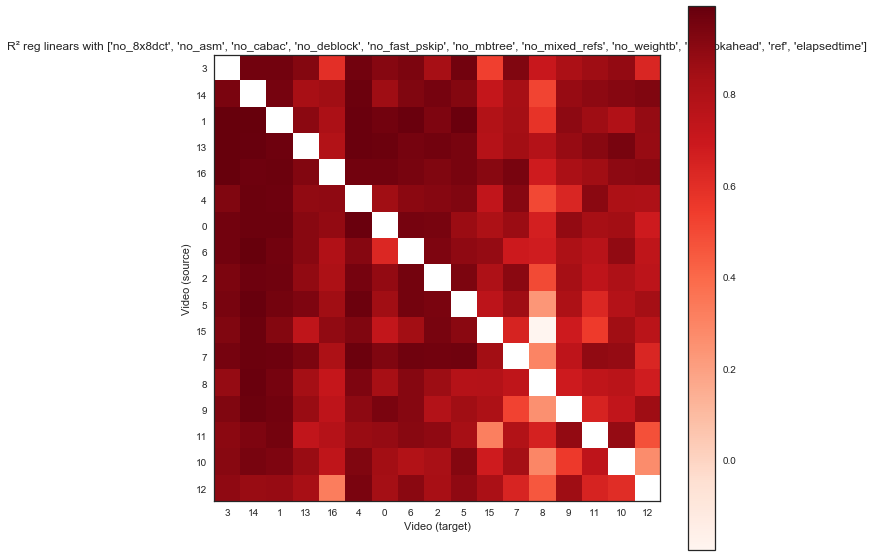

R2 stats
mean 0.8351437882987114
std 0.15830592178075464
min -0.19776665784104508


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
bestSourceTransferLearningStrategy.RF,2,3,0,1,2,11,13,13,16,15,13,10,3,3,2,9,13
bestSourceTransferLearningStrategy.MULIT_RF,2,5,13,10,10,11,4,16,2,15,13,5,10,3,0,9,10
bestSourceBasic lin reg,2,3,0,1,14,1,4,16,2,15,11,10,10,16,4,9,13
bestSourcelin reg (with mbtree+mixedrefs),2,14,0,5,14,3,4,10,2,15,13,16,2,3,1,9,11
bestSourcepoly 2 lin reg (with mbtree+mixedrefs),2,14,0,14,14,13,0,10,2,15,4,16,2,1,1,9,5
bestSourcepoly 3 lin reg (with mbtree+mixedrefs),2,3,0,14,3,3,0,1,2,15,2,16,2,3,3,9,5
bestSourcelin reg (with mbtree+ref+mixedrefs),2,14,0,2,14,3,4,10,2,15,13,16,2,10,1,9,11
bestSourcepoly 2 (with mbtree+ref+mixedrefs),2,3,0,14,3,16,14,13,6,15,4,9,2,4,3,9,11
bestSourcepoly 3 (with mbtree+ref+mixedrefs),2,7,0,14,13,16,14,13,14,11,5,16,10,4,3,9,5
bestSourcelin reg (with mbtree+ref+mixedrefs+look),2,14,0,13,14,3,4,10,2,15,13,16,2,10,1,9,11


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
best_TransferLearningStrategy.RF,0.986429,0.993647,0.989277,0.989445,0.990375,0.986836,0.973919,0.969706,0.93909,0.952226,0.977965,0.965958,0.953346,0.995156,0.993977,0.950794,0.977492
mean_TransferLearningStrategy.RF,0.894144,0.920415,0.899591,0.906759,0.92548,0.906192,0.900281,0.882168,0.854682,0.85068,0.892993,0.877745,0.87551,0.905383,0.93074,0.836321,0.89798
best_TransferLearningStrategy.MULIT_RF,0.984462,0.991327,0.975514,0.987762,0.987749,0.978686,0.976246,0.971422,0.916606,0.956403,0.974025,0.961026,0.965696,0.997213,0.99451,0.959786,0.983292
mean_TransferLearningStrategy.MULIT_RF,0.901483,0.922392,0.892061,0.905637,0.919212,0.894955,0.896893,0.876538,0.81761,0.784423,0.877471,0.85922,0.860986,0.907947,0.929868,0.799311,0.900772
best_Basic lin reg,0.987256,0.974128,0.987279,0.974539,0.985987,0.968896,0.953336,0.910625,0.857609,0.962116,0.957889,0.956559,0.9584,0.960384,0.986711,0.960609,0.961416
mean_Basic lin reg,0.831626,0.803678,0.841828,0.83408,0.789006,0.81486,0.75488,0.659107,0.701352,0.619737,0.816923,0.774724,0.800528,0.808434,0.772221,0.684709,0.782763
best_lin reg (with mbtree+mixedrefs),0.987841,0.99238,0.98934,0.984262,0.99034,0.985584,0.962447,0.976029,0.941142,0.976434,0.979932,0.976354,0.976095,0.977662,0.992009,0.970576,0.970573
mean_lin reg (with mbtree+mixedrefs),0.880452,0.855387,0.891375,0.881928,0.855274,0.88073,0.818163,0.870291,0.819729,0.845008,0.887828,0.87932,0.884679,0.876592,0.844502,0.832325,0.865606
best_poly 2 lin reg (with mbtree+mixedrefs),0.991265,0.994131,0.990389,0.995478,0.992407,0.991891,0.969268,0.980803,0.922518,0.974019,0.987175,0.981476,0.983389,0.994539,0.994222,0.970313,0.980845
mean_poly 2 lin reg (with mbtree+mixedrefs),0.903843,0.872789,0.906272,0.894932,0.883363,0.896024,0.853271,0.900287,0.823617,0.851541,0.910236,0.897567,0.899217,0.899178,0.869229,0.835468,0.893366


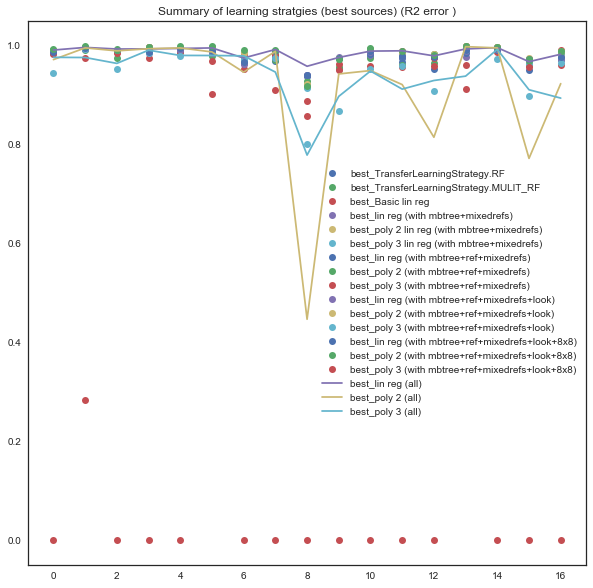

In [19]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
from scipy import stats
from enum import Enum
from IPython.display import display, HTML


### perfect scenarios for transfer function 
# (we have all source measurements and we do not have to guess them)


class TransferLearningStrategy(Enum):
    REGLIN_POLY1 = 1
    REGLIN_POLY2 = 2
    REGLIN_POLY3 = 3
    RF = 4 
    MULIT_RF = 5
    

# On essaie de regrouper les vidéos avec les rcarrés
# Rcarré = mesure de la qualité de la régression
# Donc potentiellement du bon transfert par régression linéaire

DEFAULT_TEST_SIZE_RF=0.95 # eg 0.95 is 0.05 for training, more than 50 configurations (3*N)
DEFAULT_TEST_SIZE=DEFAULT_TEST_SIZE_RF # same for linear reg 

def mkDegree(learningStrategy): 
    if (learningStrategy == TransferLearningStrategy.REGLIN_POLY1):
        n_degree = 1
    elif (learningStrategy == TransferLearningStrategy.REGLIN_POLY2):
        n_degree = 2
    elif (learningStrategy == TransferLearningStrategy.REGLIN_POLY3):
        n_degree = 3
    else:
        print("Error, unknown transfer learning strategy " + str(learningStrategy))
        n_degree = -1
    return n_degree

def res_reg(ftsToFocus,i,j,learningStrategy):

    # Split the targets into training/testing sets
    
    videoSource = listeVideo[i].copy()
    videoTarget = listeVideo[j].copy()
    
    videoSource[predDimension + "_target"] = videoTarget[predDimension]
      
    x_train, x_test, y_train, y_test = train_test_split(videoSource[ftsToFocus], 
                                                        videoSource[predDimension + "_target"], 
                                                        test_size=DEFAULT_TEST_SIZE, random_state=None)

    # Apply the model to the training test
    n_degree = mkDegree(learningStrategy)
    
    polynomial_features = PolynomialFeatures(degree=n_degree)
    linear_regression = LinearRegression()
    regr = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    
    # regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
    
   
    
    return r2_score(y_test, y_pred) # ,x_test[predDimension], y_test, y_pred))


#### same as above with a random forest
def res_rf(i,j):
    
    videoSource = listeVideo[i].copy()
    videoTarget = listeVideo[j].copy()
    
    videoSource[predDimension + "_target"] = videoTarget[predDimension]

    # Split the targets into training/testing sets
    possibleFts =['no_8x8dct','no_asm','no_cabac',
                           'no_deblock','no_fast_pskip','no_mbtree',
                           'no_mixed_refs','no_weightb','rc_lookahead','ref']
    possibleFts.append(predDimension)
    
        
    x_train, x_test, y_train, y_test = train_test_split(videoSource[possibleFts], 
                                                        videoSource[predDimension + "_target"], 
                                                        test_size=DEFAULT_TEST_SIZE_RF, random_state=None) # random_state=0)

    # Apply the model to the training test
    N_RANDOM_FOREST = 100
    regr = RandomForestRegressor(n_estimators=N_RANDOM_FOREST)
    
    # regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
      
    return r2_score(y_test, y_pred) #,x_test[predDimension], y_test, y_pred))

#### same as above with a random forest
def multi_rf(i,j):

    # Split the targets into training/testing sets
    videoSource = listeVideo[i].copy()
    videoTarget = listeVideo[j].copy()
    
    # videoSource[predDimension + "_target"] = videoTarget[predDimension] 
    videoSource[predDimension + "_target"] = videoTarget[predDimension]
    
    possibleFts =['no_8x8dct','no_asm','no_cabac',
                           'no_deblock','no_fast_pskip','no_mbtree',
                           'no_mixed_refs','no_weightb','rc_lookahead','ref']
    possibleFts.append(predDimension)
    #possibleFts.append(predDimension + "_target")
            
    x_train, x_test, y_train, y_test = train_test_split(videoSource[possibleFts], 
                                                        videoSource[[predDimension + "_target", predDimension]], 
                                                        test_size=DEFAULT_TEST_SIZE_RF, random_state=None) # random_state=0)

    # Apply the model to the training test
    N_RANDOM_FOREST = 100
    regr = RandomForestRegressor(n_estimators=N_RANDOM_FOREST)
    
    # regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
    r2score = r2_score(y_test, y_pred, multioutput='raw_values')  # 2 values 
    return r2score[0]

### rf = True (random forest and n_degree does not make any sense)
### rf = False (n_degree is for polynomial degree linear reg)
def pred_transf(ftsToFocus,learningStrategy):
    print("\n######\n")
    if (learningStrategy == TransferLearningStrategy.RF):
        print("random forest")
    elif (learningStrategy == TransferLearningStrategy.MULIT_RF):
        print("random forest multi-output")
    else:
        n_degree = mkDegree(learningStrategy)
        print("polynomial degree=" + str(n_degree))
        print("features used=" + str(ftsToFocus))
    
    taille = len(listeVideo)

    rCarreInter = [[0 for x in range(taille)] for y in range(taille)]
   # xtestInter = [[[] for x in range(taille)] for y in range(taille)]
   # ytestInter = [[[] for x in range(taille)] for y in range(taille)]
   # ypredInter = [[[] for x in range(taille)] for y in range(taille)]

    for i in range(taille):
        for j in range(taille):
            if (i == j):
                pass
            else:
                if (learningStrategy == TransferLearningStrategy.RF):    
                    r = res_rf(i,j)
                elif (learningStrategy == TransferLearningStrategy.MULIT_RF):    
                    r = multi_rf(i,j)
                else:
                    r = res_reg(ftsToFocus,i,j,learningStrategy)             
                rCarreInter[i][j] = r
                #xtestInter[i][j] = r[1]
                #ytestInter[i][j] = r[2]
                #ypredInter[i][j] = r[3]


    indicesDim = dendrogram( linkage(rCarreInter, 'average'), leaf_rotation=90.,leaf_font_size=18.,no_plot=True)['leaves']

    rCarre = [[0 for x in range(taille)] for y in range(taille)]
    #xtest = [[[] for x in range(taille)] for y in range(taille)]
    #ytest = [[[] for x in range(taille)] for y in range(taille)]
    #ypred = [[[] for x in range(taille)] for y in range(taille)]
    
    for i in range(taille):
        for j in range(taille):
            if (i == j):
                rCarre[i][j] = NaN 
                pass
            else:
                rCarre[i][j] = rCarreInter[indicesDim[i]][indicesDim[j]]
                #xtest[i][j] = xtestInter[indicesDim[i]][indicesDim[j]]
                #ytest[i][j] = ytestInter[indicesDim[i]][indicesDim[j]]
                #ypred[i][j] = ypredInter[indicesDim[i]][indicesDim[j]]

    plt.subplots(figsize=(10, 10))
    plt.imshow(rCarre,cmap='Reds',interpolation='nearest')
    if (learningStrategy == TransferLearningStrategy.RF):
        plt.title('Random forest (transf)')
    elif (learningStrategy == TransferLearningStrategy.MULIT_RF):
        plt.title('Multi-output random forest (transf)')
    else:
        plt.title('R² reg linears with '+ str(ftsToFocus))
    plt.xticks(range(len(indicesDim)),indicesDim)
    plt.yticks(range(len(indicesDim)), indicesDim)
    plt.xlabel("Video (target)")
    plt.ylabel("Video (source)")
    plt.colorbar()
    plt.show()


    # On regarde ensuite, pour les vidéos qui marchent bien,
    # les graphiques correspondants aux prédictions*valeurs réelles

    ## DEPRECATED 
    def plot_vid_transf(i,j):
        if j == 0:
            plt.ylabel("Video " + str(indicesDim[i]))
        if i == taille-1:
            plt.xlabel("Video " + str(indicesDim[j]))
        plt.scatter(xtest[i][j], ytest[i][j], s = 5, color='black')
        plt.scatter(xtest[i][j], ypred[i][j], s = 5, color='red')
        plt.xticks(())
        plt.yticks(())


    # taille = 10
    # print("We depict ", str(taille)," first videos")
    # all videos
    #plt.subplots(nrows=taille,ncols=taille,figsize=(25, 25))
    #for i in range(taille):
    #    for j in range(taille):
    #        plt.subplot(taille,taille,taille*i+j+1)
    #        plot_vid_reg(i,j)
            
    print("R2 stats")
    print("mean " + str(np.nanmean(rCarre)))
    print("std " + str(np.nanstd(rCarre)))
    print("min " + str(np.nanmin(rCarre)))
    return rCarreInter

allPossibleFts =['no_8x8dct','no_asm','no_cabac',
                           'no_deblock','no_fast_pskip','no_mbtree',
                           'no_mixed_refs','no_weightb','rc_lookahead','ref']

allPossibleFtsTime = allPossibleFts[:]
allPossibleFtsSize = allPossibleFts[:]
allPossibleFtsTime.append('elapsedtime')
allPossibleFtsSize.append('size')
if (True):
    N_REPLICATION=1
    mreAllR2={}
    if (predDimension == "size"):
        #pred_reg(['size'])
        for r in range(0, N_REPLICATION): 
            print("Replication " + str(r))
            mreAllR2 ['Basic lin reg'] = pred_transf(['size'], TransferLearningStrategy.REGLIN_POLY1)
            mreAllR2 ['lin reg (with no_cabac, no_mbtree)'] = pred_transf(['size', 'no_cabac', 'no_mbtree'], TransferLearningStrategy.REGLIN_POLY1) # impressive improvements wrt simple size
            mreAllR2 ['poly 2 (with no_cabac, no_mbtree)'] = pred_transf(['size', 'no_cabac', 'no_mbtree'], TransferLearningStrategy.REGLIN_POLY2) 
            mreAllR2 ['poly 3 (with no_cabac, no_mbtree)'] = pred_transf(['size', 'no_cabac', 'no_mbtree'], TransferLearningStrategy.REGLIN_POLY3)
            mreAllR2 ['lin reg (with no_cabac, no_mbtree, ref)'] = pred_transf(['size', 'no_cabac', 'no_mbtree', 'ref'], TransferLearningStrategy.REGLIN_POLY1) # impressive improvements wrt simple size
            mreAllR2 ['poly 2 (with no_cabac, no_mbtree, ref)'] = pred_transf(['size', 'no_cabac', 'no_mbtree', 'ref'], TransferLearningStrategy.REGLIN_POLY2) 
            mreAllR2 ['poly 3 (with no_cabac, no_mbtree, ref)'] = pred_transf(['size', 'no_cabac', 'no_mbtree', 'ref'], TransferLearningStrategy.REGLIN_POLY3)
            mreAllR2 ['lin reg (with no_cabac, no_mbtree, ref, rc_lookahead)'] = pred_transf(['size', 'no_cabac', 'no_mbtree', 'ref', 'rc_lookahead'], TransferLearningStrategy.REGLIN_POLY1) # impressive improvements wrt simple size
            mreAllR2 ['poly 2 (with no_cabac, no_mbtree, ref, rc_lookahead)'] = pred_transf(['size', 'no_cabac', 'no_mbtree', 'ref', 'rc_lookahead'], TransferLearningStrategy.REGLIN_POLY2) 
            mreAllR2 ['poly 3 (with no_cabac, no_mbtree, ref, rc_lookahead)'] = pred_transf(['size', 'no_cabac', 'no_mbtree', 'ref', 'rc_lookahead'], TransferLearningStrategy.REGLIN_POLY3)
            
            mreAllR2 ['lin reg (all)'] = pred_transf(allPossibleFtsSize, TransferLearningStrategy.REGLIN_POLY1)
            mreAllR2 ['poly 2 (all)'] = pred_transf(allPossibleFtsSize, TransferLearningStrategy.REGLIN_POLY2)
            mreAllR2 ['poly 3 (all)'] = pred_transf(allPossibleFtsSize, TransferLearningStrategy.REGLIN_POLY3)
            
            
            mreAllR2 [str(TransferLearningStrategy.RF)] = pred_transf([], TransferLearningStrategy.RF) # random forest
            mreAllR2 [str(TransferLearningStrategy.MULIT_RF)] = pred_transf([], TransferLearningStrategy.MULIT_RF) # random forest multi-output
            
            
    elif (predDimension == "elapsedtime"):
        for r in range(0, N_REPLICATION): 
            print("Replication " + str(r) + "")
            mreAllR2 [str(TransferLearningStrategy.RF)] = pred_transf([], TransferLearningStrategy.RF) # random forest
            mreAllR2 [str(TransferLearningStrategy.MULIT_RF)] = pred_transf([], TransferLearningStrategy.MULIT_RF) # random forest multi-output
            mreAllR2 ['Basic lin reg'] = pred_transf(['elapsedtime'], TransferLearningStrategy.REGLIN_POLY1) # equivalent to Pearson 
          # future work mreAllR2 ['Basic lin reg + SIZE'] = pred_transf(['elapsedtime', 'size'], TransferLearningStrategy.REGLIN_POLY1) # equivalent to Pearson 
            mreAllR2 ['lin reg (with mbtree+mixedrefs)'] = pred_transf(['elapsedtime', 'no_mbtree', 'no_mixed_refs'], TransferLearningStrategy.REGLIN_POLY1)
            mreAllR2 ['poly 2 lin reg (with mbtree+mixedrefs)'] = pred_transf(['elapsedtime', 'no_mbtree', 'no_mixed_refs'], TransferLearningStrategy.REGLIN_POLY2)
            mreAllR2 ['poly 3 lin reg (with mbtree+mixedrefs)'] = pred_transf(['elapsedtime', 'no_mbtree', 'no_mixed_refs'], TransferLearningStrategy.REGLIN_POLY3)
            mreAllR2 ['lin reg (with mbtree+ref+mixedrefs)'] = pred_transf(['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree'], TransferLearningStrategy.REGLIN_POLY1)
            mreAllR2 ['poly 2 (with mbtree+ref+mixedrefs)'] = pred_transf(['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree'], TransferLearningStrategy.REGLIN_POLY2)
            mreAllR2 ['poly 3 (with mbtree+ref+mixedrefs)'] = pred_transf(['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree'], TransferLearningStrategy.REGLIN_POLY3)    
            mreAllR2 ['lin reg (with mbtree+ref+mixedrefs+look)'] = pred_transf(['elapsedtime', 'no_mbtree', 'ref', 'no_mixed_refs', 'rc_lookahead'], TransferLearningStrategy.REGLIN_POLY1)
            mreAllR2 ['poly 2 (with mbtree+ref+mixedrefs+look)'] = pred_transf(['elapsedtime', 'no_mbtree', 'ref', 'no_mixed_refs', 'rc_lookahead'], TransferLearningStrategy.REGLIN_POLY2)
            mreAllR2 ['poly 3 (with mbtree+ref+mixedrefs+look)'] = pred_transf(['elapsedtime', 'no_mbtree', 'ref', 'no_mixed_refs', 'rc_lookahead'], TransferLearningStrategy.REGLIN_POLY3)
            mreAllR2 ['lin reg (with mbtree+ref+mixedrefs+look+8x8)'] = pred_transf(['elapsedtime', 'no_mbtree', 'ref', 'no_mixed_refs', 'rc_lookahead', 'no_8x8dct'], TransferLearningStrategy.REGLIN_POLY1)
            mreAllR2 ['poly 2 (with mbtree+ref+mixedrefs+look+8x8)'] = pred_transf(['elapsedtime', 'no_mbtree', 'ref', 'no_mixed_refs', 'rc_lookahead', 'no_8x8dct'], TransferLearningStrategy.REGLIN_POLY2)
            mreAllR2 ['poly 3 (with mbtree+ref+mixedrefs+look+8x8)'] = pred_transf(['elapsedtime', 'no_mbtree', 'ref', 'no_mixed_refs', 'rc_lookahead', 'no_8x8dct'], TransferLearningStrategy.REGLIN_POLY3)
            mreAllR2 ['lin reg (all)'] = pred_transf(allPossibleFtsTime, TransferLearningStrategy.REGLIN_POLY1)
            mreAllR2 ['poly 2 (all)'] = pred_transf(allPossibleFtsTime, TransferLearningStrategy.REGLIN_POLY2)
            mreAllR2 ['poly 3 (all)'] = pred_transf(allPossibleFtsTime, TransferLearningStrategy.REGLIN_POLY3)
            
            
           # future work mreAllR2 ['poly 2 (with mbtree+ref+mixedrefs+look+8x8+SIZE)'] = pred_transf(['elapsedtime', 'size', 'no_mbtree', 'ref', 'no_mixed_refs', 'rc_lookahead', 'no_8x8dct'], TransferLearningStrategy.REGLIN_POLY2)    
    else:
        print("Error (unknown dimension)" + predDimension)   
    

# highlight the best "source" video for transfering (a priori of course)
def idealBestVideoSources(mreAllR2):
    mErrors = {} 
    dSummary = pd.DataFrame(columns=range(len(listeVideo)))
    dSummaryBestSources = pd.DataFrame(columns=range(len(listeVideo)))
    for l in mreAllR2.keys():   
        m = mreAllR2[l]    
        pdMeanSample = pd.DataFrame(m)
        bestL = np.nanmax(pdMeanSample,axis=0)
        bestSource = np.nanargmax(pdMeanSample,axis=0)
        meanL = np.nanmean(pdMeanSample,axis=0)
        dSummary.loc['best_' + str(l)] = bestL
        dSummary.loc['mean_' + str(l)] = meanL
        dSummaryBestSources.loc['bestSource' + str(l)] = bestSource
        #[t]
        mMeanDiff = pdMeanSample 
        mMeanDiffHTML = mMeanDiff.style.set_caption(str(l) + "(R2 error )")#.background_gradient(cmap=cm)
        mMeanDiffHTML = mMeanDiffHTML.highlight_max(axis=0)

            #display(HTML(mMeanDiffHTML.render()))
            #display(HTML(pd.DataFrame(meanPerVideoTargetNoTransf).to_html()))
    dHTMLSummary = dSummary.style.set_caption("Summary of learning stratgies (mean/max sources) (R2 error )")# background_gradient(cmap=cm)
    dHTMLSummary = dHTMLSummary.highlight_max(axis=0)
    display(HTML(dSummaryBestSources.style.set_caption("Best video sources per learning stratgies (R2 error )").
                 render()))
    display(HTML(dHTMLSummary.render())) 
    if (predDimension == "elapsedtime"):
        styleSummaryLine = ["o", "o", "o", "o", "o", "o", "o", "o", "o", "o", "o", "o", "o", "o", "o"] #TODO (hardcoded)
    elif (predDimension == "size"):
        styleSummaryLine = ["o", "o", "o", "o", "o", "o", "o", "o", "o", "o", "o", "o"]
    #(regex='^(?!mean)', axis=0)
    # (regex='mean', axis=0)
    dSummary.filter(regex='^(?!mean)', axis=0).transpose().plot(style=styleSummaryLine, figsize=(10, 10),
                                                                    title="Summary of learning stratgies (best sources) (R2 error )")          

#mreAllR2
idealBestVideoSources(mreAllR2)                                                                 



In [20]:
# %%capture
# transfer learning 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


## Domain knowledge for transfer function
# seems deprecated 
def mkFeatures2Focus(predDimension):
    possibleColumns=['idVideo','no_8x8dct','no_asm','no_cabac',
                           'no_deblock','no_fast_pskip','no_mbtree',
                           'no_mixed_refs','no_weightb','rc_lookahead','ref']
    ftToFocus = []
    if predDimension == 'size':
        ftToFocus = ['no_mbtree', 'no_cabac'] # []
    elif predDimension == 'elapsedtime':
        ftToFocus = [] # ['ref', 'no_mixed_refs', 'no_mbtree'] # []
    else:
        print("Error: predDimension is either size or elapsedtime")
    return ftToFocus

def evalPrediction(y_gtruth, y_pred):
     # The mean squared error
    mse = mean_squared_error(y_gtruth, y_pred)
   # print("Mean squared error: %.2f" % mse)
    # Explained variance score: 1 is perfect prediction
    r2 = r2_score(y_gtruth, y_pred)
   # print('Variance score: %.2f' % r2)   
    mre = mean_relative_error(y_gtruth, y_pred)
    mae = mean_absolute_error(y_gtruth, y_pred)
   # print('Relative score: %.2f' % mre)
    return mse, r2, mre, mae

# predDimension: either size or elapsedtime 
# features to focus (for linear regression says)
def transferReg(v1ID, v2ID, perc, ftsToFocus, n_degree=2):
    vSource = listeVideo[v1ID][:]
    vTarget = listeVideo[v2ID][:]
    
    N_RANDOM_FOREST = 100
    
    nTotal = len(vSource[predDimension]) # length is equal between vSource and vTarget (1052 in our experiments)
    tres = round(perc * nTotal)
    
    ftsToRemove = ['configurationID', 'size', 'elapsedtime', 'systemtime', 'usertime']
    # ftsToRemove.remove(predDimension)
    
    ######### pure learnning over target (it's the traditional way, without transfer)  ##########  
    clfTarget = RandomForestRegressor(n_estimators=N_RANDOM_FOREST)  
    
    # train sample 
    x_target_train = vTarget[0:tres] # Cs
    x_effective_target_train = x_target_train.drop(ftsToRemove, axis=1) # normally we learn over the full parameters but we can try to target specifically ['no_mbtree', 'no_cabac']
    # x_effective_target_train = x_effective_target_train[['no_mbtree', 'no_cabac']] 
    y_target_train = vTarget[predDimension][0:tres] 
    clfTarget.fit(x_effective_target_train, y_target_train) 
    
    # test sample for evaluating 
    x_target_test = vTarget[tres+1:nTotal]
    x_effective_target_test = x_target_test.drop(ftsToRemove, axis=1) # normally we learn over the full parameters but we can try to target specifically ['no_mbtree', 'no_cabac']
    # x_effective_source_test = x_effective_source_test[['no_mbtree', 'no_cabac']]
    y_target_test = vTarget[predDimension][tres+1:nTotal]
    
   # print("** Evaluation of learning model (for the TARGET, without transfer)**")
    y_target_pred = clfTarget.predict(x_effective_target_test)
    mseMLTarget, r2MLTarget, mreMLTarget, maeMLTarget = evalPrediction(y_target_test, y_target_pred)
   
    
    #### Now let's try ML + Transfer
    
    ######### first, we need a learning model for predicting size (source), hopefully very accurate ##########  
    clf = RandomForestRegressor(n_estimators=N_RANDOM_FOREST)    
    x_source_train = vSource[0:tres] # Cs
    x_effective_source_train = x_source_train.drop(ftsToRemove, axis=1) # normally we learn over the full parameters but we can try to target specifically ['no_mbtree', 'no_cabac']
    # x_effective_source_train = x_effective_source_train[['no_mbtree', 'no_cabac']] 
    y_source_train = vSource[predDimension][0:tres] 
    clf.fit(x_effective_source_train, y_source_train) # RT
    
    # intermediate evaluation of learning model
    #x_source_test = vSource[tres+1:nTotal]
    #x_effective_source_test = x_source_test.drop(ftsToRemove, axis=1) # normally we learn over the full parameters but we can try to target specifically ['no_mbtree', 'no_cabac']
   # x_effective_source_test = x_effective_source_test[['no_mbtree', 'no_cabac']]
    #y_source_test = vSource[predDimension][tres+1:nTotal]
    
    #y_source_pred = clf.predict(x_effective_source_test)
  #  print("** Intermediate evaluation of learning model for the SOURCE hopefully very accurate **")
 #   mseMLSource, r2MLSource, mreMLSource = evalPrediction(y_source_test, y_source_pred)    

    ####### second, let's learn the transfer function between source and target ############
    # WITH linear function over ftsToFocus
    x_transfer_train = x_source_train[ftsToFocus] # source [['size', 'no_mbtree', 'no_cabac']]
    y_transfer_train = vTarget[predDimension][0:tres] # Cboth (target)          
    polynomial_features = PolynomialFeatures(degree=n_degree)
    linear_regression = LinearRegression()
    regr = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    regr.fit(x_transfer_train, y_transfer_train)

 
        
    # (alternate) WITH another learning-based transfer function  
    ftsMLToRemove = ftsToRemove[:]
    ftsMLToRemove.remove(predDimension) # we cannot include predDimension column
    x_transferML_train = x_source_train.drop(ftsMLToRemove, axis=1)  
    y_transferML_train = vTarget[predDimension][0:tres] # Cboth (target)
    clfTransML = RandomForestRegressor(n_estimators=N_RANDOM_FOREST)  # linear_model.LinearRegression() # linear_model.BayesianRidge() # linear_model.LinearRegression() # linear_model.Ridge (alpha = .5) 
    clfTransML.fit(x_transferML_train, y_transferML_train) 
    
  
    
           
    
    ########### third, transfer + learning  
#    ftsToRemove.remove(predDimension)

 #### Alternate technique: regression over the ***learned*** values (not over the original, raw values)
    x_test = vSource[tres+1:nTotal] # vSource[tres+1:nTotal]    
    x_effective_test = x_test.drop(ftsToRemove, axis=1)
    y_test = y_target_test[:] # vTarget[predDimension][tres+1:nTotal] #  #     
      
    source_prediction_size = clf.predict(x_effective_test) # vSource[predDimension][tres+1:nTotal]  # 
    #x_test =  x_test [['no_mbtree', 'no_cabac']]
    # print("Unique prediction values %d" % (len(np.unique(target_prediction_size))))
    # add predicted size to x_test
    x_augmented_test = x_effective_test.assign(predDimension=source_prediction_size) 
    x_augmented_test = x_augmented_test.rename(columns={'predDimension': predDimension}) # WEIRD (TODO)
    # Make predictions using the testing set   
    
    y_pred = regr.predict(x_augmented_test[ftsToFocus])
    
    mseMLT, r2MLT, mreMLT, maeML = evalPrediction(y_test, y_pred)
    
    
    
   #### Traditional technique: regression over the original/raw values (not over the *learned* ones)
    x_transfer_train2 = x_source_train[ftsToFocus] # source [['size', 'no_mbtree', 'no_cabac']]
    #print(x_transfer_train2)
    # replacement of a column 
    # TODO x_transfer_train2[predDimension] = clf.predict(x_effective_source_train)
    #x_transfer_train2 = x_transfer_train2.drop(predDimension, axis=1)
    #x_transfer_train2 =    x_transfer_train2.assign(predDimension=clf.predict(x_effective_source_train))
    #x_transfer_train2 = x_transfer_train2.rename(columns={'predDimension': predDimension}) # WEIRD (TODO)
    #print(x_transfer_train2)
    y_transfer_train2 = vTarget[predDimension][0:tres] 
    #regr2 = linear_model.LinearRegression() # linear_model.BayesianRidge() # linear_model.LinearRegression() # linear_model.Ridge (alpha = .5) 
    #regr2.fit(x_transfer_train2, y_transfer_train2)   
    #y_pred2 = regr2.predict(x_augmented_test[ftsToFocus])
    polynomial_features = PolynomialFeatures(degree=n_degree)
    linear_regression = LinearRegression()
    regr2 = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    regr2.fit(x_transfer_train2, y_transfer_train2)
    y_pred2 = regr2.predict(x_augmented_test[ftsToFocus])
    

   
    
   # x_test_MLTrans = vTarget[tres+1:nTotal]#.values.reshape(-1,1)
   # x_effective_test_MLTrans = x_test_MLTrans.drop(ftsToRemove, axis=1) 
   # y_test_MLTrans = y_target_test[:] #vTarget[predDimension][tres+1:nTotal]#.values.reshape(-1,1)
   # Make predictions using the testing set
   # target_predictionML_size = clf.predict(x_effective_test_MLTrans)
    
   # x_augmentedML_test = x_effective_test_MLTrans.assign(predDimension=target_predictionML_size) 
   # x_augmentedML_test = x_augmentedML_test.rename(columns={'predDimension': predDimension}) # WEIRD (TODO)

    y_pred_MLTrans = clfTransML.predict(x_augmented_test)
    mseMLMLTrans, r2MLMLTrans, mreMLMLTrans, maeMLMLTrans = evalPrediction(y_test, y_pred_MLTrans)

    return (mseMLTarget, r2MLTarget, mreMLTarget), (mseMLT, r2MLT, mreMLT), (mseMLMLTrans, r2MLMLTrans, mreMLMLTrans)
   
## Deprecated 
### the idea was to use linear regression for learning over the same video
def linearReg(v1ID, perc):
    v1 = listeVideo[v1ID][:]    
    nTotal = len(v1[predDimension])
    tres = round(perc * nTotal)   


    # Split the targets into training/testing sets
    x_train = v1[['no_mbtree', 'no_cabac']][0:tres] #.values.reshape(-1,1)
    y_train = v1[predDimension][0:tres]#.values.reshape(-1,1)
    
    x_test = v1[['no_mbtree', 'no_cabac']][tres+1:nTotal]#.values.reshape(-1,1)
    y_test = v1[predDimension][tres+1:nTotal]#.values.reshape(-1,1)
    
    #print(np.unique(y_test))

    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    mreReg, r2Reg, mseReg, maeReg = evalPrediction(y_test, y_pred)
    return (mreReg, r2Reg, mseReg)



## deprecated? seems we can use linearRegPolynomialBetweenVideos instead
def linearRegBetweenVideos(v1Source, v2Target, perc, ftsToFocus):
    vSource = listeVideo[v1Source][:]  
    vTarget = listeVideo[v2Target][:]  
    nTotal = len(vSource[predDimension])
    tres = round(perc * nTotal)   
    
    #ftsToFocus = mkFeatures2Focus(predDimension)
    #ftsToFocus.append(predDimension)
    
      
   

    # Split the targets into training/testing sets
    x_train = vSource[ftsToFocus][0:tres] #.values.reshape(-1,1)
    y_train = vTarget[predDimension][0:tres]#.values.reshape(-1,1)
    
    x_test = vSource[ftsToFocus][tres+1:nTotal]#.values.reshape(-1,1)
    y_test = vTarget[predDimension][tres+1:nTotal]#.values.reshape(-1,1)


    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    y_pred = regr.predict(x_test)

    mseReg, r2Reg, mreReg, maeReg = evalPrediction(y_test, y_pred)
    return (mseReg, r2Reg, mreReg)




#### ideal case: you have the whole measurements for source 
def linearRegPolynomialBetweenVideos(v1Source, v2Target, perc, ftsToFocus, n_degree=1):
    vSource = listeVideo[v1Source][:]  
    vTarget = listeVideo[v2Target][:]  
    nTotal = len(vSource[predDimension])
    tres = round(perc * nTotal)
    
    #Vx, Vy = vSource, vTarget[predDimension] # listeVideo[idVideo1], listeVideo[idVideo2][predDimensionExample]
    # Vx = Vx.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'size'], axis=1)
    # Vx = Vx.assign(elapsedtime=listeVideo[idVideo2][predDimensionExample])

    #x_train, x_test, y_train, y_test = train_test_split(Vx, Vy, test_size=perc, random_state=0) 
    # print(tres)
    # Split the targets into training/testing sets
    
    if (predDimension == 'size'):
        vSource = vSource.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'size'], axis=1)
    elif (predDimension == 'elapsedtime'):
         vSource = vSource.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'elapsedtime'], axis=1)
    else:
        print("Error in pred dim")
        
    x_train, x_test, y_train, y_test = train_test_split(vSource, vTarget[predDimension], test_size=perc, random_state=0)

    
 #   x_train = vSource[ftsToFocus][0:tres] #.values.reshape(-1,1)
 #   y_train = vTarget[predDimension][0:tres]#.values.reshape(-1,1)
    
 #   x_test = vSource[ftsToFocus][tres+1:nTotal]#.values.reshape(-1,1)
 #   y_test = vTarget[predDimension][tres+1:nTotal]#.values.reshape(-1,1)
    
    polynomial_features = PolynomialFeatures(degree=n_degree)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    pipeline.fit(x_train[ftsToFocus], y_train)

    y_pred = pipeline.predict(x_test[ftsToFocus]) 
 
    mseReg, r2Reg, mreReg, maeReg = evalPrediction(y_test, y_pred)
    return (mseReg, r2Reg, mreReg)



# transferReg(1, 5, (N / 1152)) # great achievement!

N = 16

# deprecated 
def computeTransferAndReg(vid1, vid2, n, ftsToFocus):
    # print("Video %d vs %d" % (vid1,vid2));
    cor12 = plotCorrVideo(vid1,vid2,False)
    #print("Correlation %.2f" % (cor12))
   # print("Transfer learning...")
    mreL, mreT, mreMLT = transferReg(vid1, vid2, (n / 1152), ftsToFocus) 
    #print("Simple regression linear model (to check if it is that simple) for source video %d" % (vid1))
    mre1 = linearRegBetweenVideos(vid1, vid2, (n / 1152), ftsToFocus)
    #print("Simple regression linear model (to check if it is that simple) for target video %d" % (vid2))
    mre2 = linearRegBetweenVideos(vid2, vid1, (n / 1152), ftsToFocus)
    return mreL, mreT, mreMLT, mre1, mre2
    # TODO: tree learning over vid1
    
    


# print("Correlation %.2f" % (plotCorrVideo(1,2)))
# transferReg(1, 2, (N / 1152)) # great achievement!

#linearReg(5, (N / 1152))
#linearReg(1, (N / 1152))
#linearReg(3, (N / 1152))
#transferReg(1, 3, (N / 1152))


# linearRegPolynomialBetweenVideos(17, 32, 3*N / 1052, 'size', ['size', 'no_mbtree', 'no_cabac']), linearRegBetweenVideos(17, 32, 3*N / 1052, 'size', ['size', 'no_mbtree', 'no_cabac'])
#linearRegPolynomialBetweenVideos(17, 18, 3*N / 1052, 'size', ['size', 'no_mbtree', 'no_cabac']), linearRegBetweenVideos(17, 18, 3*N / 1052, 'size', ['size', 'no_mbtree', 'no_cabac'])
#linearRegPolynomialBetweenVideos(18, 17, 3*N / 1052, 'size', ['size', 'no_mbtree', 'no_cabac']), linearRegBetweenVideos(18, 17, 3*N / 1052, 'size', ['size', 'no_mbtree', 'no_cabac'])

#linearRegPolynomialBetweenVideos(18, 17, 3*N / 1052, 'elapsedtime', ['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree']), linearRegBetweenVideos(18, 17, 3*N / 1052, 'elapsedtime', ['ref', 'no_mixed_refs', 'no_mbtree'])

# transferReg(1, 5, (5*N / 1152)) # 
## warning works because of size predDimension 
 
if (predDimension == "size"):
    trRes = transferReg(2, 12, (3*N / 1152), ['size', 'ref', 'no_mixed_refs', 'no_mbtree']) # great achievement!
## warning works because of elapsedtime predDimension 
if (predDimension == "elapsedtime"):
    trRes = transferReg(2, 12, (3*N / 1152), ['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree'])
    
# trRes
#computeTransferAndReg(31, 31, 5*N, 'elapsedtime', ['elapsedtime']) # , 'ref', 'no_mixed_refs', 'no_mbtree']) 
# computeTransferAndReg(31, 1, N, 'size', ['size']) # , 'ref', 'no_mixed_refs', 'no_mbtree']) 
#computeTransferAndReg(1, 1, 2*N, 'elapsedtime', ['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree'])
# linearRegBetweenVideos(2, 23, 2*N / 1052, 'size', ['size', 'no_mbtree', 'no_cabac'])

#plotCorrVideo(23, 2, 'size', True), linearRegBetweenVideos(23, 2, 10*N / 1052, 'size', ['size', 'no_mbtree', 'no_cabac'])
#plotCorrVideo(23, 2, 'elapsedtime', True), linearRegBetweenVideos(23, 2, 10*N / 1052, 'elapsedtime', ['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree'])

#plotCorrVideo(23, 2, 'size', True), linearRegBetweenVideos(23, 2, 10*N / 1052, 'size', ['size', 'no_mbtree', 'no_cabac'])
# plotCorrVideo(31, 29, 'elapsedtime', True), linearRegBetweenVideos(31, 29, 2*N / 1052, 'elapsedtime', ['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree'])
#listeVideo[4]['elapsedtime'], listeVideo[1]['elapsedtime']

# plotCorrVideo(31, 29, 'elapsedtime', True), transferReg(31, 29, 1*N / 1052, 'elapsedtime', ['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree'], 2)
#


In [21]:
class LearningStrategy(Enum):
    REG = 0 # with fts focus
    REG_POLY = 1 #polynomial order 2
    RF = 2 
    NO_TRANSF = 3
    MULTI_RF = 4
    TRANSF_MO = 5
    REG_BASIC = 6 # without fts focus
    REG_POLY3 = 7 #polynomial order 3

class LearningError(Enum):
    MSE = 0,
    R2 = 1,
    MRE = 2, 
    MAE = 3

####### for elapsedtime
#######	 Nf=1 16 		#########
####### for elapsedtime
#######	 Nf=2 32 		#########
####### for elapsedtime
#######	 Nf=3 48 		#########
####### for elapsedtime
#######	 Nf=4 64 		#########
####### for elapsedtime
#######	 Nf=5 80 		#########
####### for elapsedtime
#######	 Nf=7 112 		#########
####### for elapsedtime
#######	 Nf=10 160 		#########
####### for elapsedtime
#######	 Nf=15 240 		#########
####### for elapsedtime
#######	 Nf=1 16 		#########
####### for elapsedtime
#######	 Nf=2 32 		#########
####### for elapsedtime
#######	 Nf=3 48 		#########
####### for elapsedtime
#######	 Nf=4 64 		#########
####### for elapsedtime
#######	 Nf=5 80 		#########
####### for elapsedtime
#######	 Nf=7 112 		#########
####### for elapsedtime
#######	 Nf=10 160 		#########
####### for elapsedtime
#######	 Nf=15 240 		#########
####### for elapsedtime
#######	 Nf=1 16 		#########
####### for elapsedtime
#######	 Nf=2 32 		#########
####### for elapsedtime
#######	 Nf=

####### for elapsedtime
#######	 Nf=2 32 		#########
####### for elapsedtime
#######	 Nf=3 48 		#########
####### for elapsedtime
#######	 Nf=4 64 		#########
####### for elapsedtime
#######	 Nf=5 80 		#########
####### for elapsedtime
#######	 Nf=7 112 		#########
####### for elapsedtime
#######	 Nf=10 160 		#########
####### for elapsedtime
#######	 Nf=15 240 		#########
For sampling size: 16


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:502: RuntimeWarning: Mean of empty slice


For sampling size: 32
For sampling size: 48
For sampling size: 64
For sampling size: 80
For sampling size: 112


/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For sampling size: 160
For sampling size: 240
For sampling size: 16


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:644: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:654: RuntimeWarning: Mean of empty slice


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
bestSourceLearningStrategy.REG,13,14,13,13,14,13,14,13,7,13,13,13,13,16,4,16,13
bestSourceLearningStrategy.REG_POLY,13,16,16,16,16,16,7,13,7,0,13,16,16,14,7,16,13
bestSourceLearningStrategy.RF,3,14,14,1,13,1,14,13,14,7,13,3,2,3,3,16,4
bestSourceLearningStrategy.MULTI_RF,11,14,1,14,14,14,14,13,14,8,0,8,0,3,7,0,13
bestSourceLearningStrategy.TRANSF_MO,3,4,3,14,14,1,14,16,14,5,13,3,13,2,16,0,14
bestSourceLearningStrategy.REG_BASIC,13,4,3,13,14,1,4,13,14,11,16,12,0,3,4,11,13
bestSourceLearningStrategy.REG_POLY3,13,5,0,1,1,16,16,13,14,1,13,13,0,14,1,1,14


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
no_transfer,0.335939,0.712975,0.138702,0.152291,0.229587,0.343818,0.221741,0.369217,0.039145,0.0503068,0.0657335,0.0764696,0.0482446,0.953046,0.405961,0.0387558,0.256889
best_LearningStrategy.REG,0.310407,0.486485,0.129998,0.11484,0.196943,0.218252,0.222925,0.2817,0.0387635,0.0333168,0.0508763,0.0469416,0.0366956,1.25496,0.459936,0.0284166,0.285493
mean_LearningStrategy.REG,0.411288,0.81596,0.166108,0.18665,0.311342,0.300157,0.276673,0.464592,0.0444222,0.0412584,0.0764033,0.0727542,0.0453549,1.68788,0.703535,0.0342116,0.386915
best_LearningStrategy.REG_POLY,0.304972,0.563305,0.125553,0.144224,0.202651,0.329592,0.184506,0.400235,0.0502464,0.0359908,0.0576622,0.07305,0.0358434,1.68238,0.409511,0.0276235,0.375007
mean_LearningStrategy.REG_POLY,0.410598,0.762427,0.162484,0.204407,0.242146,0.416632,0.215598,0.584379,0.0561833,0.0453837,0.0812082,0.087972,0.0465878,1.92751,0.506996,0.0338814,0.487203
best_LearningStrategy.RF,0.322162,0.779354,0.125758,0.146422,0.245758,0.358005,0.210908,0.374012,0.0348608,0.0499383,0.0623249,0.0701813,0.0444915,1.08404,0.4374,0.0371111,0.259692
mean_LearningStrategy.RF,0.381351,0.874418,0.156,0.191396,0.269199,0.411632,0.235697,0.435,0.0398621,0.052054,0.0750449,0.0802083,0.0499495,1.39571,0.489455,0.0389979,0.330178
best_LearningStrategy.MULTI_RF,0.318413,0.696895,0.130516,0.149269,0.226943,0.355188,0.234193,0.342349,0.0311226,0.0533706,0.0627999,0.0687776,0.0441484,0.985687,0.38789,0.0382228,0.281561
mean_LearningStrategy.MULTI_RF,0.326009,0.728674,0.139495,0.166806,0.249295,0.392111,0.251762,0.379266,0.0344813,0.0571601,0.0655198,0.0730926,0.0474476,1.0305,0.411441,0.0405234,0.297437
best_LearningStrategy.TRANSF_MO,0.341077,0.803766,0.13318,0.154244,0.237417,0.339063,0.221583,0.361506,0.0347945,0.0519357,0.0606872,0.0750873,0.0447495,1.14346,0.454813,0.0366277,0.286118


For sampling size: 32


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
bestSourceLearningStrategy.REG,13,14,13,13,14,13,4,13,13,13,13,13,13,10,1,13,13
bestSourceLearningStrategy.REG_POLY,8,16,12,13,13,14,7,5,4,15,15,15,8,8,16,8,12
bestSourceLearningStrategy.RF,13,5,13,1,0,1,2,16,13,15,13,10,10,2,13,9,13
bestSourceLearningStrategy.MULTI_RF,1,0,1,1,1,1,10,5,2,10,1,1,1,1,1,1,0
bestSourceLearningStrategy.TRANSF_MO,10,3,13,13,10,1,3,13,14,15,13,5,10,3,2,9,13
bestSourceLearningStrategy.REG_BASIC,2,3,0,2,14,1,4,16,16,15,2,10,10,16,4,9,13
bestSourceLearningStrategy.REG_POLY3,16,14,16,5,14,14,13,0,16,1,1,16,16,3,5,2,13


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
no_transfer,0.155047,0.314584,0.0659822,0.0732475,0.135633,0.155248,0.139631,0.164224,0.0248045,0.0275767,0.0313688,0.0384817,0.0257773,0.300791,0.219863,0.0228023,0.116778
best_LearningStrategy.REG,0.174526,0.271349,0.0602135,0.0609701,0.130358,0.111974,0.150507,0.113908,0.0217147,0.0222327,0.0240314,0.0225372,0.0201199,0.642868,0.300953,0.0185145,0.126809
mean_LearningStrategy.REG,0.228367,0.477086,0.0870201,0.10234,0.192028,0.171512,0.177539,0.253078,0.0271362,0.0252418,0.0434994,0.0409524,0.0263232,0.945651,0.426834,0.0212212,0.218844
best_LearningStrategy.REG_POLY,0.117311,0.20052,0.0414497,0.0493912,0.0692277,0.125344,0.0737263,0.174091,0.0308831,0.0198918,0.0232151,0.0307776,0.0200081,0.401344,0.152195,0.0163454,0.149371
mean_LearningStrategy.REG_POLY,0.137219,0.234687,0.0510401,0.0616064,0.0876635,0.138699,0.0884376,0.216216,0.033227,0.0224387,0.0306423,0.0351511,0.0236832,0.578379,0.177205,0.0188527,0.16744
best_LearningStrategy.RF,0.179183,0.4164,0.0711246,0.087058,0.140641,0.188247,0.140319,0.240395,0.026457,0.0319511,0.0351453,0.0444206,0.0267787,0.469543,0.216646,0.0218327,0.147882
mean_LearningStrategy.RF,0.228505,0.484111,0.0927629,0.108601,0.158905,0.251377,0.162015,0.275562,0.0287845,0.0347613,0.0435761,0.0530312,0.031845,0.66942,0.255973,0.026892,0.183982
best_LearningStrategy.MULTI_RF,0.168403,0.322068,0.0698178,0.071882,0.138003,0.18449,0.156144,0.183187,0.0236698,0.0383638,0.0303539,0.0423268,0.0285491,0.359434,0.244883,0.028044,0.124024
mean_LearningStrategy.MULTI_RF,0.193025,0.339549,0.0873893,0.0953005,0.165116,0.244993,0.167268,0.202038,0.0277019,0.0432816,0.0393528,0.0502322,0.0353376,0.390284,0.26602,0.0314478,0.141086
best_LearningStrategy.TRANSF_MO,0.174889,0.423951,0.0745975,0.088308,0.147739,0.177006,0.150732,0.217396,0.0268237,0.0321605,0.0334214,0.0449579,0.0271468,0.445701,0.243708,0.0242575,0.14446


For sampling size: 48


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
bestSourceLearningStrategy.REG,2,14,0,13,14,3,4,13,2,12,13,13,10,7,1,9,13
bestSourceLearningStrategy.REG_POLY,16,7,16,13,13,13,16,16,0,14,2,7,7,7,13,14,0
bestSourceLearningStrategy.RF,2,5,0,13,13,1,2,16,13,15,1,7,10,3,13,9,13
bestSourceLearningStrategy.MULTI_RF,7,16,8,2,13,1,10,3,2,1,3,3,3,0,13,3,2
bestSourceLearningStrategy.TRANSF_MO,2,5,0,1,3,1,2,13,2,15,13,10,10,3,2,9,13
bestSourceLearningStrategy.REG_BASIC,2,3,0,2,14,1,4,16,7,15,12,10,10,16,4,9,13
bestSourceLearningStrategy.REG_POLY3,13,14,13,13,13,1,13,16,16,1,13,1,13,1,13,16,13


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
no_transfer,0.106044,0.198179,0.0452233,0.0493605,0.0968386,0.0973307,0.100848,0.102926,0.0200022,0.0190941,0.0210328,0.026045,0.018651,0.185521,0.165231,0.0165846,0.0805827
best_LearningStrategy.REG,0.131865,0.217587,0.0511101,0.049703,0.101216,0.0989338,0.123589,0.0856169,0.0195014,0.0183841,0.0187121,0.019785,0.0172396,0.426086,0.220611,0.015643,0.0979946
mean_LearningStrategy.REG,0.188789,0.410162,0.0707861,0.0825099,0.163868,0.138882,0.156405,0.205942,0.0231047,0.0213203,0.0339839,0.032841,0.0216568,0.736052,0.371728,0.0181933,0.176856
best_LearningStrategy.REG_POLY,0.110792,0.163243,0.0349983,0.0394482,0.0628381,0.0763805,0.0877925,0.123364,0.0414365,0.0251785,0.0296026,0.0306888,0.0262944,0.314565,0.132848,0.0237293,0.151711
mean_LearningStrategy.REG_POLY,0.146297,0.199246,0.0504358,0.05224,0.0924886,0.119073,0.114741,0.181121,0.0510063,0.0304857,0.0362605,0.0397586,0.0336277,0.380956,0.179214,0.0290309,0.20237
best_LearningStrategy.RF,0.126914,0.289636,0.0524822,0.0657,0.105593,0.128908,0.117064,0.181651,0.0219041,0.0238312,0.027387,0.0344364,0.0221076,0.298186,0.182959,0.0185755,0.115857
mean_LearningStrategy.RF,0.166969,0.3608,0.0714733,0.0797636,0.123481,0.183417,0.133241,0.205506,0.0239078,0.0272391,0.032824,0.039417,0.0250146,0.437034,0.200884,0.0220739,0.138097
best_LearningStrategy.MULTI_RF,0.115389,0.266987,0.0539434,0.0593881,0.116478,0.134978,0.110363,0.170979,0.02078,0.0284793,0.026938,0.0347597,0.022759,0.225858,0.212451,0.0214634,0.0901961
mean_LearningStrategy.MULTI_RF,0.128459,0.280004,0.0587871,0.0655938,0.12715,0.147274,0.118586,0.190378,0.0239934,0.0325089,0.0297889,0.0397118,0.0263407,0.234648,0.221374,0.0234949,0.102644
best_LearningStrategy.TRANSF_MO,0.131626,0.293865,0.0511273,0.0671575,0.106231,0.137909,0.118861,0.170399,0.024961,0.0245045,0.0265967,0.0332412,0.0202076,0.286679,0.185432,0.0181383,0.115808


For sampling size: 64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
bestSourceLearningStrategy.REG,2,14,0,13,14,3,4,13,2,12,13,10,10,10,1,9,13
bestSourceLearningStrategy.REG_POLY,16,9,16,13,11,16,4,16,11,11,15,7,15,0,3,10,4
bestSourceLearningStrategy.RF,2,5,0,1,10,1,2,16,13,16,1,16,10,3,2,9,13
bestSourceLearningStrategy.MULTI_RF,7,7,3,10,0,3,10,1,2,15,3,5,3,0,13,9,11
bestSourceLearningStrategy.TRANSF_MO,2,3,0,1,10,1,2,13,2,15,13,10,10,3,2,9,13
bestSourceLearningStrategy.REG_BASIC,2,3,0,2,14,1,4,16,7,15,12,12,10,16,4,9,13
bestSourceLearningStrategy.REG_POLY3,13,13,13,13,13,1,1,13,10,1,13,13,13,16,13,16,1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
no_transfer,0.0809468,0.147974,0.0360752,0.0388459,0.0772733,0.0718882,0.079996,0.0786928,0.0179793,0.015588,0.0168574,0.0209854,0.0153356,0.147323,0.135107,0.0138755,0.0621081
best_LearningStrategy.REG,0.10866,0.181495,0.0405348,0.0482111,0.0889891,0.0849916,0.108993,0.0807292,0.0184536,0.0160192,0.0166096,0.0181047,0.0157386,0.342036,0.166591,0.013683,0.0913848
mean_LearningStrategy.REG,0.170493,0.38522,0.0629422,0.0743621,0.154654,0.126486,0.147641,0.190596,0.0216541,0.0197087,0.0306836,0.0300288,0.019444,0.669106,0.34512,0.0168064,0.161885
best_LearningStrategy.REG_POLY,0.0937733,0.151119,0.0357388,0.0341779,0.0726815,0.0680462,0.0864208,0.106164,0.0439977,0.0265344,0.0291491,0.0302131,0.0272392,0.203019,0.131412,0.0251113,0.122875
mean_LearningStrategy.REG_POLY,0.13527,0.182628,0.0448842,0.0425381,0.0841447,0.0928778,0.101296,0.152351,0.0525498,0.0328959,0.0341056,0.0386628,0.0330269,0.261236,0.156052,0.0296179,0.179943
best_LearningStrategy.RF,0.108146,0.236612,0.0446038,0.0533627,0.0902332,0.109203,0.101428,0.148863,0.0197514,0.0193155,0.022964,0.0291877,0.0180374,0.218463,0.158419,0.0161239,0.102958
mean_LearningStrategy.RF,0.138266,0.290553,0.0589624,0.0658088,0.105429,0.142499,0.115683,0.16282,0.0214339,0.0227806,0.0272471,0.0334751,0.0212053,0.328282,0.180464,0.0189863,0.11561
best_LearningStrategy.MULTI_RF,0.105314,0.205059,0.0484974,0.0472767,0.0931021,0.0879554,0.103848,0.124228,0.0199114,0.0190282,0.0201203,0.0265448,0.018135,0.182719,0.178464,0.0147885,0.0887961
mean_LearningStrategy.MULTI_RF,0.109284,0.211624,0.0520057,0.0509372,0.0995014,0.0929825,0.110335,0.143693,0.0226167,0.0261109,0.0232766,0.0318638,0.021035,0.186536,0.188324,0.0201663,0.0956273
best_LearningStrategy.TRANSF_MO,0.110472,0.240408,0.0423984,0.0549399,0.0897257,0.104285,0.102888,0.145521,0.0229656,0.0208367,0.023212,0.0291692,0.0176399,0.218862,0.161019,0.0155861,0.10106


For sampling size: 80


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
bestSourceLearningStrategy.REG,2,14,0,5,14,3,4,13,2,15,13,10,10,7,1,9,13
bestSourceLearningStrategy.REG_POLY,16,13,16,13,7,16,16,16,16,15,9,1,16,10,13,8,4
bestSourceLearningStrategy.RF,13,5,0,13,2,1,13,1,13,16,13,10,10,3,2,9,13
bestSourceLearningStrategy.MULTI_RF,7,7,3,9,13,1,5,1,2,15,9,5,5,11,13,9,8
bestSourceLearningStrategy.TRANSF_MO,2,5,0,1,10,1,2,10,12,15,13,10,10,3,6,9,9
bestSourceLearningStrategy.REG_BASIC,2,3,0,1,14,1,4,16,7,15,12,12,10,16,4,9,13
bestSourceLearningStrategy.REG_POLY3,16,13,16,13,13,1,9,13,11,12,1,13,5,16,13,12,5


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
no_transfer,0.0681215,0.121977,0.0304778,0.0325195,0.0665751,0.0591318,0.067745,0.0647753,0.0166772,0.013553,0.0147461,0.0177496,0.0135605,0.124759,0.117532,0.0123309,0.0516582
best_LearningStrategy.REG,0.0921145,0.171238,0.0362361,0.0463396,0.0866389,0.0785527,0.10401,0.0759147,0.017247,0.0142402,0.0159535,0.0160212,0.0146606,0.301462,0.155505,0.0123117,0.0902866
mean_LearningStrategy.REG,0.16015,0.373527,0.0586031,0.0699098,0.150153,0.120853,0.142644,0.180608,0.0209319,0.0187722,0.0288114,0.0283733,0.0183431,0.629615,0.33587,0.0161321,0.155913
best_LearningStrategy.REG_POLY,0.0528799,0.0843266,0.0179409,0.0178918,0.0375938,0.0379948,0.0489085,0.0550248,0.0237521,0.0145718,0.0159684,0.0175301,0.0151872,0.117233,0.0680435,0.0134889,0.0582479
mean_LearningStrategy.REG_POLY,0.0681874,0.0891762,0.0225471,0.0213229,0.0413289,0.047164,0.0535254,0.0786226,0.025371,0.0157412,0.0173133,0.0192125,0.0169009,0.139447,0.0785175,0.0147034,0.0879611
best_LearningStrategy.RF,0.10054,0.203063,0.0393315,0.0467981,0.0806014,0.0854499,0.0967745,0.115856,0.0185574,0.0175954,0.0203988,0.0253345,0.0160292,0.19476,0.143572,0.0136542,0.0864493
mean_LearningStrategy.RF,0.121445,0.24532,0.0508415,0.0557865,0.0938572,0.11687,0.10476,0.135285,0.020024,0.020431,0.0236585,0.0294519,0.0187344,0.266083,0.162472,0.0170274,0.0989108
best_LearningStrategy.MULTI_RF,0.0954564,0.178486,0.0458351,0.0447678,0.0853976,0.0825926,0.09356,0.103772,0.0191049,0.0184501,0.0183865,0.025739,0.016638,0.16552,0.160043,0.0143048,0.084557
mean_LearningStrategy.MULTI_RF,0.102699,0.188417,0.0487777,0.0482066,0.0907233,0.0895285,0.0984919,0.11401,0.0216385,0.0251171,0.0218508,0.0308596,0.019952,0.169563,0.171386,0.0192945,0.0898634
best_LearningStrategy.TRANSF_MO,0.0914501,0.202522,0.0363663,0.048477,0.0779953,0.0906621,0.0974999,0.117206,0.0210961,0.0187807,0.0196797,0.0250035,0.0160596,0.190007,0.145335,0.01392,0.0871815


For sampling size: 112


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
bestSourceLearningStrategy.REG,2,14,0,5,14,3,4,13,2,15,13,10,10,10,1,9,13
bestSourceLearningStrategy.REG_POLY,16,10,16,13,13,16,0,16,10,8,16,13,11,7,1,8,14
bestSourceLearningStrategy.RF,2,7,0,1,0,11,13,13,10,11,13,16,10,3,6,9,9
bestSourceLearningStrategy.MULTI_RF,16,7,0,12,7,7,9,10,2,12,12,5,10,7,13,9,12
bestSourceLearningStrategy.TRANSF_MO,2,7,0,10,10,11,4,10,12,15,12,10,10,3,6,9,9
bestSourceLearningStrategy.REG_BASIC,2,3,0,1,14,1,4,16,7,15,12,12,10,16,4,9,13
bestSourceLearningStrategy.REG_POLY3,11,14,12,7,7,16,15,13,10,10,16,10,9,7,9,8,8


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
no_transfer,0.0547235,0.0966008,0.0242765,0.0256548,0.0541739,0.0455512,0.0547001,0.0516042,0.0153087,0.0114876,0.0124844,0.0147539,0.0117805,0.103536,0.0961773,0.0106188,0.0420106
best_LearningStrategy.REG,0.0816878,0.151731,0.0322977,0.0396965,0.0766982,0.0708094,0.092902,0.0710545,0.0165074,0.0128841,0.0152158,0.0150145,0.0136799,0.271308,0.141225,0.0104215,0.0890397
mean_LearningStrategy.REG,0.152848,0.362198,0.0555675,0.0660484,0.144822,0.11511,0.138037,0.171807,0.0201684,0.0178875,0.0270815,0.0268184,0.0173681,0.59681,0.323328,0.015449,0.149469
best_LearningStrategy.REG_POLY,0.0388003,0.05827,0.0137081,0.0129,0.0272659,0.0276822,0.0333532,0.0395949,0.0173315,0.0102829,0.0114119,0.0125111,0.011178,0.0806716,0.0496694,0.00965979,0.0443706
mean_LearningStrategy.REG_POLY,0.0490137,0.0636386,0.0165691,0.0153303,0.0304995,0.0338197,0.0380256,0.0547988,0.0179873,0.01096,0.0121272,0.0136439,0.0118679,0.0979338,0.0555889,0.010221,0.0632411
best_LearningStrategy.RF,0.0743468,0.154004,0.0310273,0.0370355,0.0644564,0.0713839,0.0821182,0.084298,0.0171863,0.0150186,0.0162226,0.0198521,0.014186,0.147785,0.121774,0.0122994,0.0671096
mean_LearningStrategy.RF,0.0960469,0.189608,0.0415963,0.0447317,0.0780462,0.090814,0.088488,0.10027,0.0179716,0.0172029,0.0189866,0.0244383,0.0160108,0.196907,0.140241,0.0147589,0.0796271
best_LearningStrategy.MULTI_RF,0.082866,0.156046,0.0409624,0.0382413,0.0715343,0.0658217,0.0658295,0.0799029,0.0182986,0.0169636,0.0160009,0.0218796,0.0143251,0.129292,0.138561,0.0136906,0.068697
mean_LearningStrategy.MULTI_RF,0.0875807,0.161367,0.0436421,0.0412179,0.0783463,0.0705498,0.0746569,0.0862467,0.0207942,0.0218271,0.0191085,0.0266279,0.0170639,0.136597,0.142693,0.0171987,0.0742611
best_LearningStrategy.TRANSF_MO,0.0764288,0.163672,0.0314734,0.0385293,0.0666181,0.0747531,0.0826051,0.0835483,0.0193937,0.0155813,0.0175195,0.0214629,0.0140584,0.158027,0.120661,0.012284,0.0644256


For sampling size: 160


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
bestSourceLearningStrategy.REG,2,14,0,5,14,3,4,13,2,15,11,10,10,10,4,9,13
bestSourceLearningStrategy.REG_POLY,16,13,16,13,13,13,0,16,10,10,16,13,11,16,13,1,4
bestSourceLearningStrategy.RF,4,7,0,10,0,10,13,10,13,15,13,16,0,10,6,9,9
bestSourceLearningStrategy.MULTI_RF,7,7,5,5,5,4,9,9,2,15,5,12,10,7,5,9,7
bestSourceLearningStrategy.TRANSF_MO,2,7,0,10,10,11,12,10,12,15,12,10,10,10,6,9,9
bestSourceLearningStrategy.REG_BASIC,2,3,0,1,14,1,4,16,7,15,12,12,10,16,4,9,13
bestSourceLearningStrategy.REG_POLY3,7,7,13,13,7,16,16,13,13,16,16,13,16,16,16,16,5


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
no_transfer,0.0443783,0.0812636,0.019443,0.0214642,0.0445056,0.038021,0.0447726,0.0430826,0.0143526,0.00998241,0.0111484,0.0128209,0.0104627,0.0880461,0.0777354,0.00941098,0.034103
best_LearningStrategy.REG,0.0745143,0.146234,0.0295891,0.036502,0.0721127,0.0682283,0.0883865,0.0689143,0.0158236,0.0114437,0.0143944,0.013387,0.0130739,0.24808,0.130992,0.00986315,0.0867988
mean_LearningStrategy.REG,0.146565,0.354921,0.0527669,0.0634597,0.141687,0.110912,0.133998,0.166825,0.019672,0.0172939,0.0260238,0.0258066,0.0167168,0.578592,0.319143,0.014914,0.145424
best_LearningStrategy.REG_POLY,0.0328603,0.0501272,0.0113172,0.0106472,0.0226115,0.0235004,0.026656,0.0335042,0.0149195,0.00902533,0.0096531,0.0107814,0.00968591,0.0678696,0.0415392,0.00845449,0.0374564
mean_LearningStrategy.REG_POLY,0.0408247,0.0538713,0.0136591,0.0128803,0.0253918,0.0283315,0.031942,0.0460777,0.015279,0.00927647,0.0103871,0.0114187,0.0100485,0.0830735,0.0474592,0.00872994,0.0536887
best_LearningStrategy.RF,0.0607019,0.122723,0.0264882,0.0303319,0.0535508,0.0526596,0.0693722,0.0611971,0.0158747,0.0127276,0.0132687,0.0156763,0.0124875,0.11277,0.10582,0.0109099,0.0521579
mean_LearningStrategy.RF,0.0759548,0.14763,0.0333678,0.0362646,0.0644225,0.067842,0.0742848,0.0718858,0.0165185,0.014586,0.0156811,0.0202568,0.0137363,0.14906,0.122726,0.0127407,0.0618071
best_LearningStrategy.MULTI_RF,0.0592982,0.109229,0.0320284,0.0286964,0.0493851,0.0521309,0.0610978,0.0547988,0.0168841,0.0149726,0.0132141,0.0196293,0.0122722,0.0889932,0.117044,0.0121847,0.0562582
mean_LearningStrategy.MULTI_RF,0.0666924,0.115084,0.0358122,0.0327831,0.0652071,0.0553713,0.0668749,0.0585856,0.0195847,0.0194276,0.016636,0.0234061,0.015215,0.104266,0.121923,0.0153249,0.0617663
best_LearningStrategy.TRANSF_MO,0.0596105,0.12576,0.026983,0.0321005,0.0540537,0.0528384,0.0703407,0.0621716,0.0178284,0.0131239,0.0151756,0.0186418,0.0123571,0.112419,0.106641,0.0111179,0.048375


For sampling size: 240


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
bestSourceLearningStrategy.REG,2,14,0,5,14,3,4,13,2,15,11,10,10,10,4,9,13
bestSourceLearningStrategy.REG_POLY,13,13,16,13,13,16,0,16,13,8,7,1,10,16,13,8,4
bestSourceLearningStrategy.RF,2,10,0,13,0,10,12,10,13,11,13,16,10,10,6,9,10
bestSourceLearningStrategy.MULTI_RF,10,0,5,10,5,13,3,4,2,10,12,9,10,7,5,10,3
bestSourceLearningStrategy.TRANSF_MO,2,8,0,10,10,10,12,9,12,15,12,9,10,10,6,9,9
bestSourceLearningStrategy.REG_BASIC,2,3,0,1,14,1,4,16,7,15,12,12,10,16,4,9,13
bestSourceLearningStrategy.REG_POLY3,11,15,15,12,15,15,9,8,15,10,15,10,8,10,10,8,12


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
no_transfer,0.037942,0.0680927,0.0163581,0.0183256,0.038055,0.0319677,0.0372739,0.0367603,0.013596,0.0089431,0.0101426,0.0113011,0.00964773,0.0771168,0.0656063,0.00853372,0.0295839
best_LearningStrategy.REG,0.0694958,0.134884,0.0271369,0.0351207,0.066943,0.0643029,0.0846815,0.0670021,0.0153057,0.0103971,0.0132644,0.0123316,0.0123154,0.237565,0.122975,0.00938199,0.0862515
mean_LearningStrategy.REG,0.143095,0.350045,0.0511802,0.0618352,0.139708,0.107792,0.131704,0.163602,0.0193642,0.016831,0.0252602,0.025213,0.016116,0.564591,0.31441,0.0145361,0.142813
best_LearningStrategy.REG_POLY,0.0292321,0.0453376,0.0101916,0.0098678,0.020821,0.0206677,0.0228892,0.0304106,0.0135379,0.0082067,0.0089839,0.00981381,0.00889433,0.0623453,0.0379933,0.00784147,0.0338852
mean_LearningStrategy.REG_POLY,0.0361833,0.0488471,0.0123496,0.0115861,0.0230322,0.0253456,0.0284773,0.0416114,0.0138887,0.00831858,0.0093739,0.0102532,0.00911107,0.0746514,0.0428253,0.00794113,0.0487696
best_LearningStrategy.RF,0.0452464,0.100092,0.022371,0.0260109,0.0431442,0.0399928,0.0566141,0.0449876,0.0146495,0.0111064,0.0117166,0.0141274,0.0112789,0.0844973,0.090437,0.00971855,0.0377819
mean_LearningStrategy.RF,0.0560624,0.11436,0.0259743,0.0288377,0.05148,0.051456,0.0606694,0.0528681,0.0152641,0.0122526,0.0130142,0.0168322,0.0119817,0.108377,0.102611,0.0109497,0.0465141
best_LearningStrategy.MULTI_RF,0.0494145,0.0908492,0.025906,0.025405,0.04703,0.0419501,0.0522875,0.0400837,0.0149295,0.0116331,0.0113994,0.0161755,0.0108483,0.0724424,0.106078,0.0102464,0.0392825
mean_LearningStrategy.MULTI_RF,0.0529726,0.0934063,0.0300436,0.028114,0.0519776,0.0441107,0.058812,0.0427515,0.0174719,0.0155395,0.014353,0.0194166,0.0136594,0.0854637,0.11309,0.0133809,0.0446274
best_LearningStrategy.TRANSF_MO,0.0471211,0.0959788,0.0240049,0.02649,0.043687,0.0389903,0.0576843,0.0451816,0.0157607,0.011557,0.0127636,0.0151307,0.0116243,0.0858401,0.0884486,0.0100174,0.0334003


For sampling size: 16
0.4240954351692245 for learning error LearningError.R2 and learning strategy LearningStrategy.REG
0.32808238244397414 for learning error LearningError.R2 and learning strategy LearningStrategy.REG_POLY
0.4171957558438323 for learning error LearningError.R2 and learning strategy LearningStrategy.RF


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:706: RuntimeWarning: Mean of empty slice


0.3602519854654223 for learning error LearningError.R2 and learning strategy LearningStrategy.NO_TRANSF
0.43807186554849403 for learning error LearningError.R2 and learning strategy LearningStrategy.MULTI_RF
0.4934066188565429 for learning error LearningError.R2 and learning strategy LearningStrategy.TRANSF_MO
0.8322171148372641 for learning error LearningError.R2 and learning strategy LearningStrategy.REG_BASIC
0.3535694877293774 for learning error LearningError.R2 and learning strategy LearningStrategy.REG_POLY3
For sampling size: 32
0.5088079258145829 for learning error LearningError.R2 and learning strategy LearningStrategy.REG
0.3298428481331346 for learning error LearningError.R2 and learning strategy LearningStrategy.REG_POLY
0.5109280533398217 for learning error LearningError.R2 and learning strategy LearningStrategy.RF
0.39048484267253647 for learning error LearningError.R2 and learning strategy LearningStrategy.NO_TRANSF
0.451905601389607 for learning error LearningError.R2 a

0.4433928200590703 for learning error LearningError.R2 and learning strategy LearningStrategy.RF
0.24627391910341576 for learning error LearningError.R2 and learning strategy LearningStrategy.NO_TRANSF
0.30647829859947906 for learning error LearningError.R2 and learning strategy LearningStrategy.MULTI_RF
0.4980668537650665 for learning error LearningError.R2 and learning strategy LearningStrategy.TRANSF_MO
0.9566356248713028 for learning error LearningError.R2 and learning strategy LearningStrategy.REG_BASIC
0.3488175859722163 for learning error LearningError.R2 and learning strategy LearningStrategy.REG_POLY3
For sampling size: 64
0.5448487846719853 for learning error LearningError.R2 and learning strategy LearningStrategy.REG
0.3127141004030947 for learning error LearningError.R2 and learning strategy LearningStrategy.REG_POLY
0.41384983688475396 for learning error LearningError.R2 and learning strategy LearningStrategy.RF
0.24464832899949912 for learning error LearningError.R2 and l

-0.1792337804861116 for learning error LearningError.R2 and learning strategy LearningStrategy.REG_POLY
-0.2573578118926634 for learning error LearningError.R2 and learning strategy LearningStrategy.RF
-0.18359529267780478 for learning error LearningError.R2 and learning strategy LearningStrategy.NO_TRANSF
-0.24589256171826177 for learning error LearningError.R2 and learning strategy LearningStrategy.MULTI_RF
-0.36021862695113394 for learning error LearningError.R2 and learning strategy LearningStrategy.TRANSF_MO
-0.78076626733093 for learning error LearningError.R2 and learning strategy LearningStrategy.REG_BASIC
-0.21221664705488538 for learning error LearningError.R2 and learning strategy LearningStrategy.REG_POLY3
For sampling size: 112
-0.4079403644386041 for learning error LearningError.R2 and learning strategy LearningStrategy.REG
-0.1717901218076216 for learning error LearningError.R2 and learning strategy LearningStrategy.REG_POLY
-0.23140138435450097 for learning error Learni

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:742: RuntimeWarning: Mean of empty slice


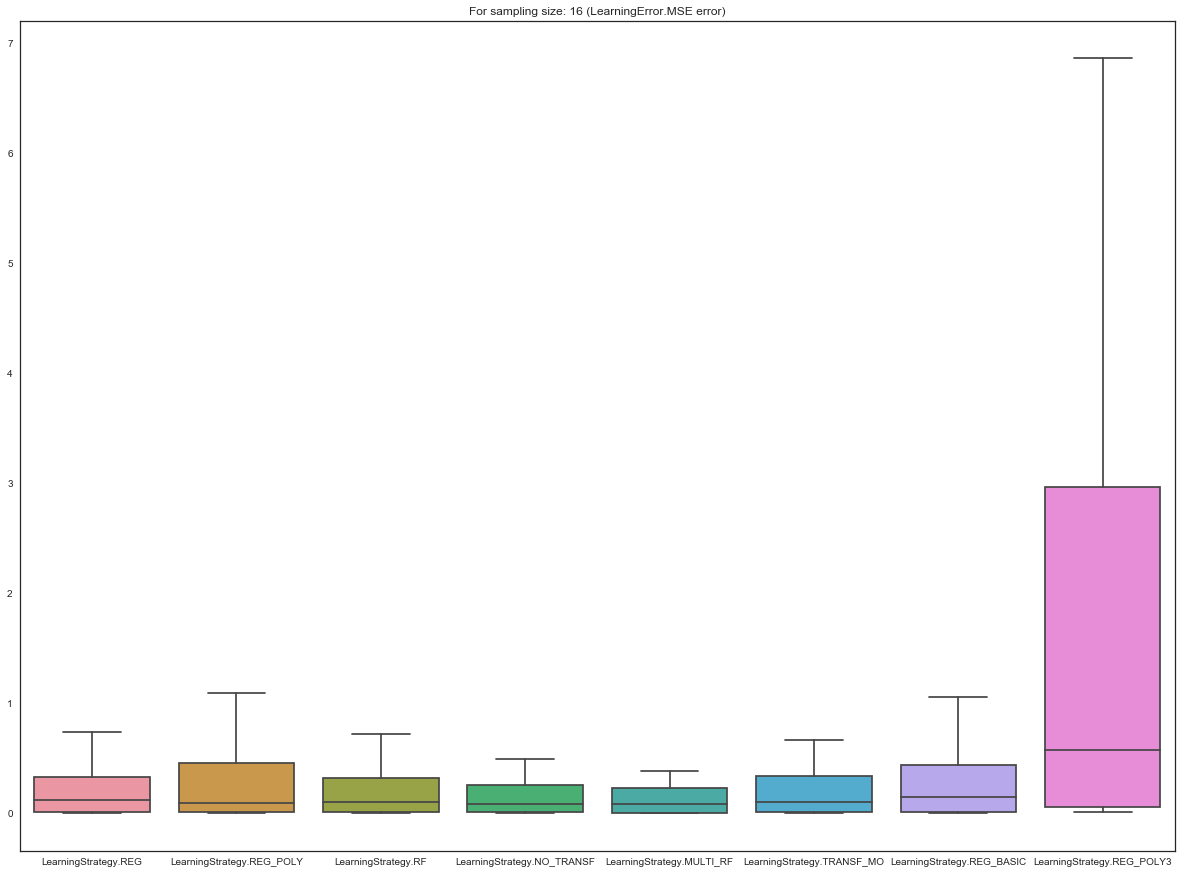

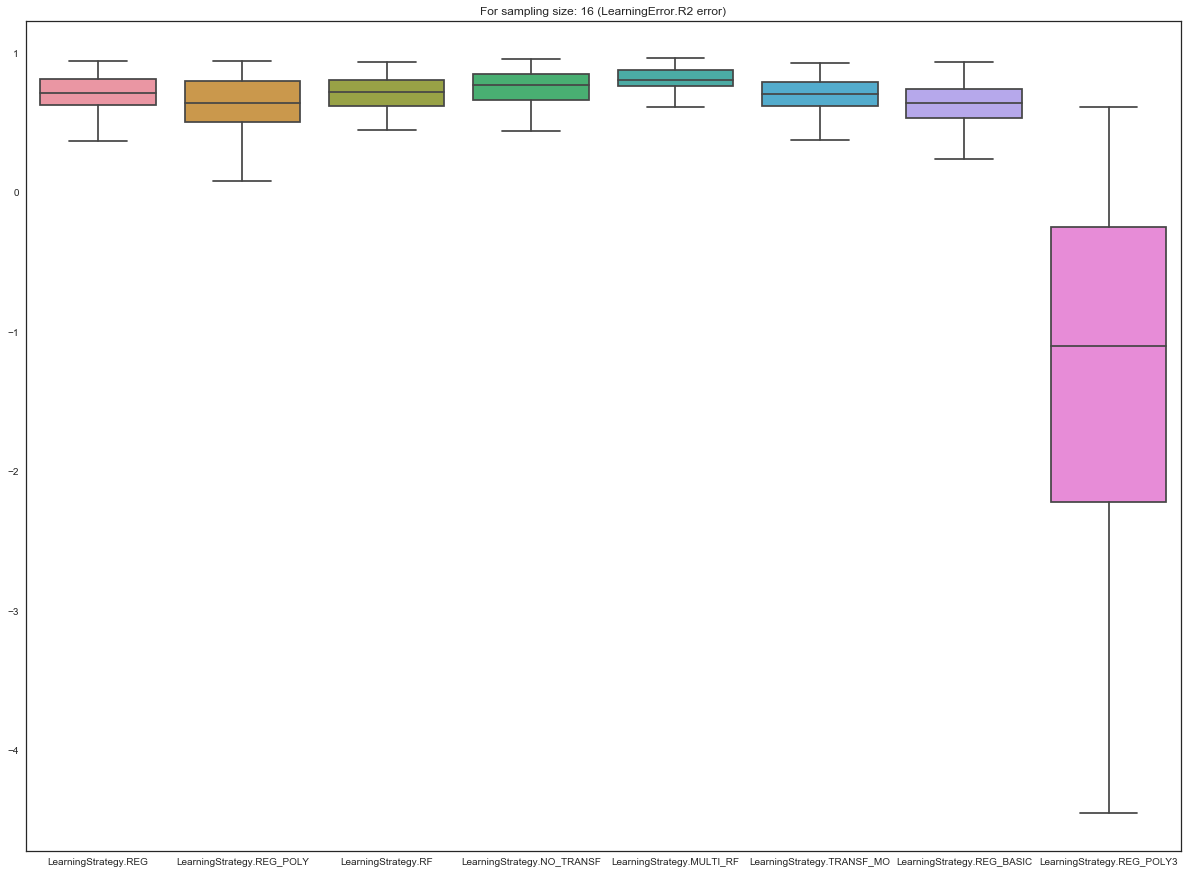

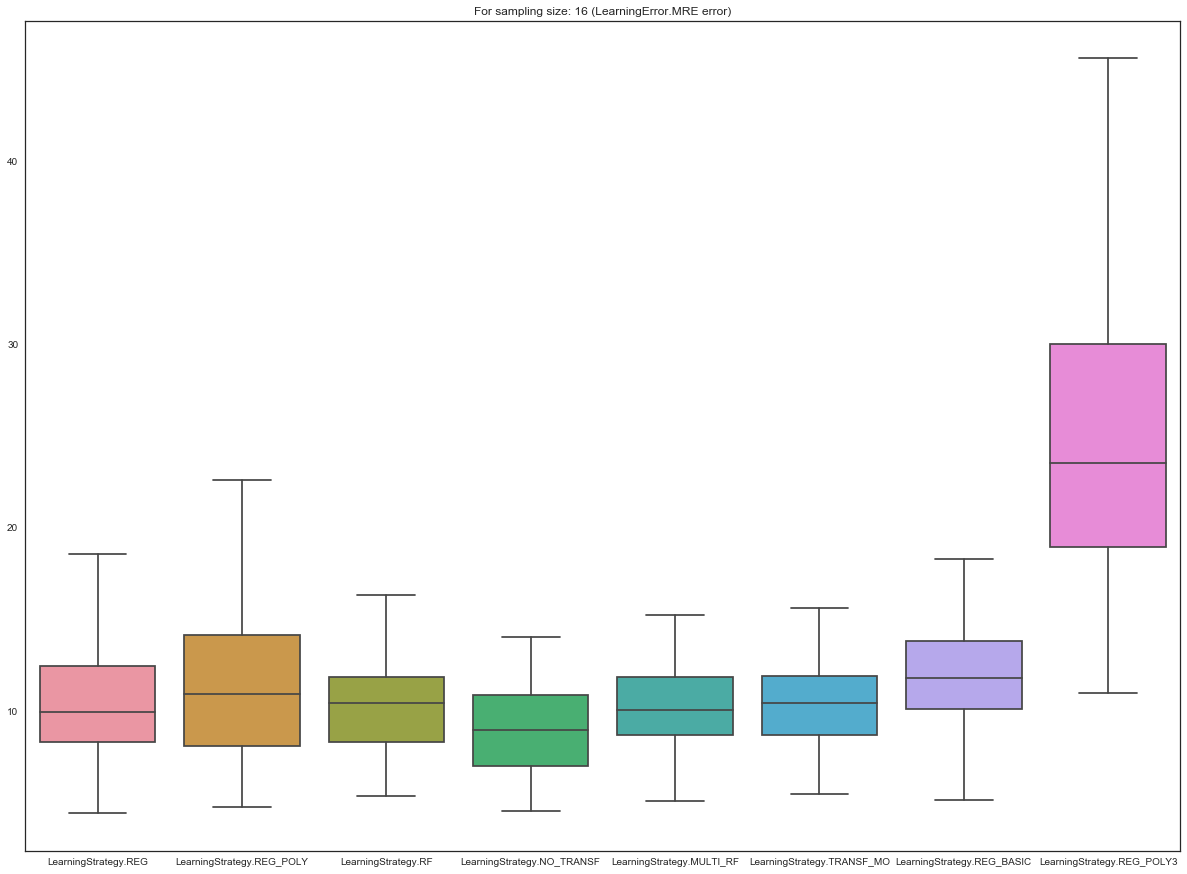

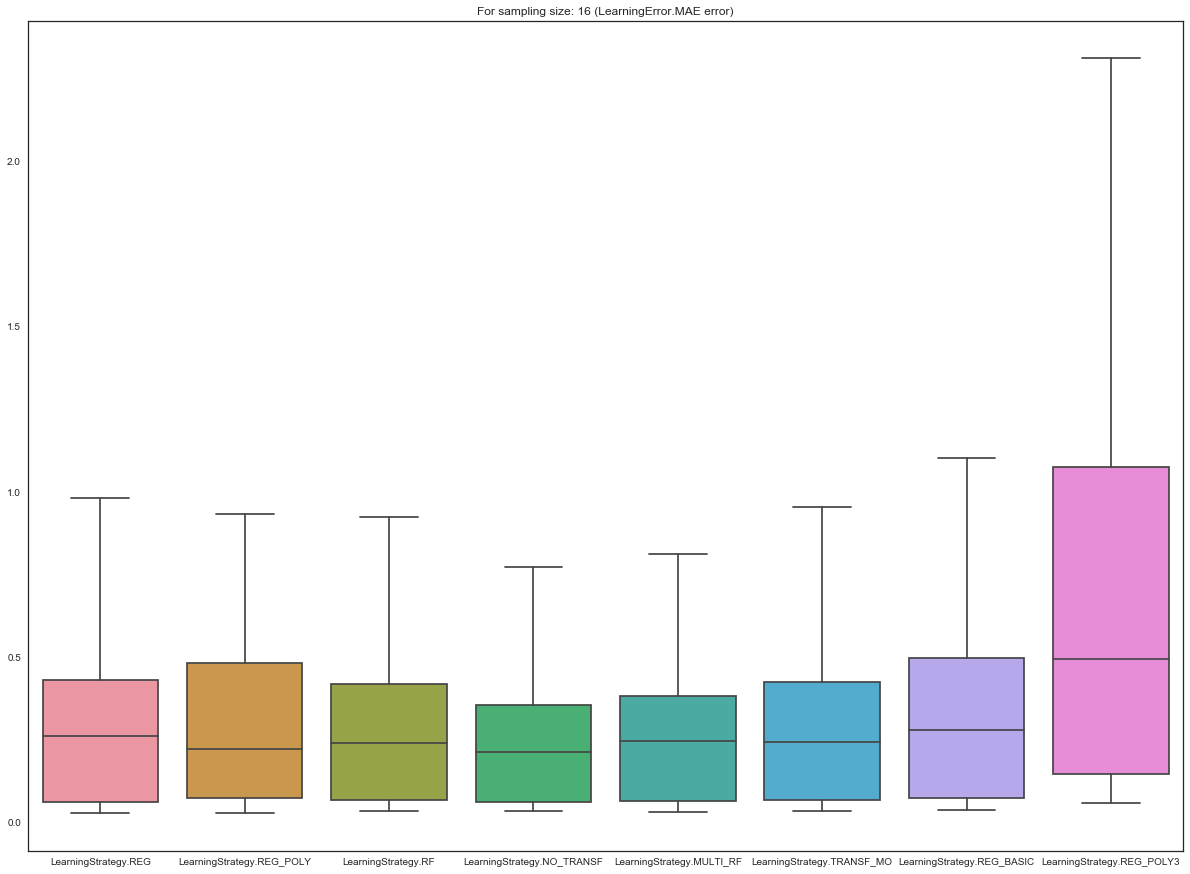

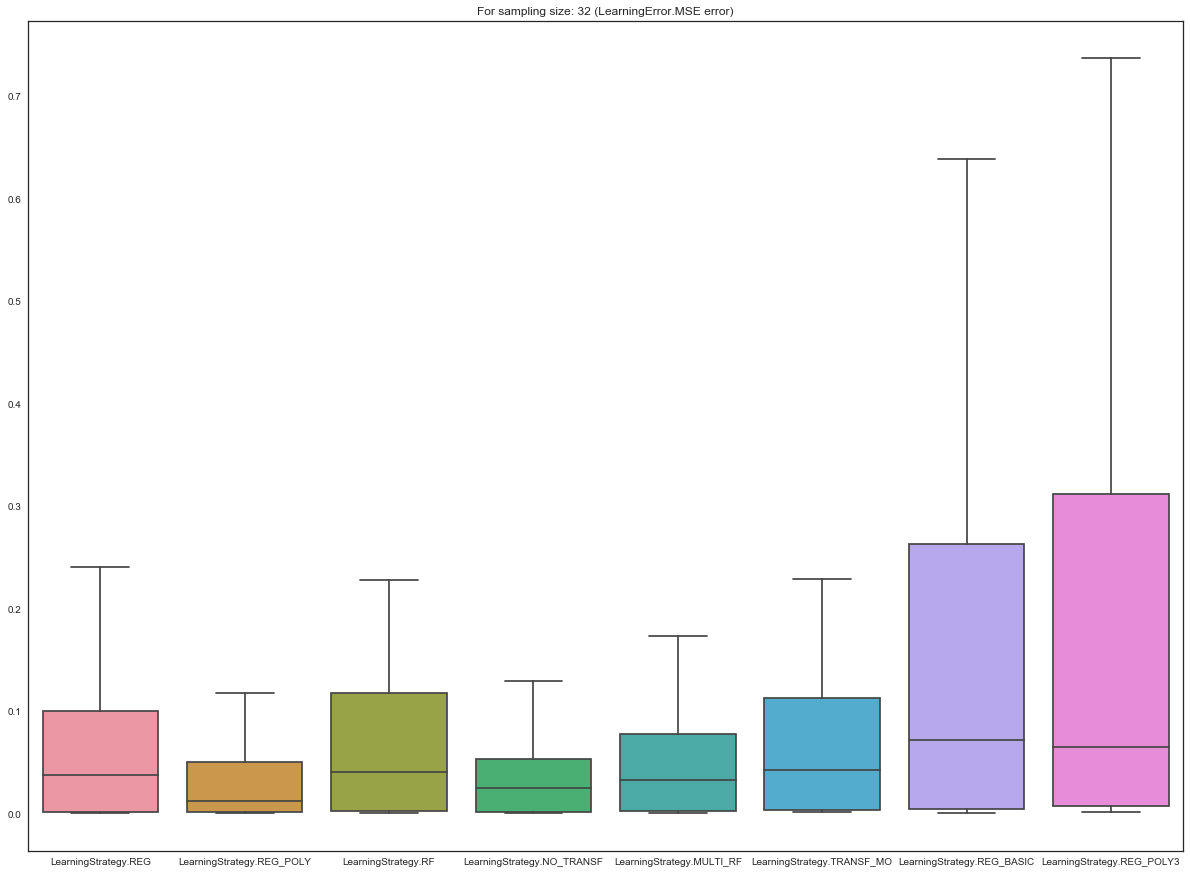

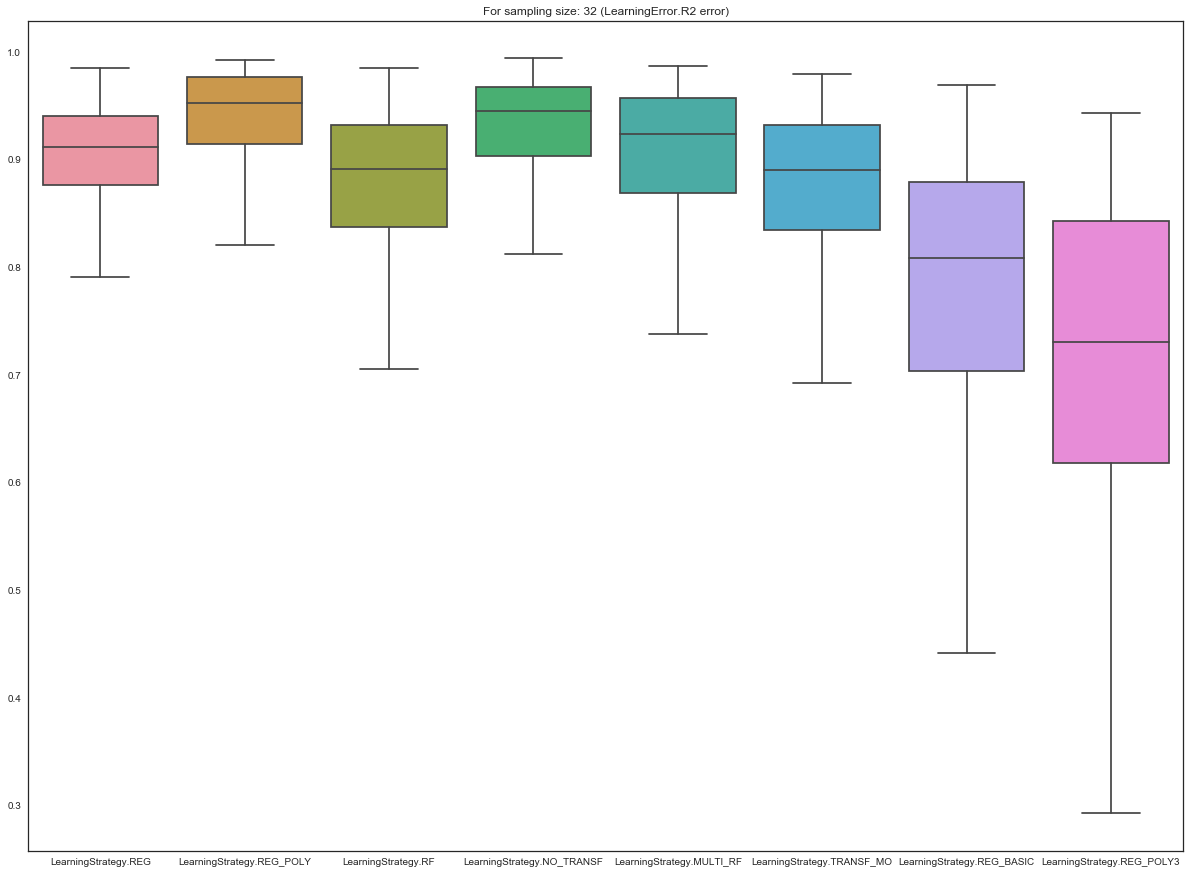

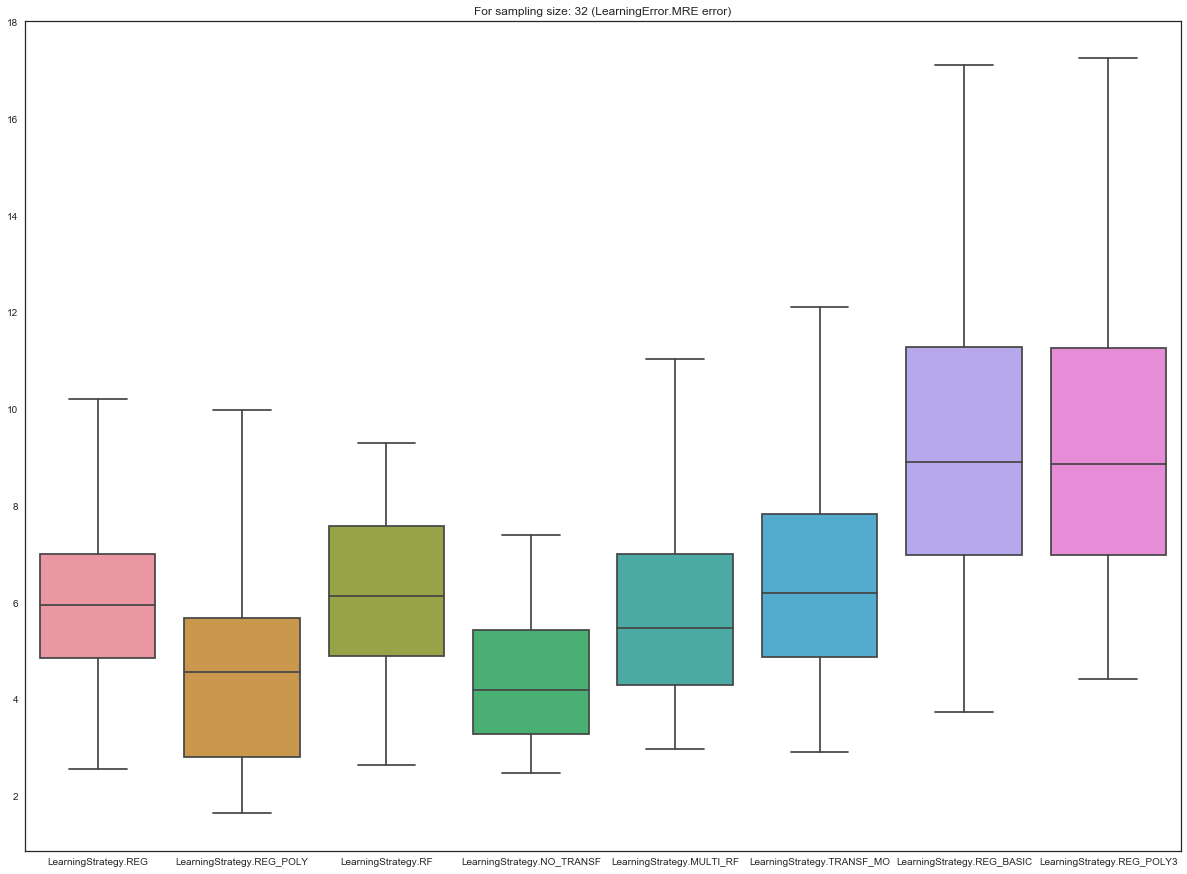

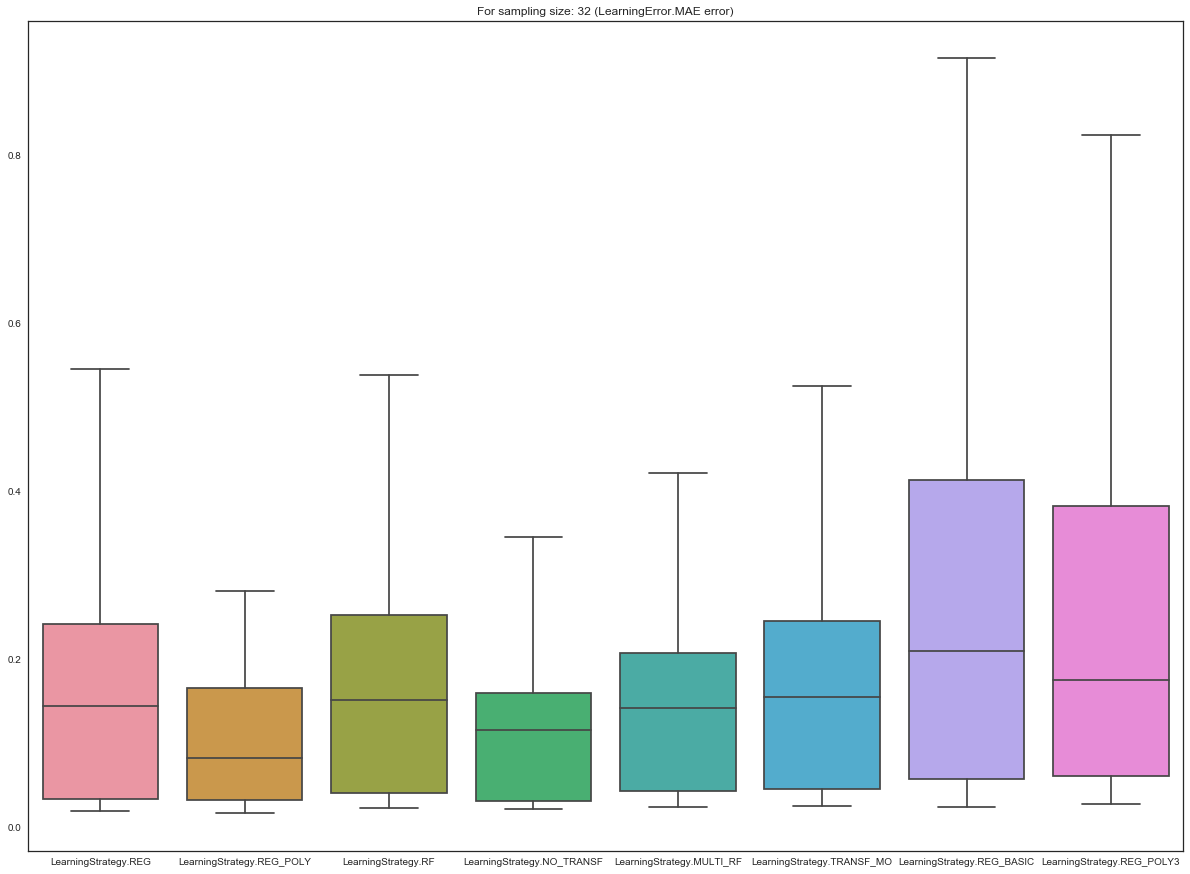

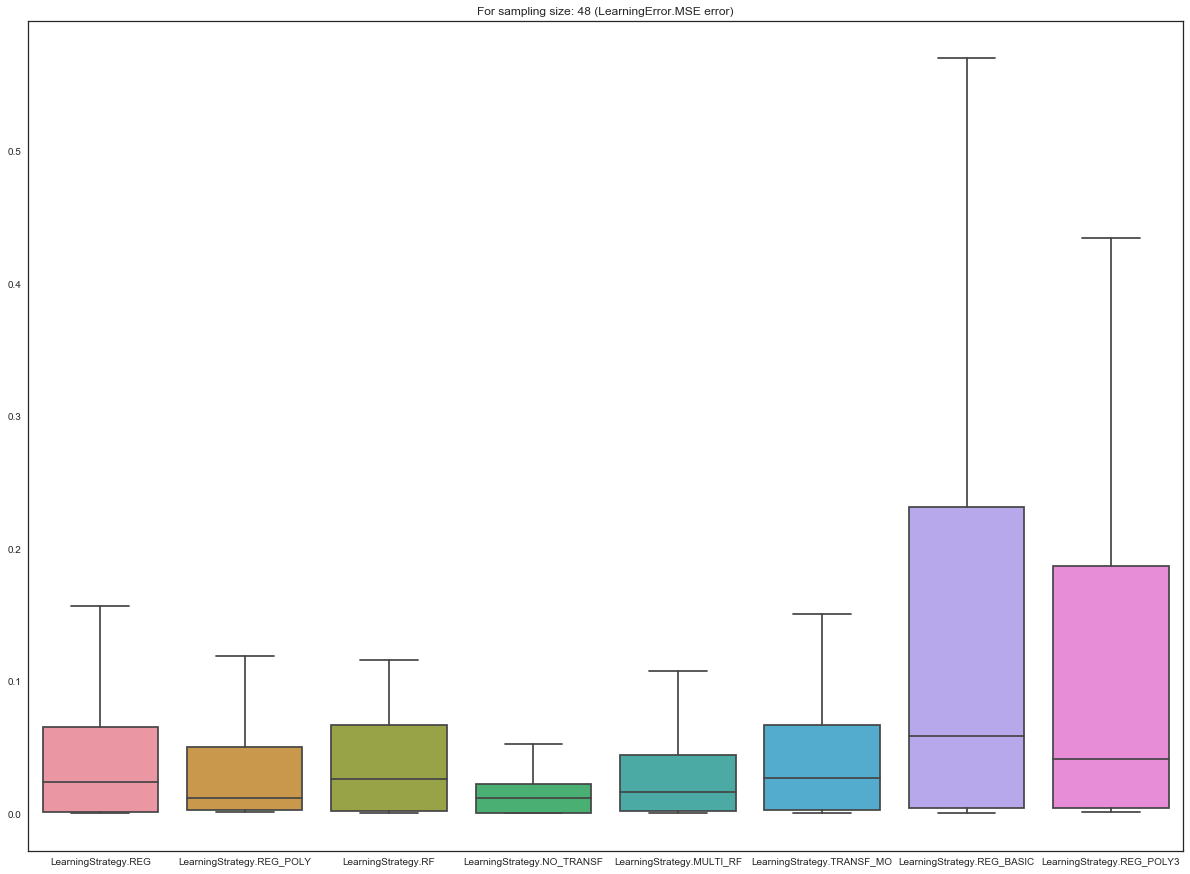

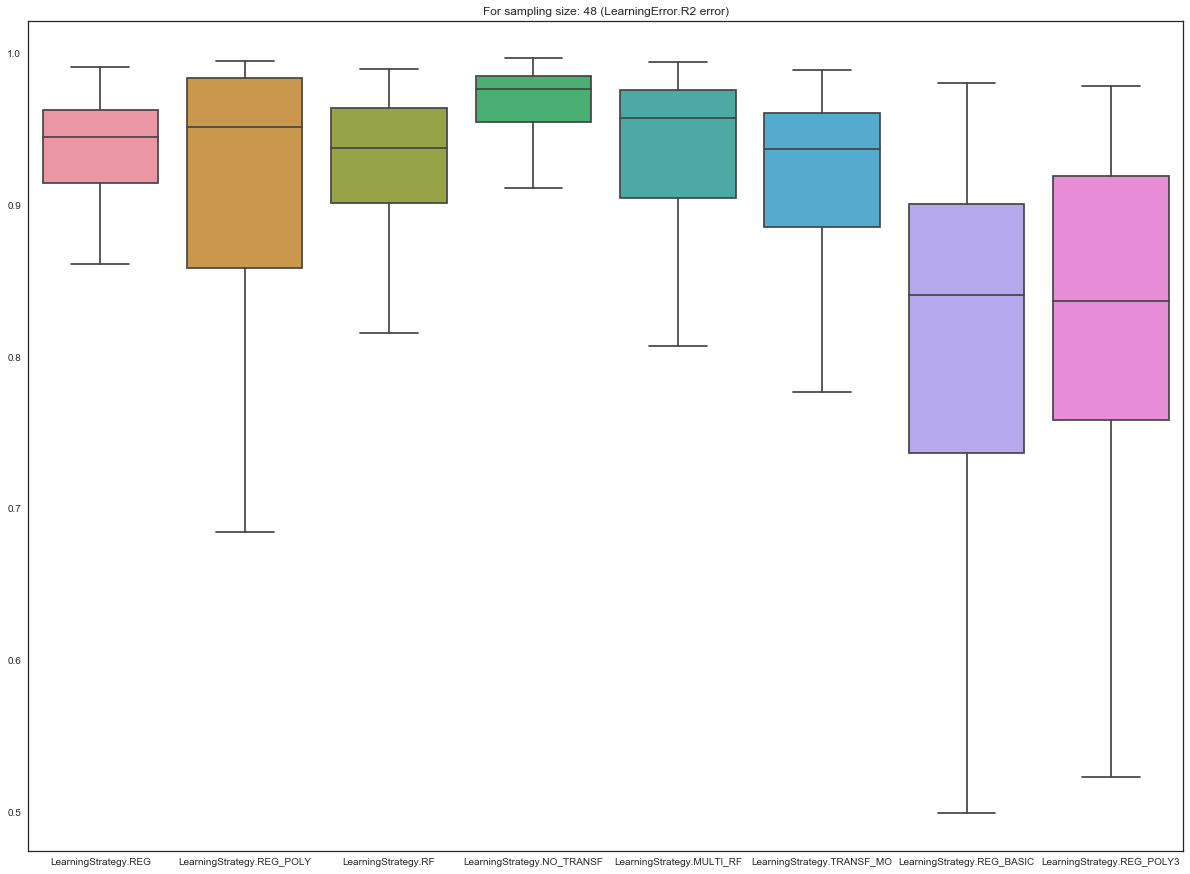

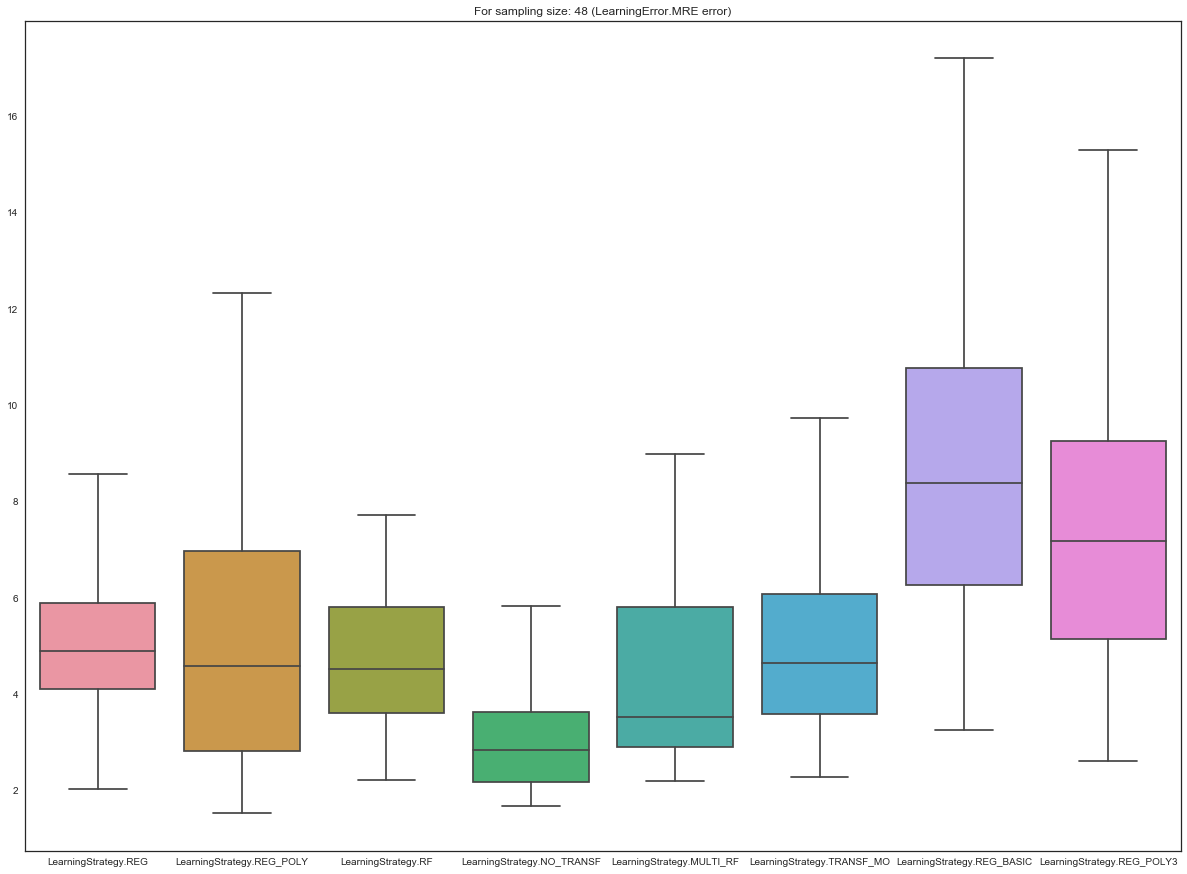

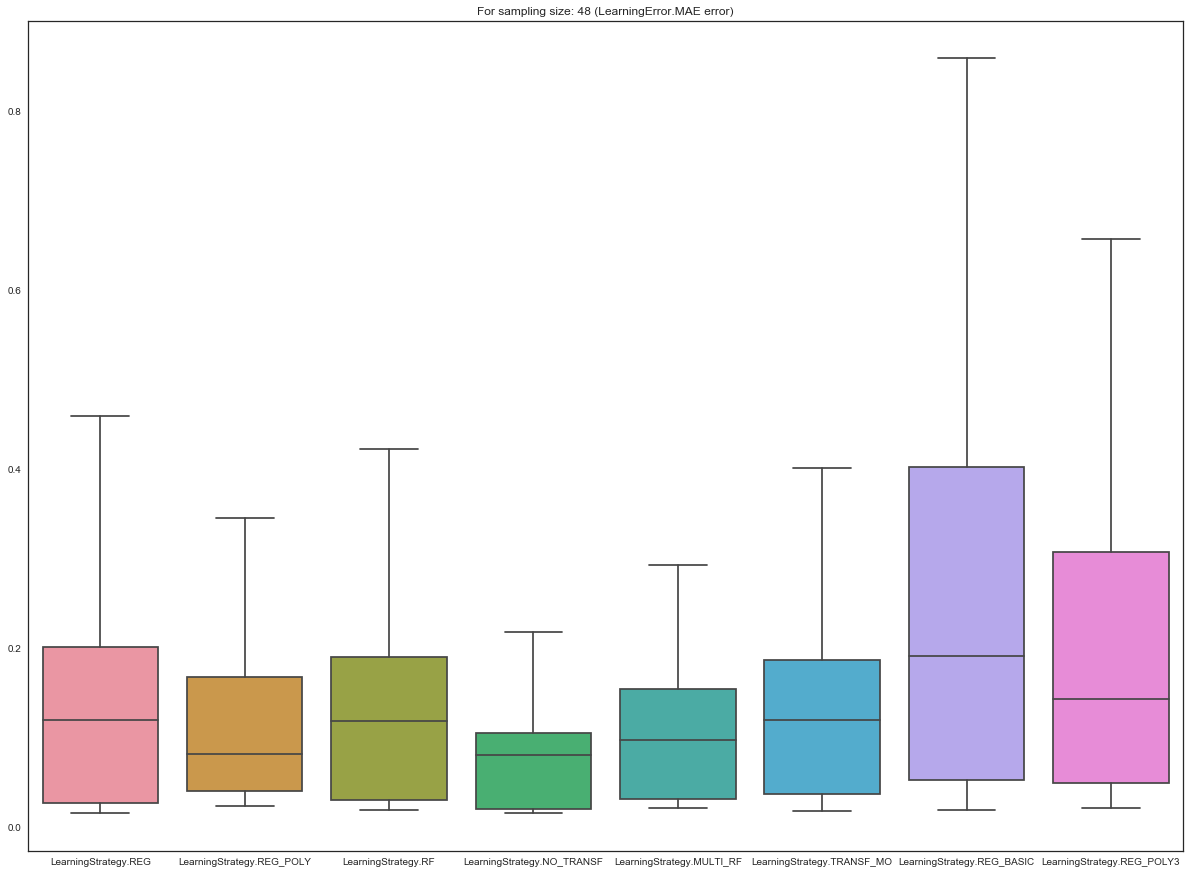

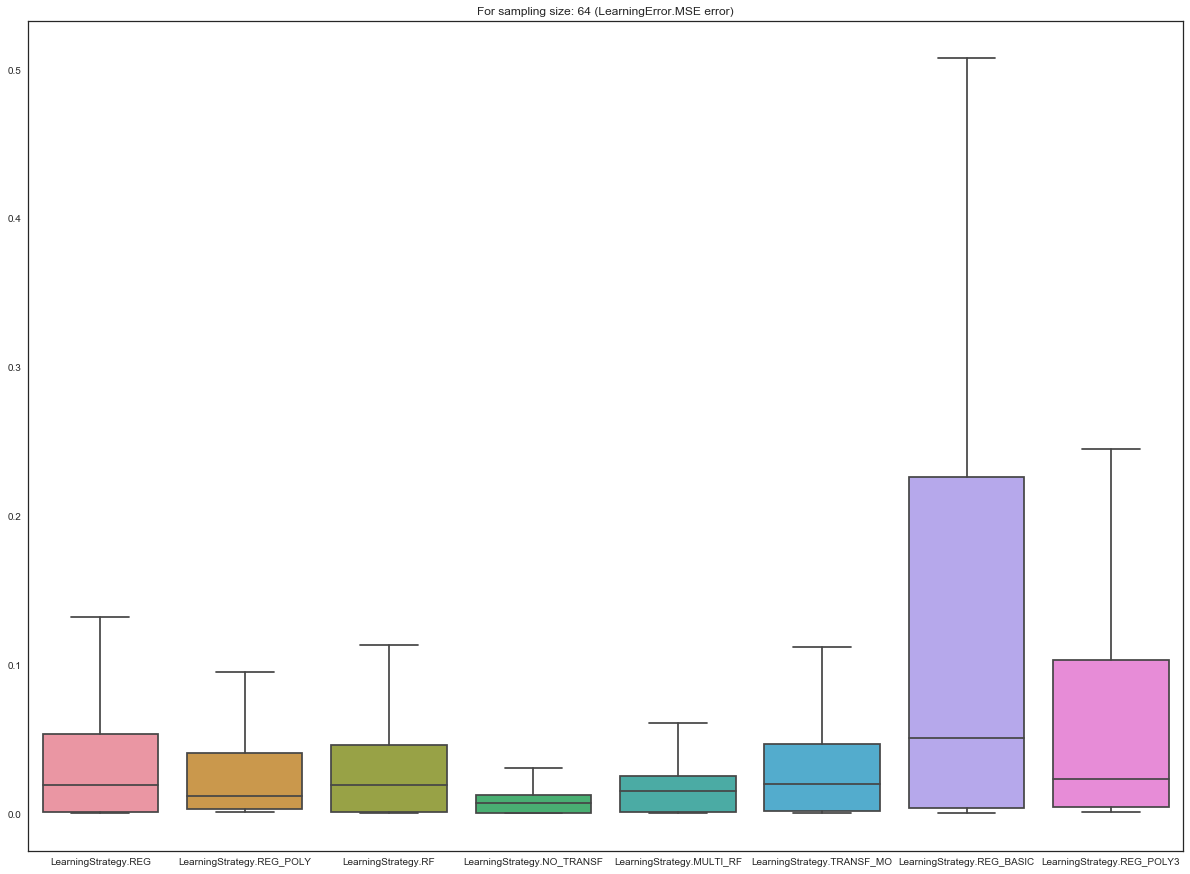

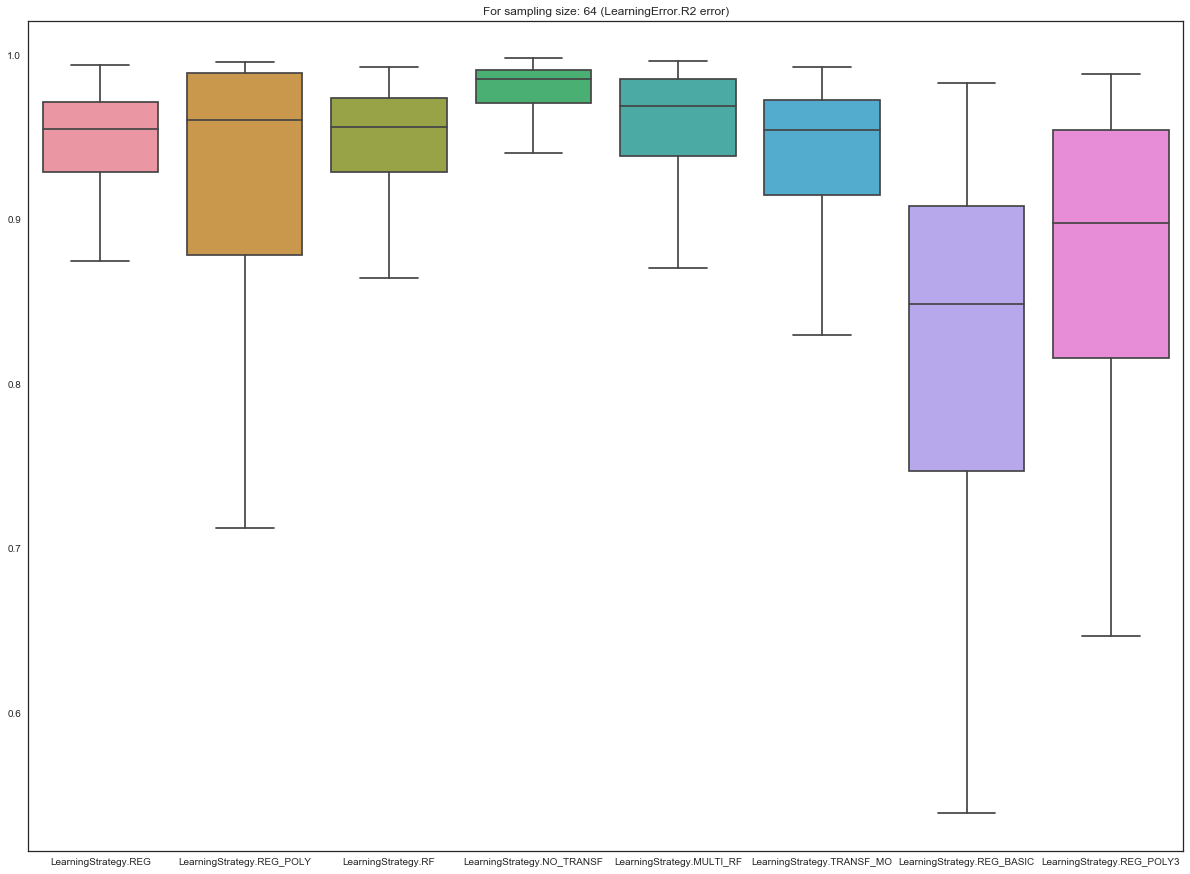

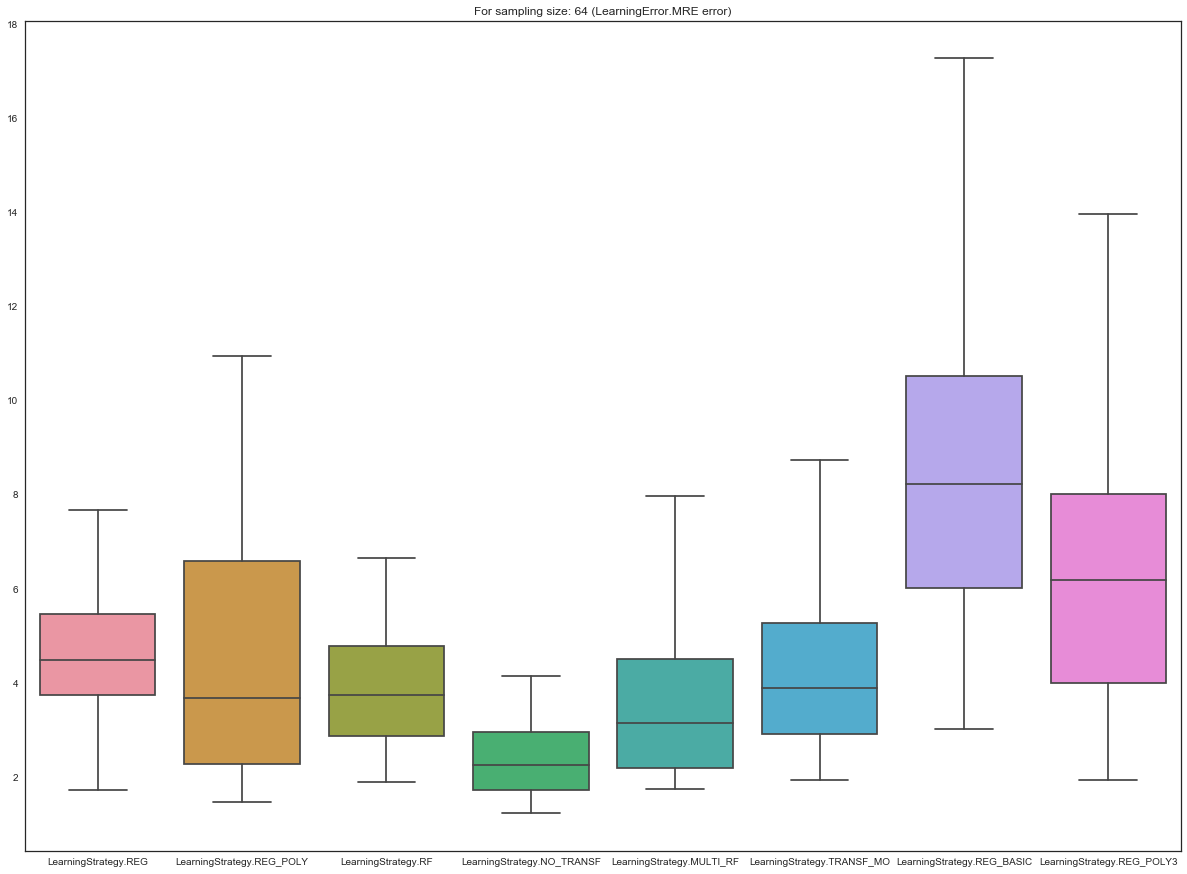

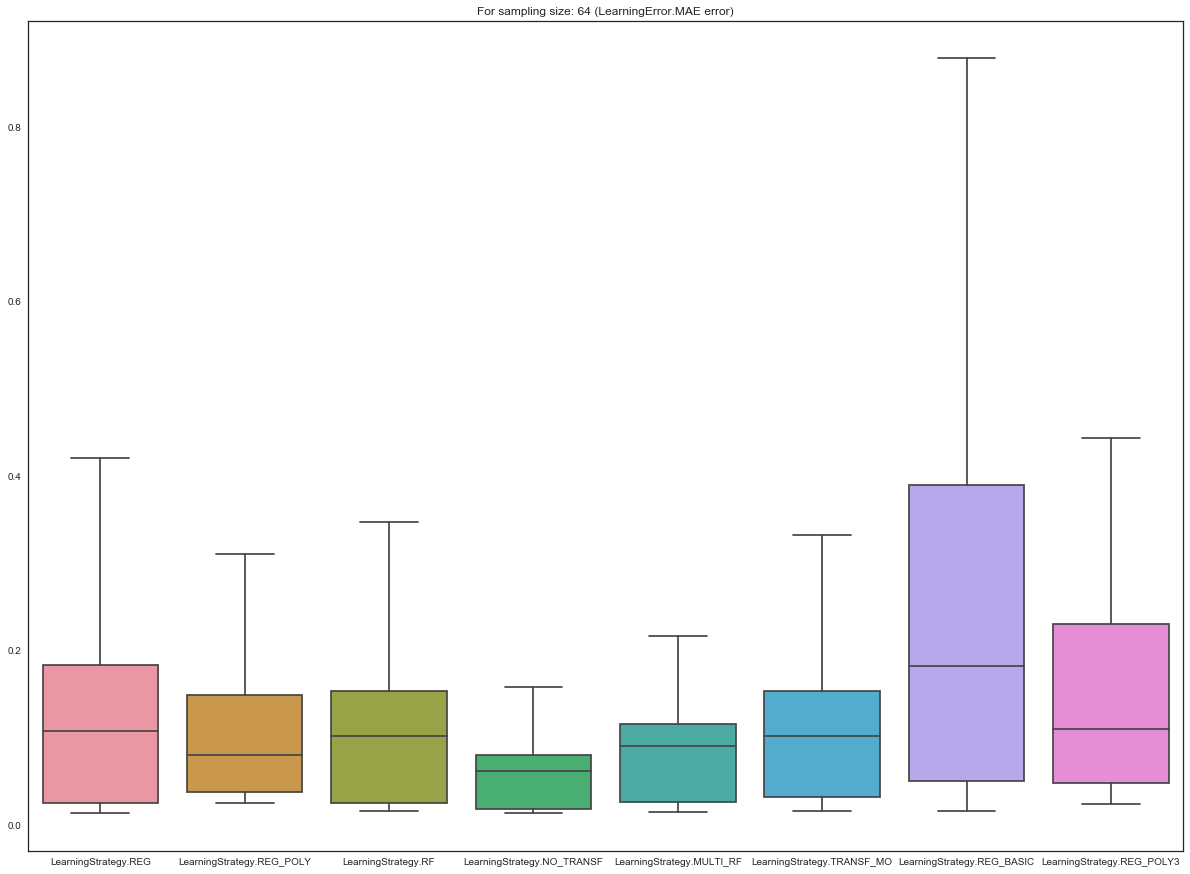

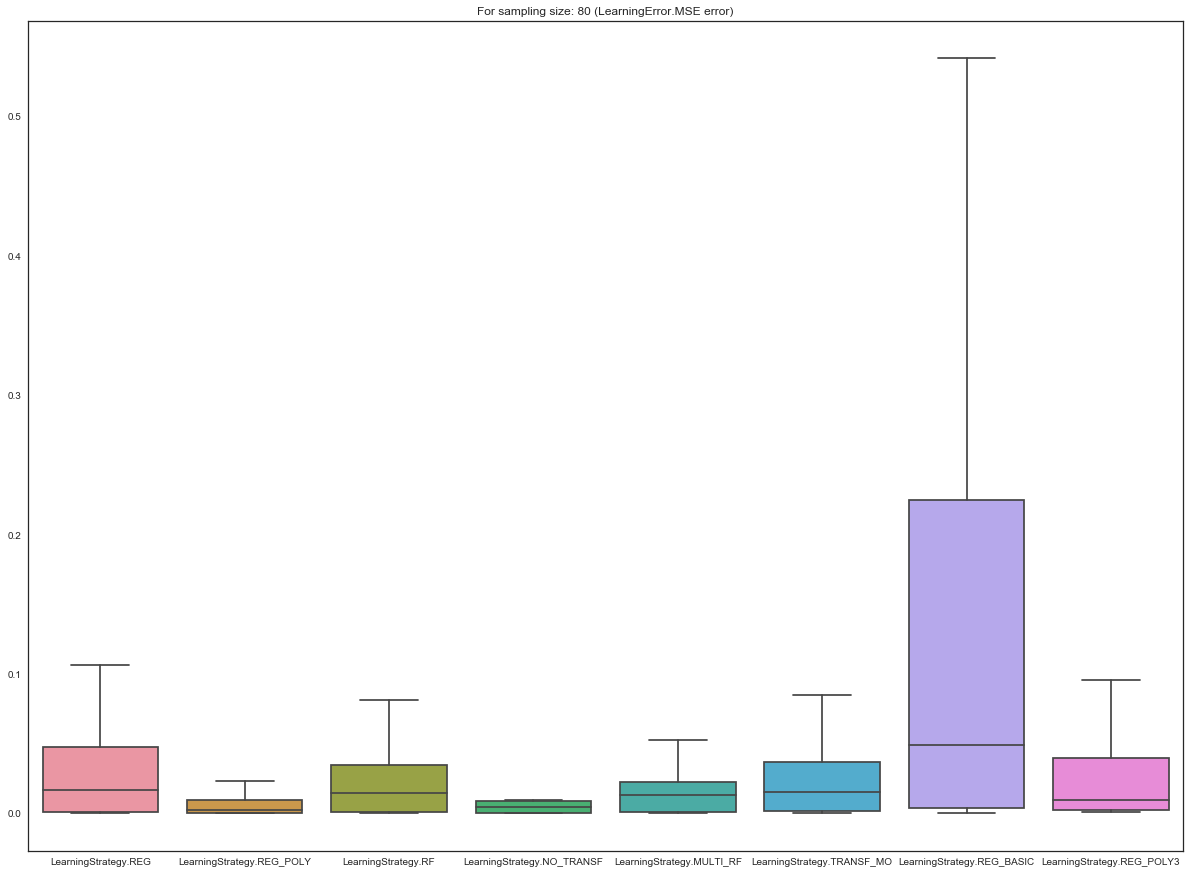

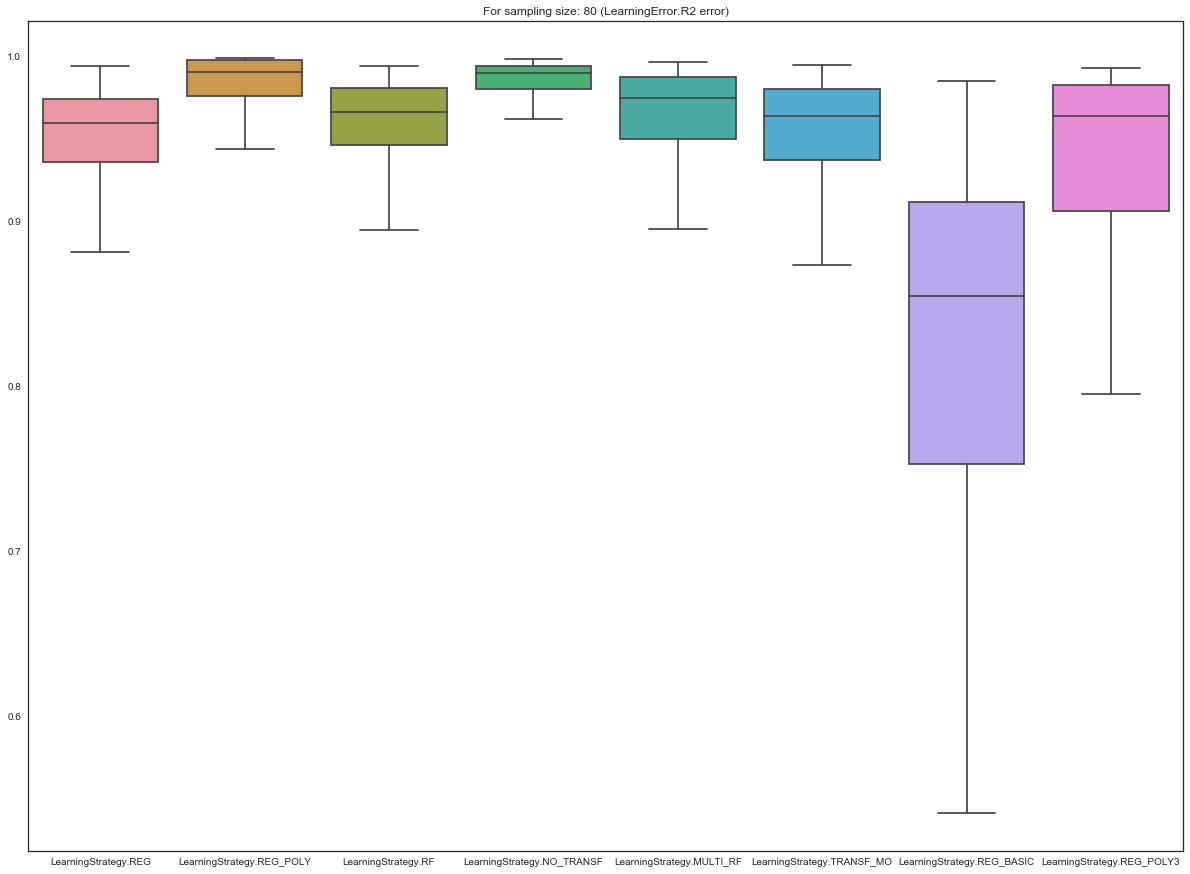

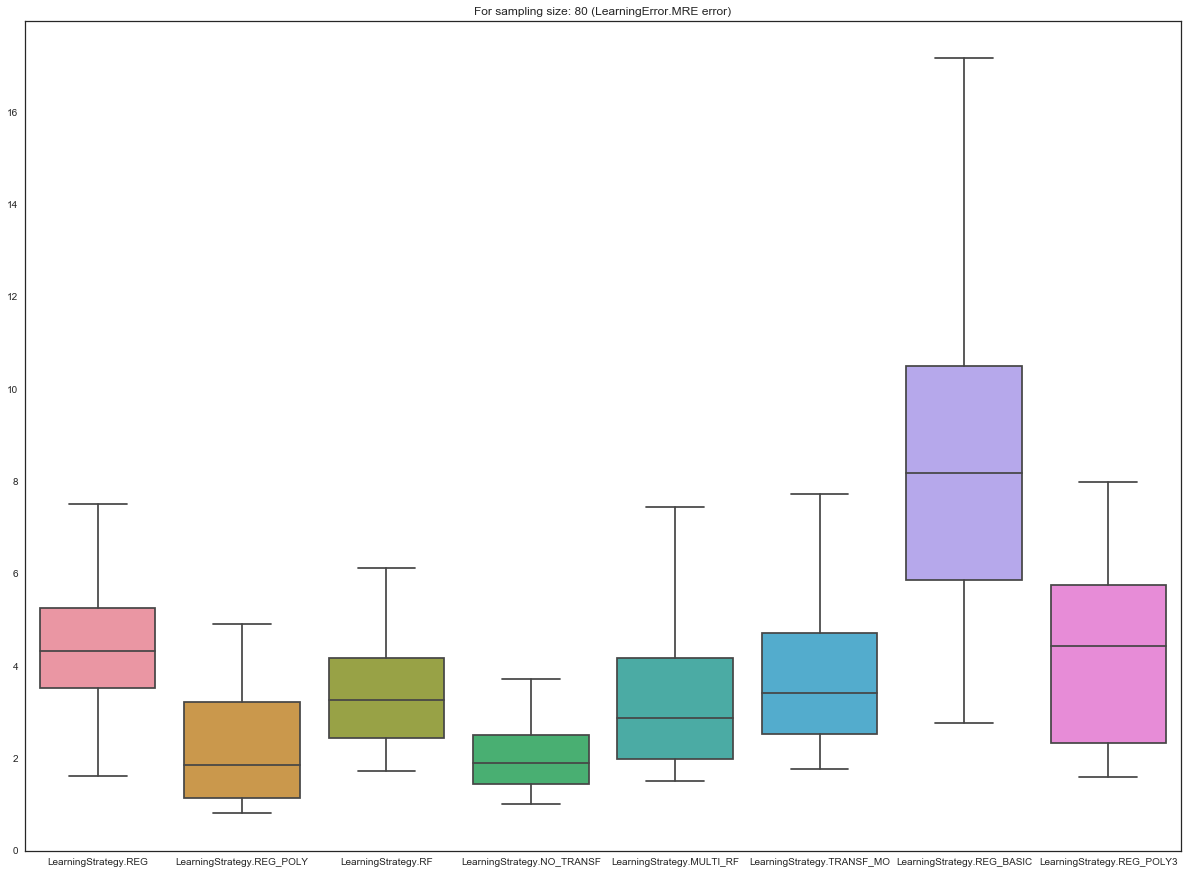

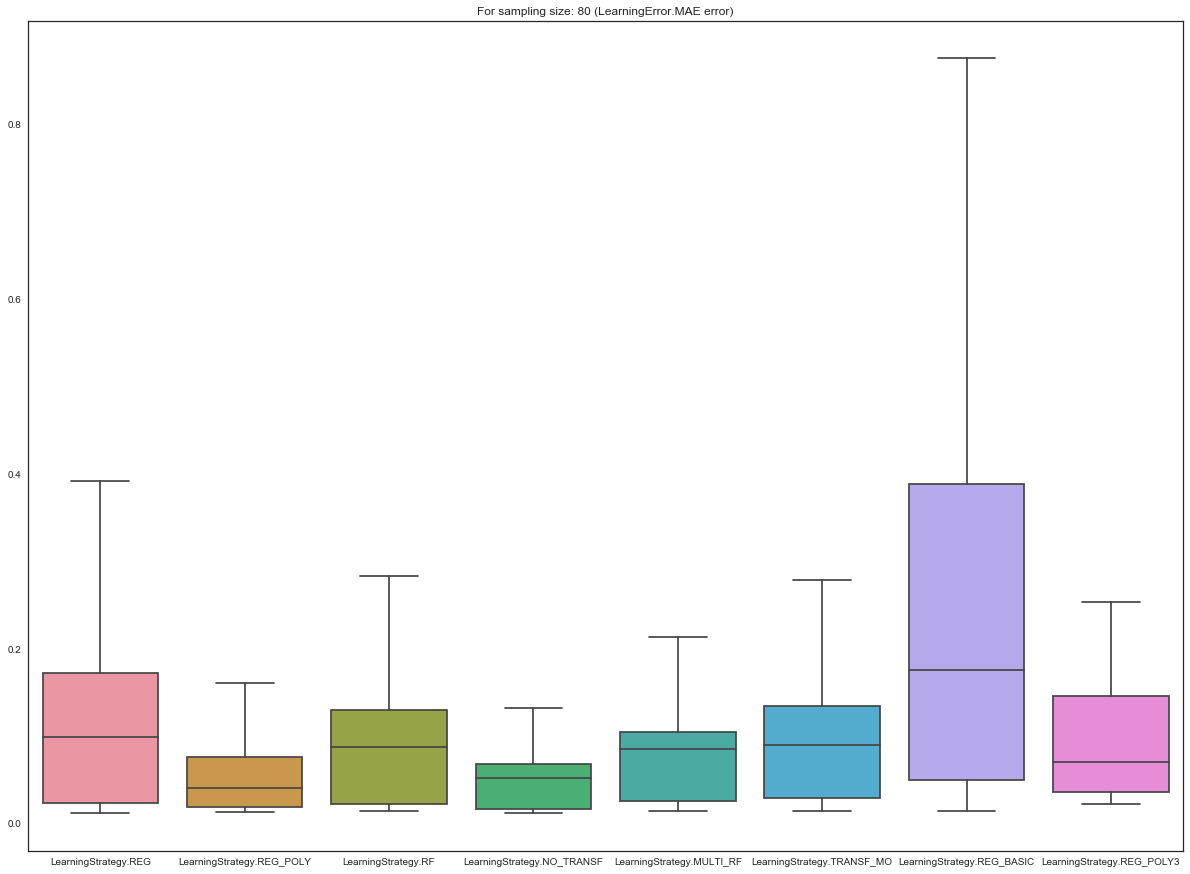

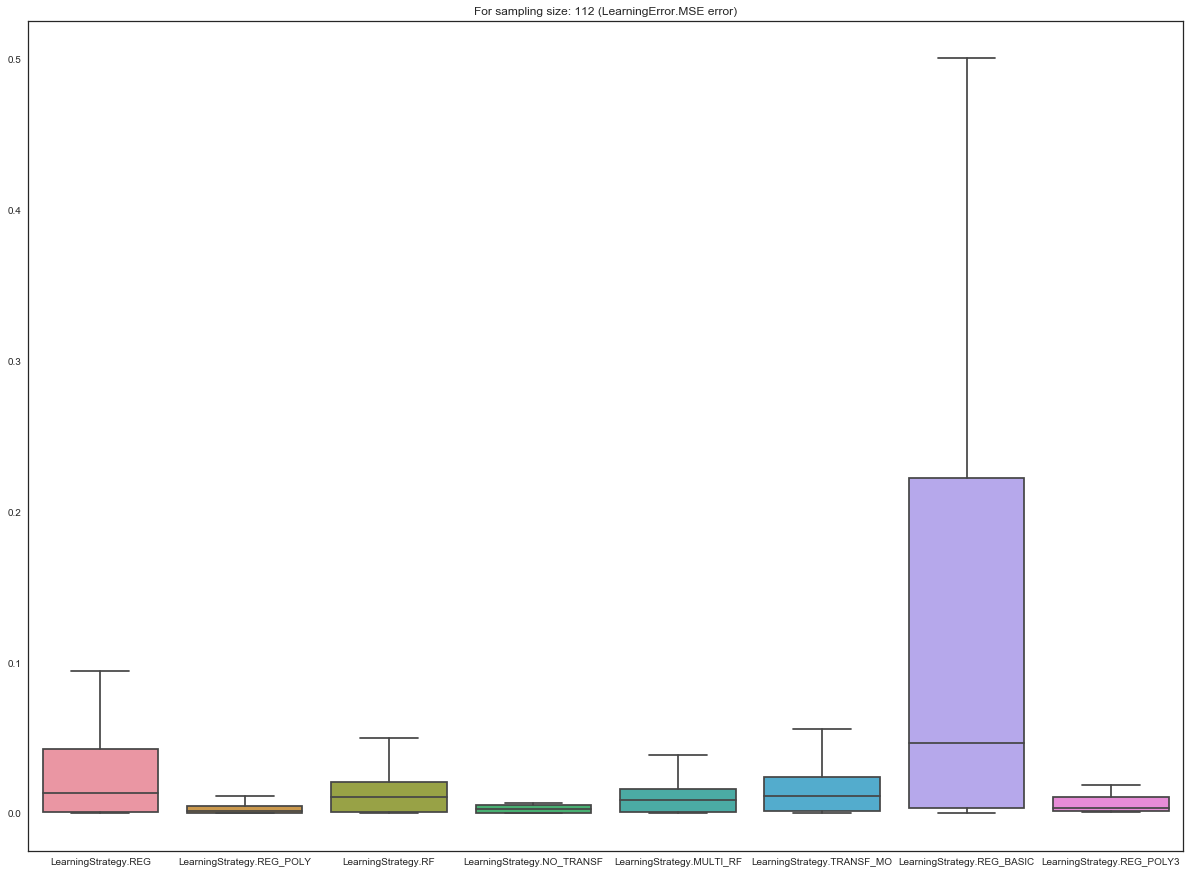

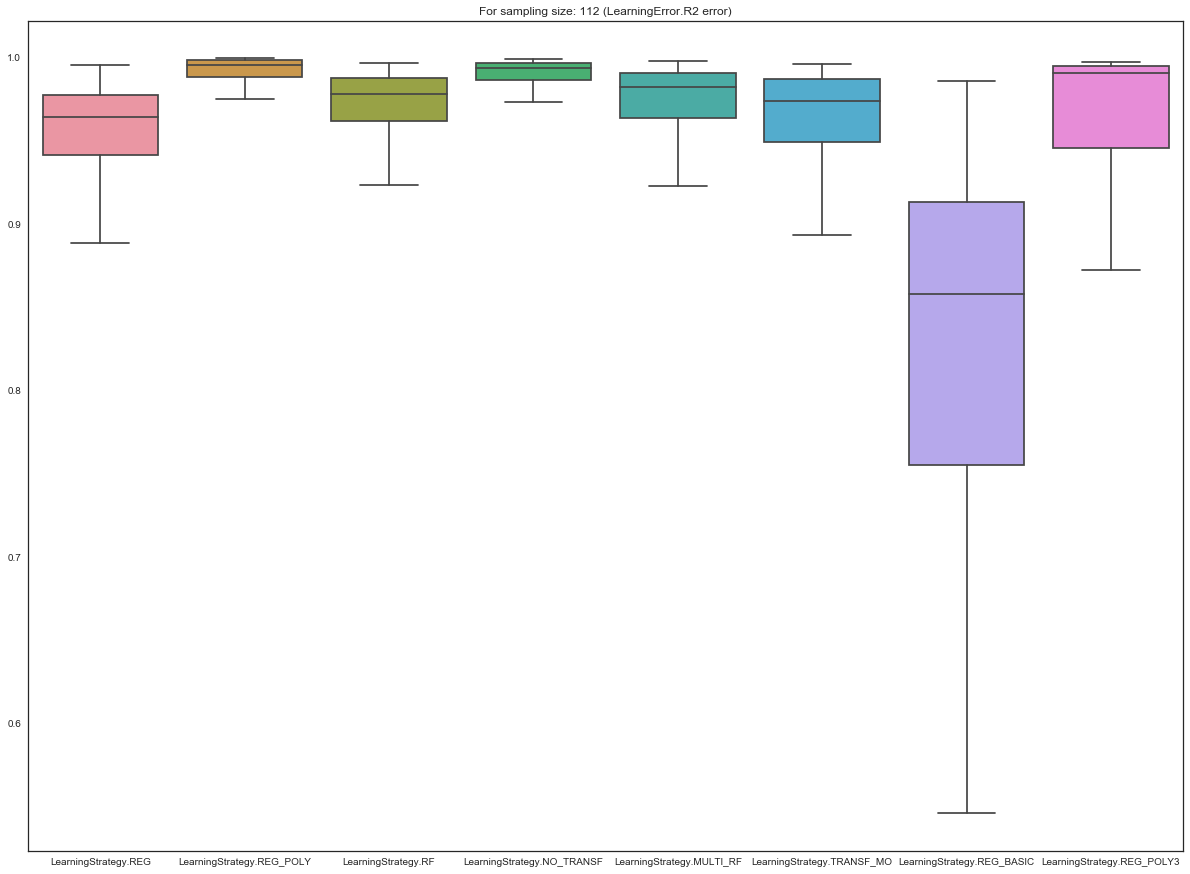

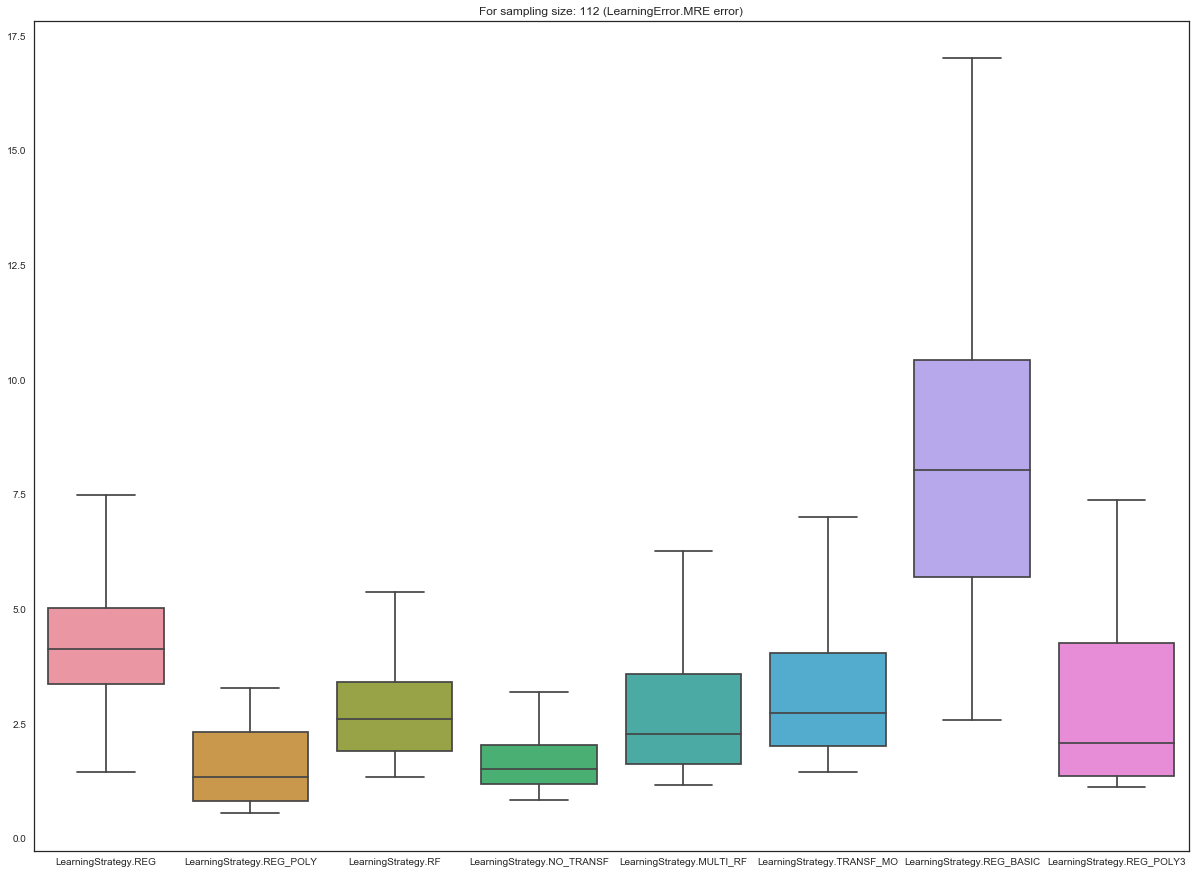

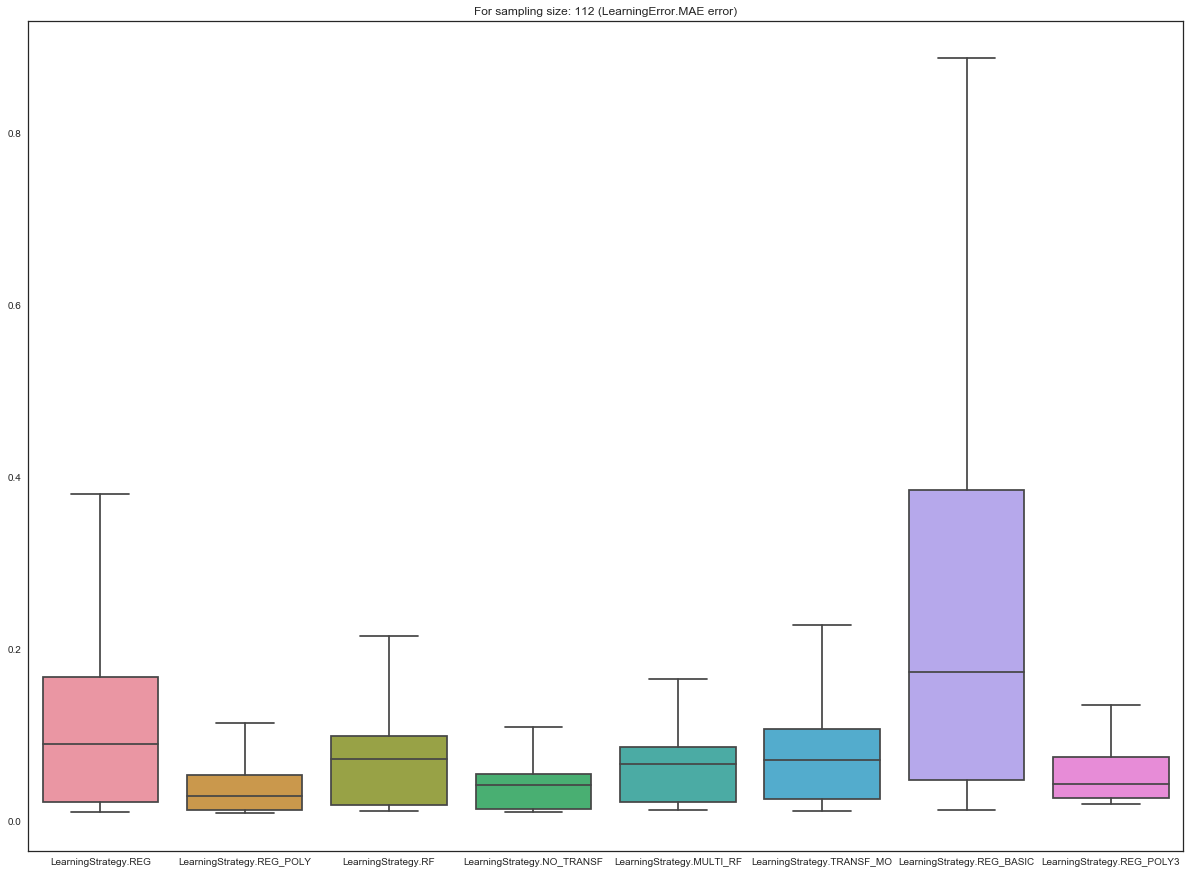

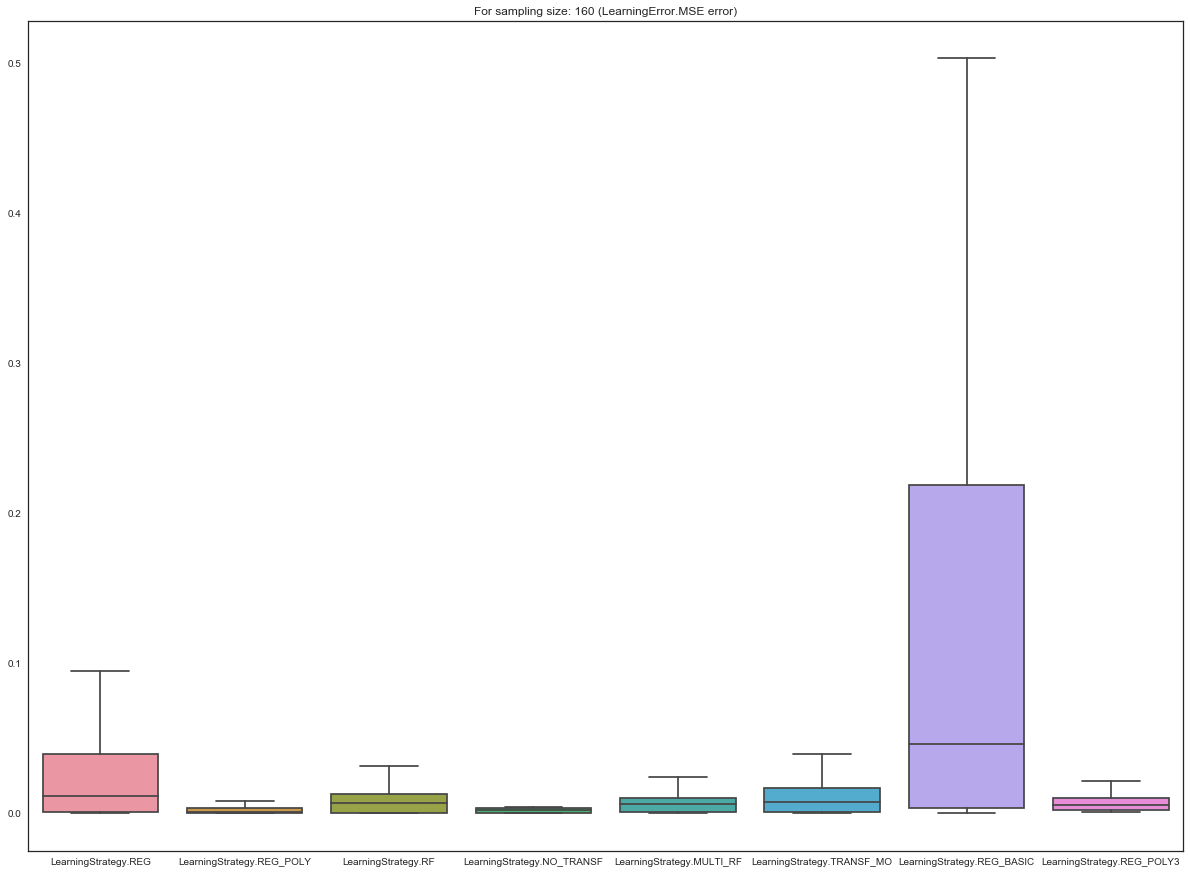

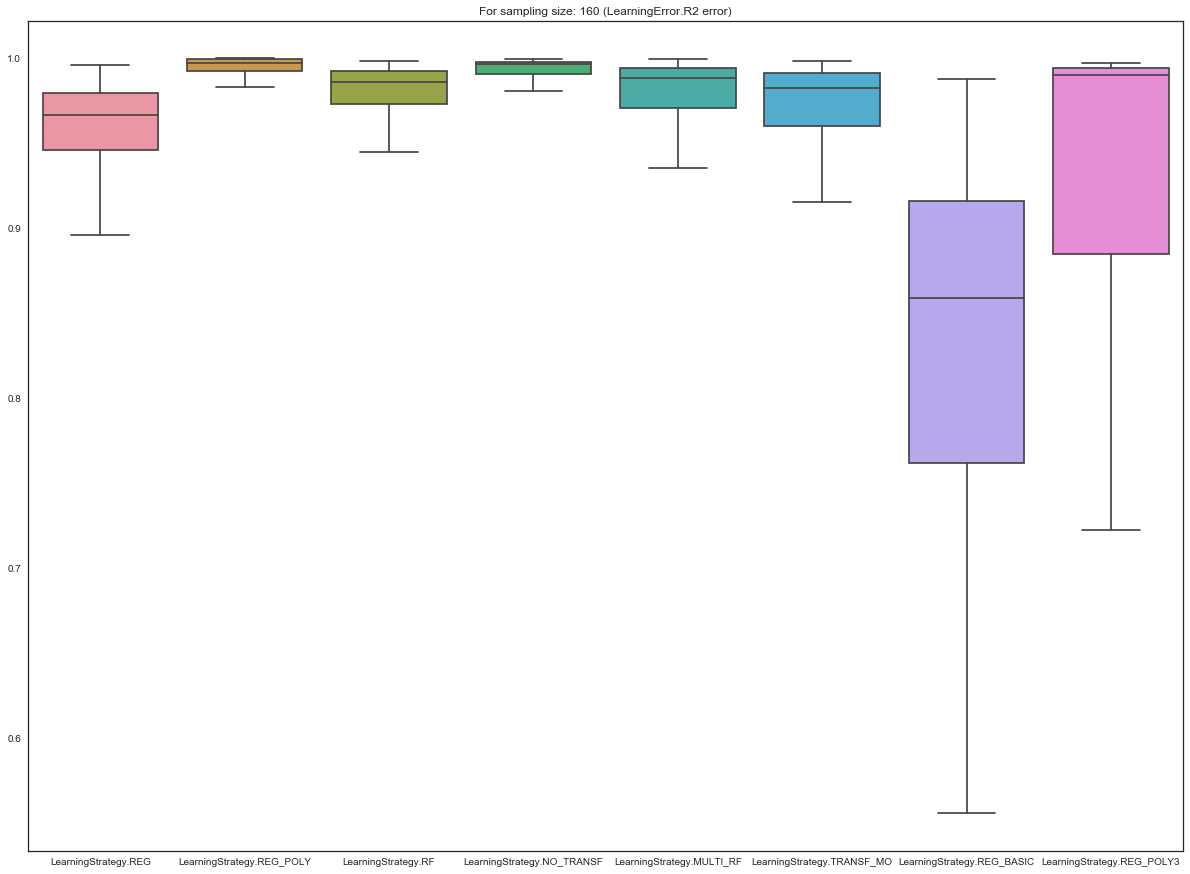

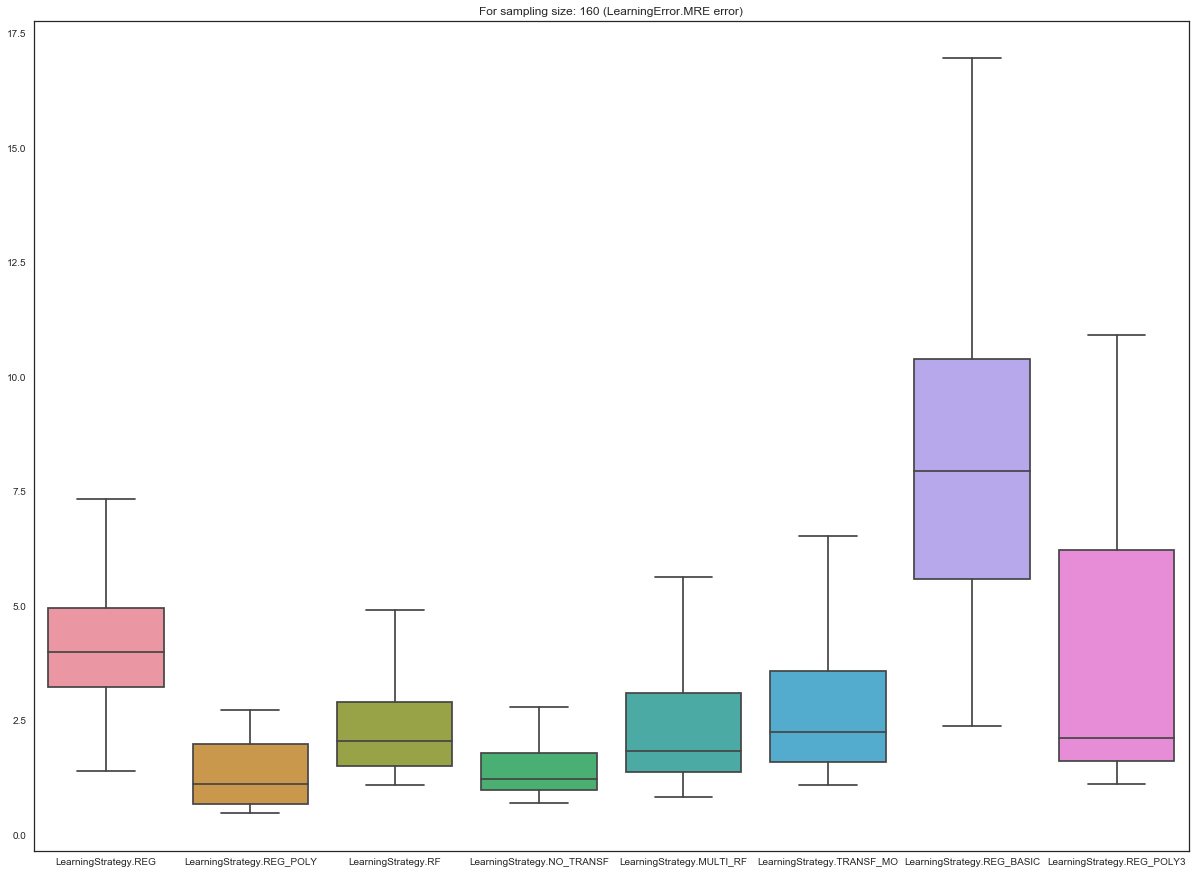

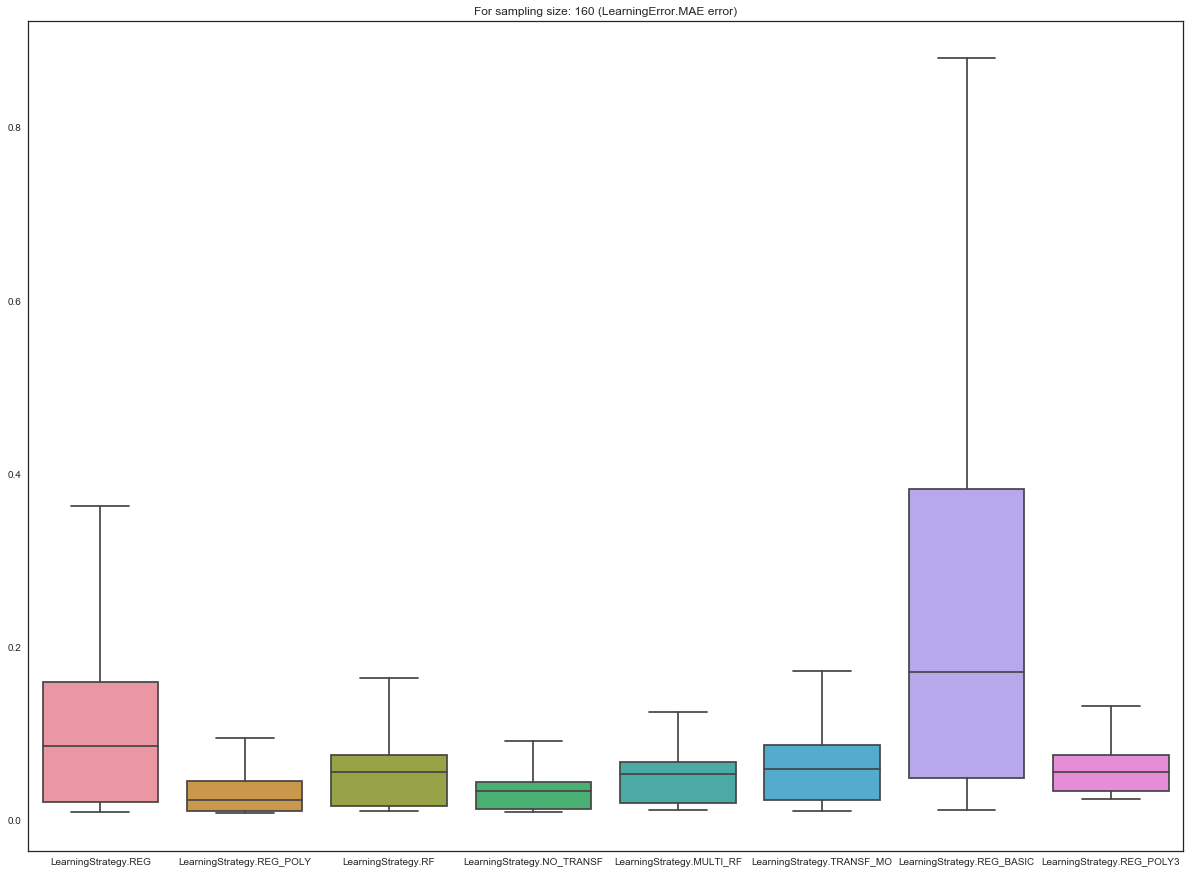

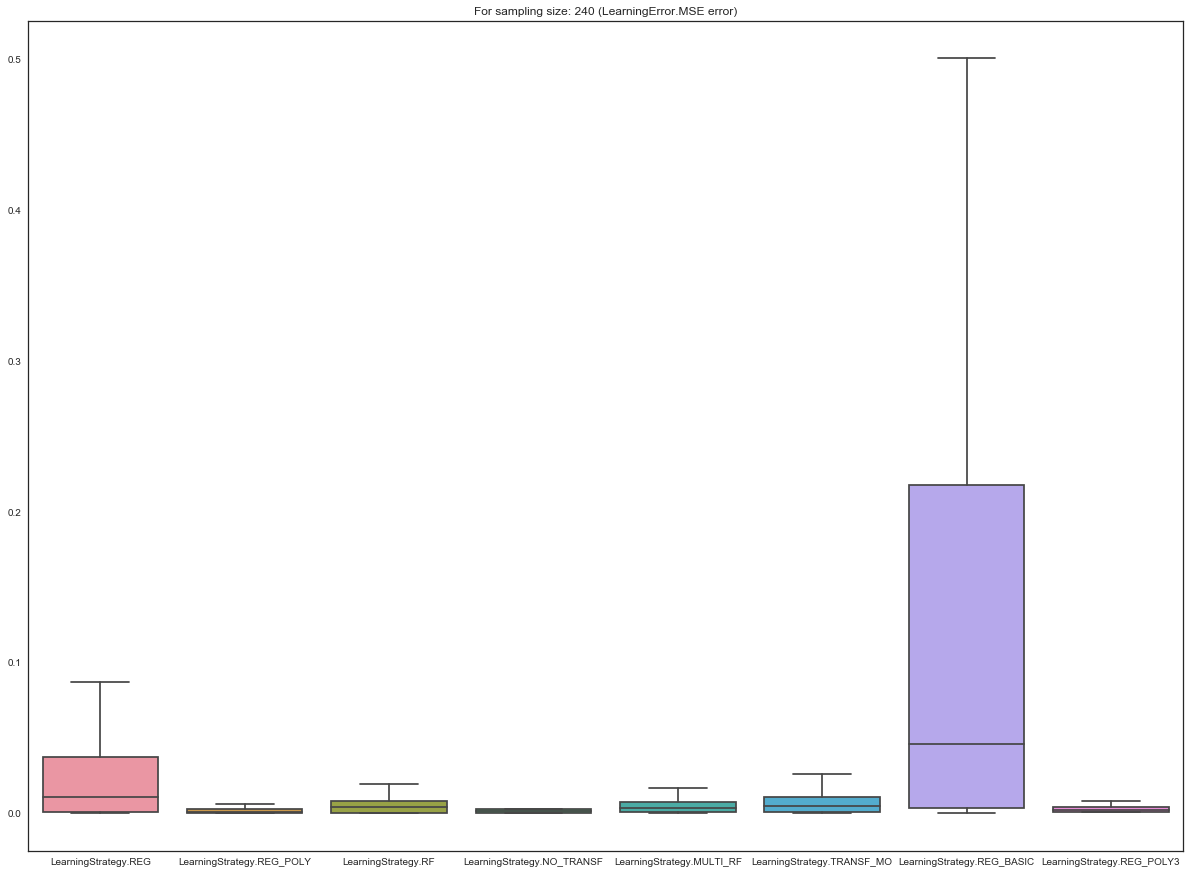

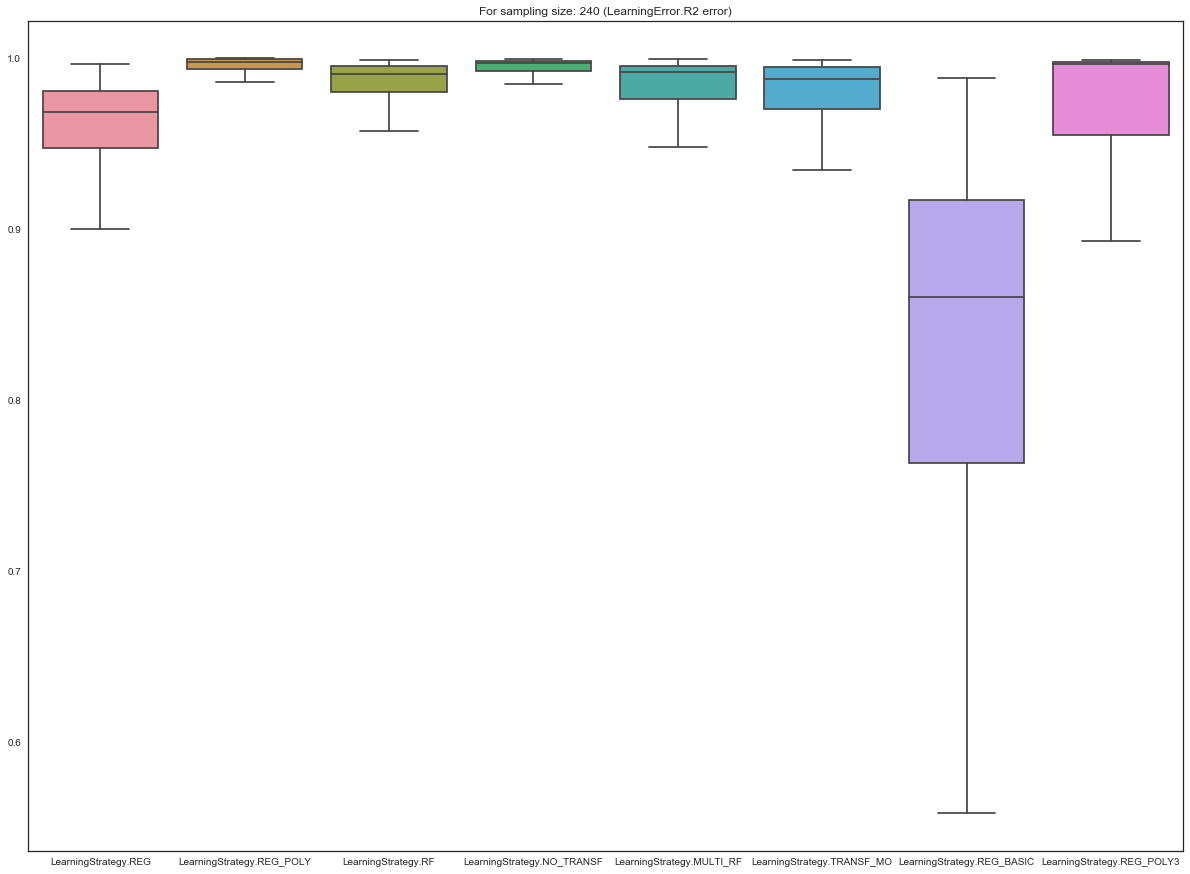

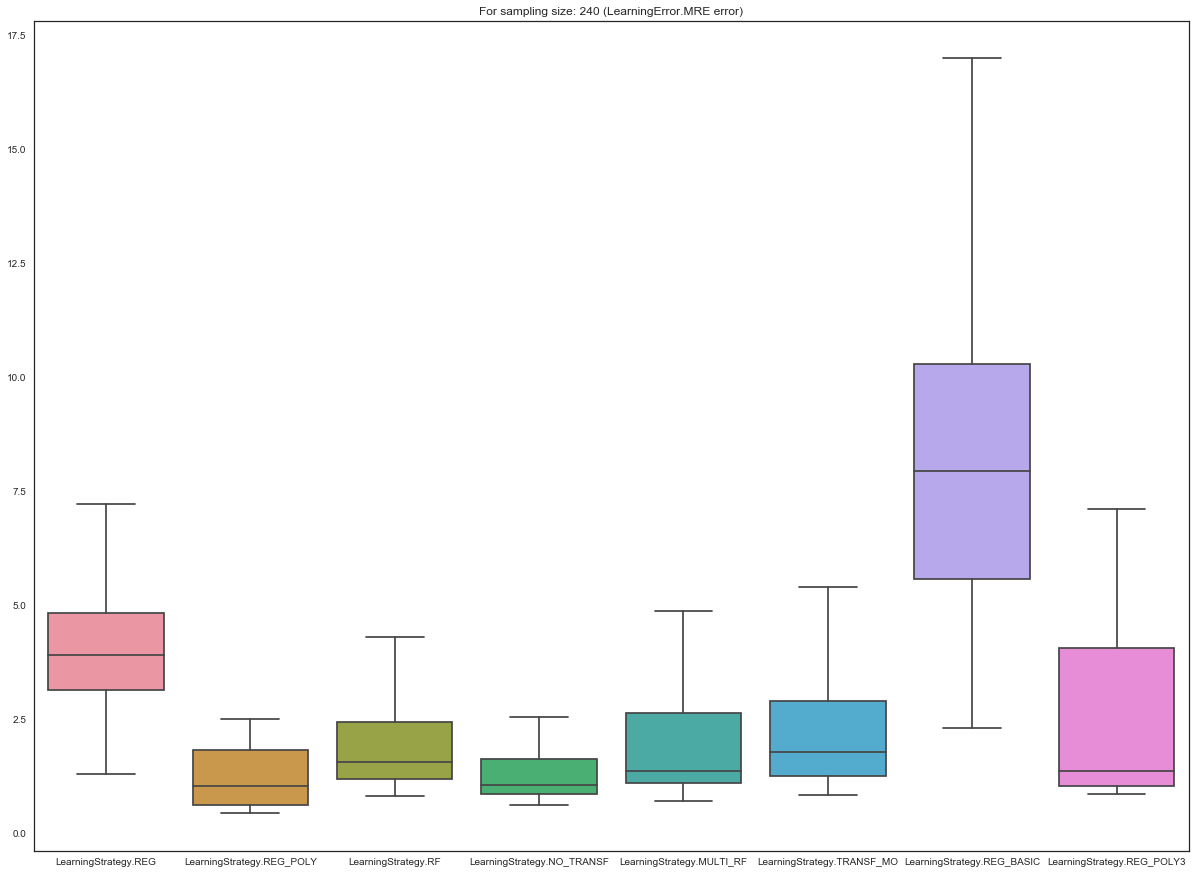

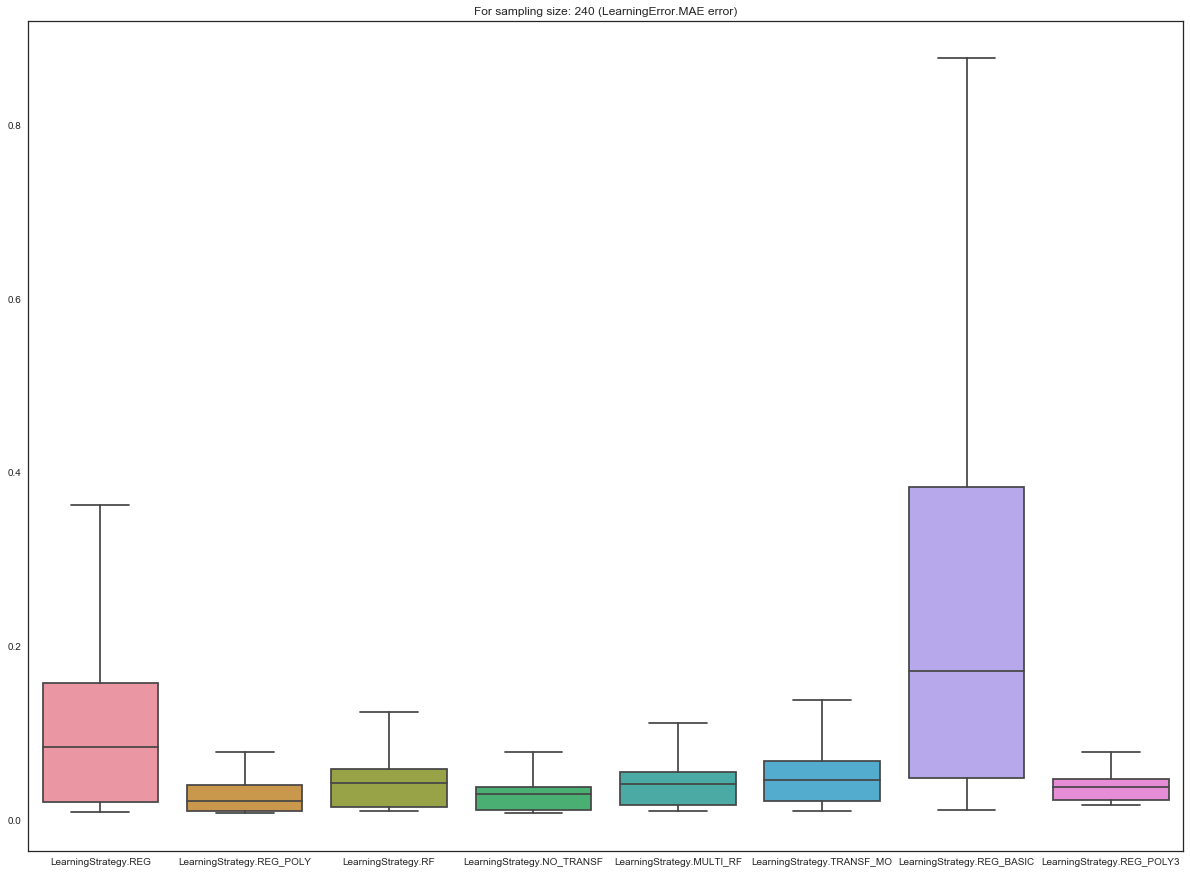

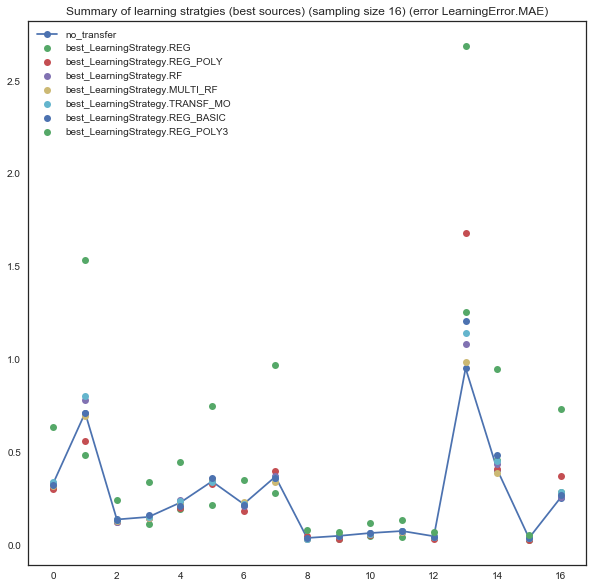

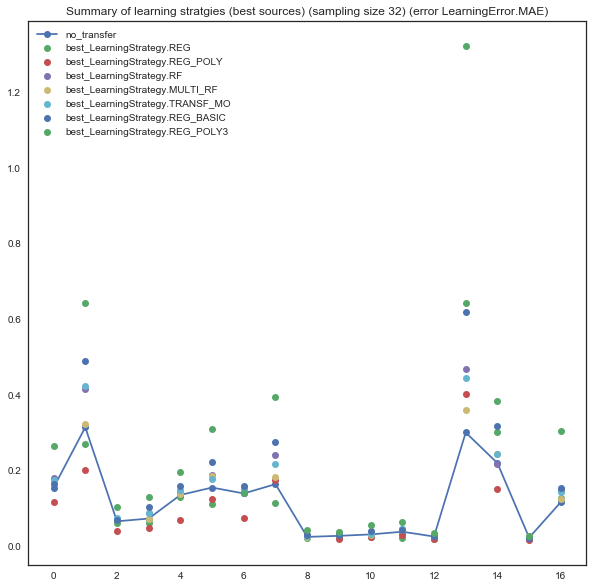

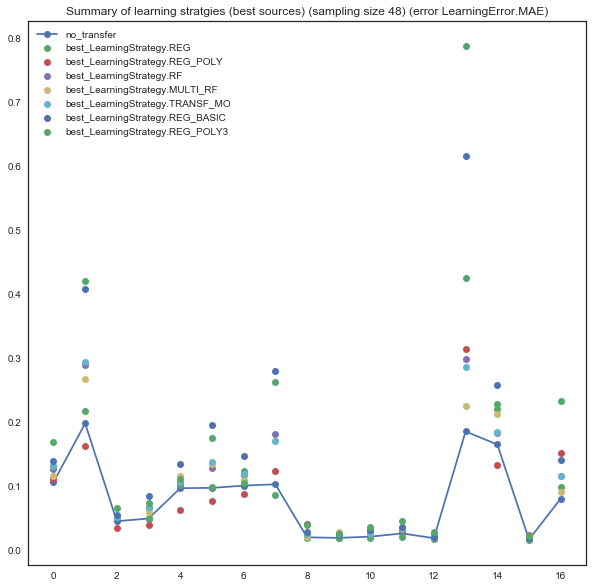

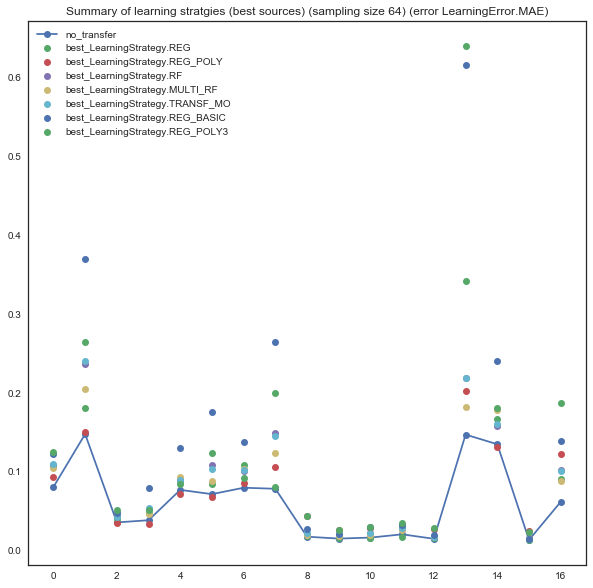

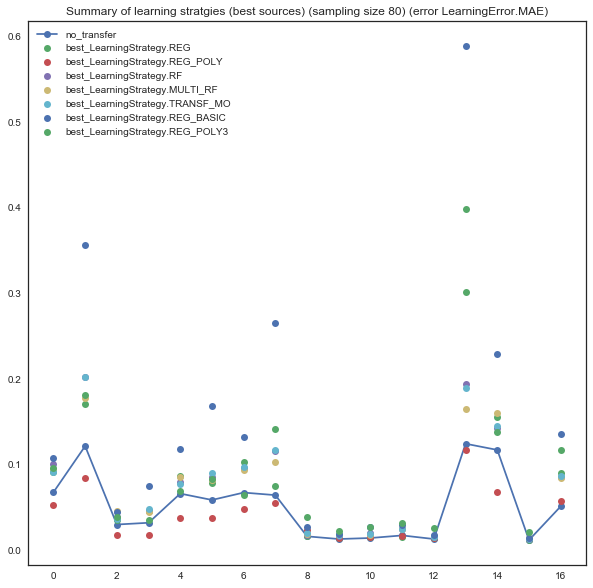

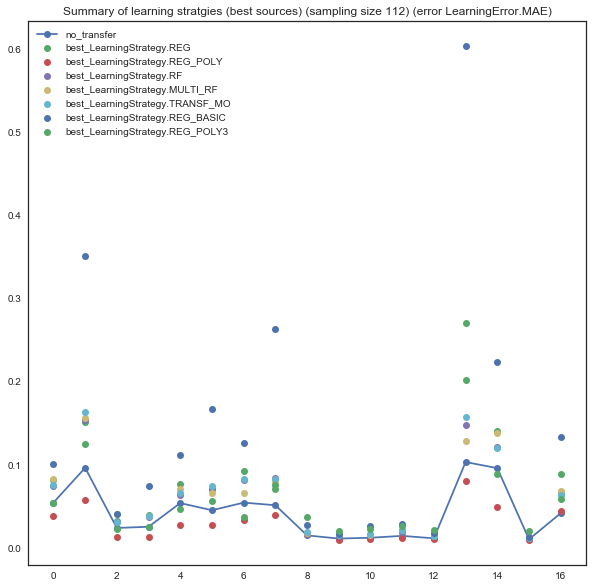

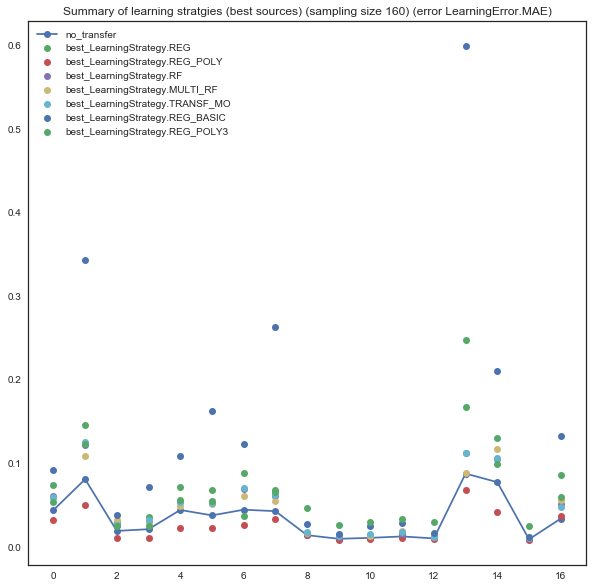

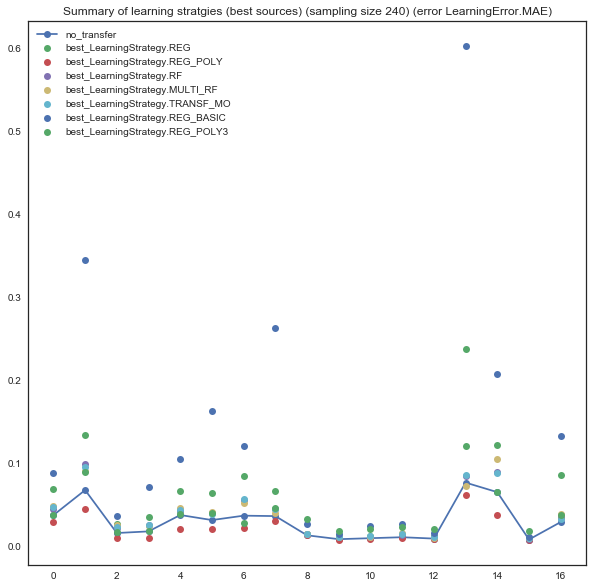

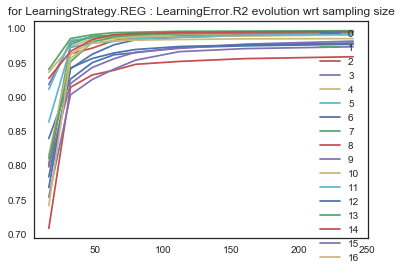

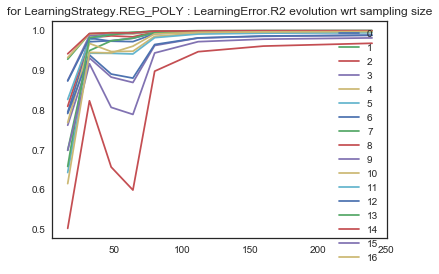

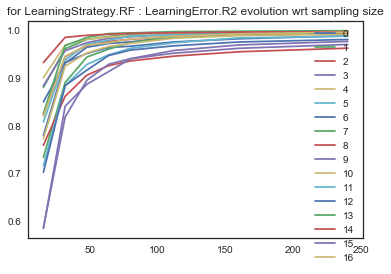

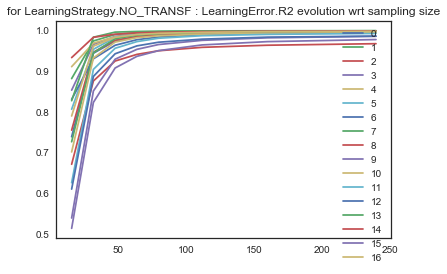

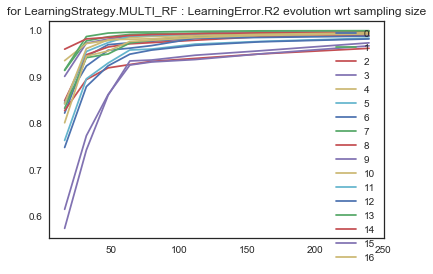

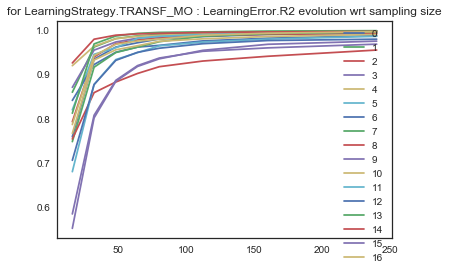

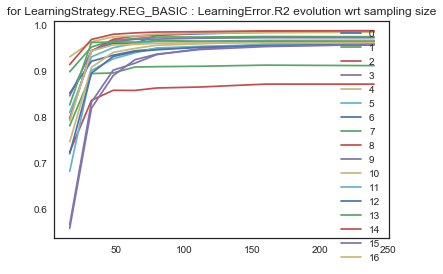

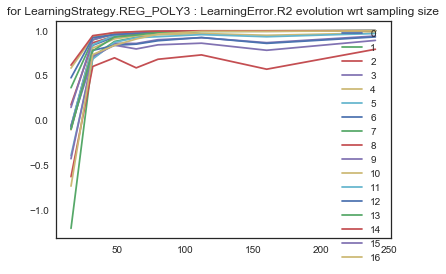

In [22]:
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

    
def mkTargetDimensionName(dimensionName):
    return dimensionName + "_target"

def removeFtsVideo(vSource):
     return vSource.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'size', 'elapsedtime', mkTargetDimensionName(predDimension)], axis=1)

def transferMLvideos(v1Source, v2Target, perc, learningStrategy, ftsToFocus=[]):
    N_RANDOM_FOREST = 100
    vSource = listeVideo[v1Source].copy()  
    vTarget = listeVideo[v2Target].copy()
    
  
    ### merge of data (source + transfer measurements)
    vST = vSource # says 
  #  print("video source")
  #  print(pd.DataFrame(vST).columns.values)
    vST[mkTargetDimensionName(predDimension)] = vTarget[predDimension] 
  #  print("### data merged with all measurements")
  #  print(pd.DataFrame(vST).columns.values)
      
    ######### first, we need a learning model for predicting predDimension of source, hopefully very accurate ##########  
    x_source_train, x_source_test, y_source_train, y_source_test = train_test_split(vST, vST[predDimension], test_size=perc, random_state=None)
    x_effective_source_train = removeFtsVideo(x_source_train)
    
  #  print("effective source train")
  #  print(pd.DataFrame(x_effective_source_train).columns.values)
  #  print("y source train")
  #  print(pd.DataFrame(y_source_train).columns.values)
  #  print(pd.DataFrame(y_source_train)[0:5])
    clf = GradientBoostingRegressor(n_estimators=N_RANDOM_FOREST)
    # TODO RandomForestRegressor(n_estimators=N_RANDOM_FOREST)  
    
    
    clf.fit(x_effective_source_train, y_source_train) # RT
    
    
    ## let's predict for further evaluation
    x_effective_source_test = removeFtsVideo(x_source_test) 
    source_prediction_size = clf.predict(x_effective_source_test) 
    x_augmented_test = x_effective_source_test.assign(predDimension=source_prediction_size) 
    x_augmented_test = x_augmented_test.rename(columns={'predDimension': predDimension}) 
  #  print("x_augmented_test")
  #  print(pd.DataFrame(x_augmented_test))
    
    if (learningStrategy == TransferLearningStrategy.RF):
       # print("random forest for transfer learning")
        clfTransML = RandomForestRegressor(n_estimators=N_RANDOM_FOREST)  # linear_model.LinearRegression() # linear_model.BayesianRidge() # linear_model.LinearRegression() # linear_model.Ridge (alpha = .5) 
        x_transferML_train = x_source_train.drop(['H264', 'configurationID', 'usertime', 'systemtime', mkTargetDimensionName(predDimension)], axis=1)
        
        # we need predDimension
        #x_transferML_train =  x_transferML_train.drop(['elapsedtime', 'size'], axis=1)
        if (predDimension == "size"):
             x_transferML_train =  x_transferML_train.drop(['elapsedtime'], axis=1)
        elif (predDimension == "elapsedtime"):
            x_transferML_train =  x_transferML_train.drop(['size'], axis=1)
        else:
            print("Error pred dim name")
            pass
        
   #     print("####### x_transferML_train")
   #     print(pd.DataFrame(x_transferML_train)[:5])
        
        y_transferML_train = x_source_train[mkTargetDimensionName(predDimension)] 
   #     print("####### y_transferML_train")
   #     print(pd.DataFrame(y_transferML_train)[:5])
        clfTransML.fit(x_transferML_train, y_transferML_train) 
        
        y_pred_MLTrans = clfTransML.predict(x_augmented_test)
   #     print("####### y_pred_MLTrans")
   #     print(pd.DataFrame(y_pred_MLTrans)[:5])
        
        y_pred_test = x_source_test[mkTargetDimensionName(predDimension)]
   #     print("####### y_pred_test")
   #     print(pd.DataFrame(y_pred_test)[:5])
        
        mseMLMLTrans, r2MLMLTrans, mreMLMLTrans, maeMLMLTrans = evalPrediction(y_pred_test, y_pred_MLTrans)
        return {LearningError.MSE: mseMLMLTrans, LearningError.R2: r2MLMLTrans, LearningError.MRE: mreMLMLTrans, LearningError.MAE: maeMLMLTrans }
      
    elif (learningStrategy == TransferLearningStrategy.MULIT_RF):
        # print("random forest multi-output (not supported here)")
        
        clfMO = RandomForestRegressor(n_estimators=N_RANDOM_FOREST) 
        x_transferMO_train = x_source_train.drop(['H264', 'configurationID', 'usertime', 'systemtime', mkTargetDimensionName(predDimension)], axis=1)
        if (predDimension == "size"):
            x_transferMO_train =  x_transferMO_train.drop(['elapsedtime'], axis=1)
        elif (predDimension == "elapsedtime"):
            x_transferMO_train =  x_transferMO_train.drop(['size'], axis=1)
        else:
            print("Error pred dim name")
            pass
        
        ### at this step: x_transferML_train contains all predictable variables + predDimension source 
        # what we want to predict: target pred dimension + source pred dimension 
        y_transferMO_train = x_source_train[[mkTargetDimensionName(predDimension), predDimension]]
        clfMO.fit(x_transferMO_train, y_transferMO_train) 
        
        y_pred_MO = clfMO.predict(x_augmented_test)        
        y_predMO_test = x_source_test[[mkTargetDimensionName(predDimension), predDimension]]
        
        r2MOTrans = r2_score(y_predMO_test, y_pred_MO, multioutput='raw_values')[0]  # 2 values     
        mseMOTrans = mean_squared_error(y_predMO_test, y_pred_MO, multioutput='raw_values')[0]
        maeMOTrans = mean_absolute_error(y_predMO_test, y_pred_MO, multioutput='raw_values')[0]
        mreMOTrans = mean_relative_error(y_predMO_test[mkTargetDimensionName(predDimension)], [ x [0] for x in y_pred_MO ]) # 

        return { LearningError.MSE: mseMOTrans, LearningError.R2: r2MOTrans, LearningError.MRE: mreMOTrans, LearningError.MAE: maeMOTrans }
    else:
        #print("linear regression for transfer learning ")
        n_degree = mkDegree(learningStrategy)
       # print("polynomial degree=" + str(n_degree))
       # print("features used=" + str(ftsToFocus))
        x_transfer_train = x_source_train[ftsToFocus] # including predDimension and eliminating non-relevant features (removal of mkTargetDimensionName(predDimension))
        polynomial_features = PolynomialFeatures(degree=n_degree)
        linear_regression = LinearRegression()
        regr = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
        y_train = x_source_train[mkTargetDimensionName(predDimension)] 
   #     print("####### x_transfer_train")
   #     print(pd.DataFrame(x_transfer_train)[:5])
   #     print("####### y_train")
   #     print(pd.DataFrame(y_train)[:5])
        regr.fit(x_transfer_train, y_train)
        
        ### let's evaluate 
        y_pred = regr.predict(x_augmented_test[ftsToFocus])
        mseMLT, r2MLT, mreMLT, maeMLT = evalPrediction(x_source_test[mkTargetDimensionName(predDimension)], y_pred)
        return {LearningError.MSE: mseMLT, LearningError.R2: r2MLT, LearningError.MRE: mreMLT, LearningError.MAE: maeMLT}


##### ideal case: you have the whole data for source (incl. measurements)
## deprecated 
def learningBetweenVideos(v1Source, v2Target, perc):
    N_RANDOM_FOREST = 100
    vSource = listeVideo[v1Source].copy() 
    vTarget = listeVideo[v2Target].copy()
    nTotal = len(vSource[predDimension])
    tres = round(perc * nTotal)  
    
            
    x_train, x_test, y_train, y_test = train_test_split(vSource, vTarget[predDimension], test_size=perc, random_state=None)

    # Split the targets into training/testing sets
   # ftsToRemove = ['configurationID', 'size', 'elapsedtime', 'systemtime', 'usertime']
   # ftsToRemove.remove(predDimension)
   # x_train = vSource[0:tres]
   # x_train = x_train.drop(ftsToRemove, axis=1)   
    #  #.values.reshape(-1,1)
   # y_train = vTarget[predDimension][0:tres]#.values.reshape(-1,1)
    
   # x_test = vSource[tres+1:nTotal]#.values.reshape(-1,1)
   # x_test = x_test.drop(ftsToRemove, axis=1) 
   # y_test = vTarget[predDimension][tres+1:nTotal]#.values.reshape(-1,1)
    
    #print(np.unique(y_test))

    clf = RandomForestRegressor(n_estimators=N_RANDOM_FOREST)  
    clf.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = clf.predict(x_test)

    mseReg, r2Reg, mreReg, mae = evalPrediction(y_test, y_pred)
    return {LearningError.MSE: mseReg, LearningError.R2: r2Reg, LearningError.MRE: mreReg, LearningError.MAE: mae}


    


# predDimension: either size or elapsedtime 
# features to focus (for linear regression says)
def noTransferBetweenVideos(v1ID, v2ID, perc):
    vSource = listeVideo[v1ID].copy()
    # vTarget = listeVideo[v2ID]
    
    N_RANDOM_FOREST = 100
    
    #nTotal = len(vSource[predDimension]) # length is equal between vSource and vTarget (1052 in our experiments)
    #tres = round(perc * nTotal)
    
   # ftsToRemove = ['configurationID', 'size', 'elapsedtime', 'systemtime', 'usertime']
    # ftsToRemove.remove(predDimension)
    
#    x_train, x_test, y_train, y_test = train_test_split(vSource, 
 #                                                       vTarget[predDimension], test_size=perc, random_state=0)
    
    vCleanSource = vSource.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'size', 'elapsedtime'], axis=1)


    x_target_train, x_target_test, y_target_train, y_target_test = train_test_split(vCleanSource, 
                                                       vSource[predDimension], test_size=perc, random_state=None)
    ######### pure learnning over target (it's the traditional way, without transfer)  ##########  
    clfTarget = GradientBoostingRegressor(n_estimators=N_RANDOM_FOREST)
    # TODO RandomForestRegressor(n_estimators=N_RANDOM_FOREST)  
    
    # train sample 
    #x_target_train = vTarget[0:tres] # Cs
    #x_effective_target_train = x_target_train.drop(ftsToRemove, axis=1) # normally we learn over the full parameters but we can try to target specifically ['no_mbtree', 'no_cabac']
    # x_effective_target_train = x_effective_target_train[['no_mbtree', 'no_cabac']] 
    #y_target_train = vTarget[predDimension][0:tres] 
    #clfTarget.fit(x_effective_target_train, y_target_train) 
    clfTarget.fit(x_target_train, y_target_train)
    
    # test sample for evaluating 
   #x_target_test = vTarget[tres+1:nTotal]
   # x_effective_target_test = x_target_test.drop(ftsToRemove, axis=1) # normally we learn over the full parameters but we can try to target specifically ['no_mbtree', 'no_cabac']
    # x_effective_source_test = x_effective_source_test[['no_mbtree', 'no_cabac']]
   # y_target_test = vTarget[predDimension][tres+1:nTotal]
    
   # print("** Evaluation of learning model (for the TARGET, without transfer)**")
    y_target_pred = clfTarget.predict(x_target_test)
    mseMLTarget, r2MLTarget, mreMLTarget, maeMLTarget = evalPrediction(y_target_test, y_target_pred)
    return {LearningError.MSE: mseMLTarget, LearningError.R2: r2MLTarget, LearningError.MRE: mreMLTarget, LearningError.MAE: maeMLTarget}

# for multi output
#def mean_relative_error_mo(y_true, y_pred): 
   # return np.mean(np.abs((y_true[0] - y_pred[0]) / y_true[0])) * 100


def multiOutputLearning (i, j, perc):

    # Split the targets into training/testing sets
    videoSource = listeVideo[i].copy()
    videoTarget = listeVideo[j].copy()
    
    # videoSource[predDimension + "_target"] = videoTarget[predDimension] 
    videoSource[predDimension + "_target"] = videoTarget[predDimension] 
    
    possibleFts =['no_8x8dct','no_asm','no_cabac',
                           'no_deblock','no_fast_pskip','no_mbtree',
                           'no_mixed_refs','no_weightb','rc_lookahead','ref']
    #possibleFts.append(predDimension)
    #possibleFts.append(predDimension + "_target")
            
    x_train, x_test, y_train, y_test = train_test_split(videoSource[possibleFts], 
                                                        videoSource[[mkTargetDimensionName(predDimension), predDimension]], 
                                                        test_size=perc, random_state=0)

    # Apply the model to the training test
    N_RANDOM_FOREST = 100
    regr = RandomForestRegressor(n_estimators=N_RANDOM_FOREST)
    
    # regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
    r2score = r2_score(y_test, y_pred, multioutput='raw_values')[0]  # 2 values     
    mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')[0]
    mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')[0]
    mre = mean_relative_error(y_test[mkTargetDimensionName(predDimension)], [ x [0] for x in y_pred ]) # 
    
    ### mseMLTarget, r2MLTarget, mreMLTarget
    return {LearningError.MSE: mse, LearningError.R2: r2score, LearningError.MRE: mre, LearningError.MAE: mae} # (r2score[0], x_test[predDimension], y_test, y_pred)



def computeRegs(vid1,vid2,n,ftsToFocus):    
    per = ((1152 - n) / 1152)
    mre1 = transferMLvideos (vid1, vid2, per, TransferLearningStrategy.REGLIN_POLY1, ftsToFocus)    
    # linearRegPolynomialBetweenVideos(vid1, vid2, per, ftsToFocus, 1) # linearRegBetweenVideos(vid1, vid2, (n / 1152), ftsToFocus) # transfer learning: regression 
    mreP1 = transferMLvideos (vid1, vid2, per, TransferLearningStrategy.REGLIN_POLY2, ftsToFocus)
    # linearRegPolynomialBetweenVideos(vid1, vid2, per, ftsToFocus, 2) # transfer learning: regression poly
    mreL1 = transferMLvideos (vid1, vid2, per, TransferLearningStrategy.RF)
    # learningBetweenVideos(vid1, vid2, per) # transfer learning: random forest
    notransf = noTransferBetweenVideos(vid1, vid2, per) # no transfer: only simple learning (with random forest) over vid2
    multiRF = multiOutputLearning(vid1, vid2, per) # multi-output learning (with random forest)
    transfMO = transferMLvideos (vid1, vid2, per, TransferLearningStrategy.MULIT_RF)
    # without fts to Focus (only 1-1 predDimension)
    mreBasic = transferMLvideos (vid1, vid2, per, TransferLearningStrategy.REGLIN_POLY1, [predDimension]) 
    mreP3 = transferMLvideos (vid1, vid2, per, TransferLearningStrategy.REGLIN_POLY3, ftsToFocus)
   
    return mre1, mreP1, mreL1, notransf, multiRF, transfMO, mreBasic, mreP3




#### MAIN PROCEDURE 
def launchRegExperiment(ftsToFocus, Nf):
    sizeV = len(listeVideo)
    mreAllReg = []
    for nSample in Nf:    
        mreReg = [[NaN for x in range(sizeV)] for y in range(sizeV)]
        print("####### for " + predDimension)
        print("#######\t Nf=%d %d \t\t#########" % (nSample, nSample * N))
        for i in range(0, len(listeVideo)):        
            for j in range(0, len(listeVideo)):
                if i != j:                   
                    mre1, mreP1, mreL1, notransf, multiRF, transfMO, mreBasic, mreP3 = computeRegs(i, j, nSample*N, ftsToFocus)                     
                    mreReg[i][j] = { LearningStrategy.REG: mre1, 
                                    LearningStrategy.REG_POLY: mreP1, 
                                    LearningStrategy.RF: mreL1, 
                                    LearningStrategy.NO_TRANSF: notransf, 
                                    LearningStrategy.MULTI_RF: multiRF, 
                                    LearningStrategy.TRANSF_MO: transfMO, 
                                    LearningStrategy.REG_BASIC: mreBasic,
                                    LearningStrategy.REG_POLY3: mreP3, 
                                   }
        mreAllReg.append(mreReg)
    return mreAllReg



## DEPRECTATED
def analyzeRegAccuracies(mres): 
    mreReg1 = [] 
    mreP1 = [] 
    mreL1 = [] 
    notransf = [] 
    multiRF = []
    transfMO = []
    for i in range(len(mres)):
        for j in range(len(mres[i])):
            if i != j:
                mre = mres[i][j]
                mreReg1.append(mre[LearningStrategy.REG])
                mreP1.append(mre[LearningStrategy.REG_POLY])
                mreL1.append(mre[LearningStrategy.RF])
                notransf.append(mre[LearningStrategy.NO_TRANSF])
                multiRF.append(mre[LearningStrategy.MULTI_RF])
                transfMO.append(mre[LearningStrategy.TRANSF_MO])
    pdReg1 = pd.DataFrame(mreReg1)
    pdP1 = pd.DataFrame(mreP1)
    pdL1 = pd.DataFrame(mreL1)
    pdNoTransf = pd.DataFrame(notransf)
    pdMultiRF = pd.DataFrame(multiRF)
    pdTransfMO = pd.DataFrame(transfMO)

    
    # indice 2 is for MRE (TODO)
    allsreError = pd.DataFrame({ 'Polynomial': pdP1[LearningError.MSE], 'Regression': pdReg1[LearningError.MSE], 'Learning (RF)': pdL1[LearningError.MSE], 'No Transfer': pdNoTransf[LearningError.MSE], 'Multi RF': pdMultiRF[LearningError.MSE], 'TransfMO': pdTransfMO[LearningError.MSE] } ) #, pdL1[2]) 
    allr2Error = pd.DataFrame({ 'Polynomial': pdP1[LearningError.R2], 'Regression': pdReg1[LearningError.R2], 'Learning (RF)': pdL1[LearningError.R2], 'No Transfer': pdNoTransf[LearningError.R2], 'Multi RF': pdMultiRF[LearningError.R2], 'TransfMO': pdTransfMO[LearningError.R2] } ) #, pdL1[2]) 
    allmreError = pd.DataFrame({ 'Polynomial': pdP1[LearningError.MRE], 'Regression': pdReg1[LearningError.MRE], 'Learning (RF)': pdL1[LearningError.MRE], 'No Transfer': pdNoTransf[LearningError.MRE], 'Multi RF': pdMultiRF[LearningError.MRE], 'TransfMO': pdTransfMO[LearningError.MRE] } ) #, pdL1[2]) 
    return allsreError, allr2Error, allmreError 
    # plt.figure()
    #plt.boxplot(pdP1[2])
   # allmeanMre.plot.box()
    
#sns.plt.show()

    #pdP1.boxplot(0)    
    #plt.show()


## DEPRECTATED
def computeErrorPlots(mreAllReg, Nf):
    for i in range(len(Nf)):
        print("For sampling size: %d" % (Nf[i] * N))
        mseErrorByRegressionMethod, r2ErrorByRegressionMethod, mreErrorByRegressionMethod = analyzeRegAccuracies(mreAllReg[i])
        # fig, axs = plt.subplots(ncols=3)
        fig, axs = plt.subplots(ncols=3,figsize=(16.7, 13.27))
        abr = sns.boxplot(data=mreErrorByRegressionMethod, ax=axs[0])
        abr.set_title("For sampling size: %d (MRE error)" % (Nf[i] * N))
        abse = sns.boxplot(data=mseErrorByRegressionMethod, ax=axs[1])
        abse.set_title("For sampling size: %d (MSE error)" % (Nf[i] * N))
        abr2 = sns.boxplot(data=r2ErrorByRegressionMethod, ax=axs[2])
        abr2.set_title("For sampling size: %d (R2 error)" % (Nf[i] * N))

        
## DEPRECTATED
def depictMatrix(method, resultsError, kindOfError):
    sizeV = len(resultsError)
    errorMethodMatrix = [[NaN for x in range(sizeV)] for y in range(sizeV)]
    for i in range(0, sizeV):        
        for j in range(0, sizeV):
            if i != j:
                errs = resultsError[i][j]
                errors = errs[method] # findErrorByMethod
                error = errors[kindOfError] # findSpecificError 
                errorMethodMatrix[i][j] = error
                
    plt.subplots(figsize=(10, 10))
    plt.imshow(errorMethodMatrix,cmap='Reds',interpolation='nearest')
    plt.title("" + str(method) + " (error: " + str(kindOfError) + ")")
#    plt.xticks(range(len(indicesDim)),indicesDim)
#    plt.yticks(range(len(indicesDim)), indicesDim)
    plt.xlabel("Video (target)")
    plt.ylabel("Video (source)")
    plt.colorbar()
    plt.show()


## DEPRECTATED
def computeErrorMatrices(mreAllReg, Nf):
    for i in range(len(Nf)):
        print("For sampling size: %d" % (Nf[i] * N))
        learningMethods = [LearningStrategy.REG, LearningStrategy.REG_POLY, LearningStrategy.RF, LearningStrategy.NO_TRANSF, LearningStrategy.MULTI_RF, LearningStrategy.TRANSF_MO]
        #learningMethods = ["Polynomial", "No Transfer", "Multi RF", "Learning (RF)", "Regression", "TransfMO"]
        regNf = mreAllReg[i]
        for l in learningMethods:
            depictMatrix(l, regNf, LearningError.R2)
       # depictMatrix("No Transfer", r2ErrorByRegressionMethod, "R2")
       # depictMatrix("Multi RF", r2ErrorByRegressionMethod, "R2")
       # depictMatrix("Learning (RF)", r2ErrorByRegressionMethod, "R2")
       # depictMatrix("Regression", r2ErrorByRegressionMethod, "R2")
       # depictMatrix("TransfMO", r2ErrorByRegressionMethod, "R2")


N_REPEAT_EXP = 20
Nf = [1, 2, 3, 4, 5, 7, 10, 15] 
# Warning: COSTLY experiment (can take a while)
COSTLY_EXPERIMENTS=True
if (COSTLY_EXPERIMENTS):
    if (predDimension == "elapsedtime"):
        mreAllRegExp = [() for x in range(N_REPEAT_EXP)]
        for n in range(0, N_REPEAT_EXP):
            mreAllRegExp[n] = launchRegExperiment(allPossibleFtsTime, Nf)
#           mreAllRegExp[n] = launchRegExperiment(['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree', 'rc_lookahead', 'no_8x8dct'], Nf)
        # mreAllReg = mreAllRegExp[0] ## says (TODO: average!)
    elif (predDimension == "size"):
        mreAllRegExp = [() for x in range(N_REPEAT_EXP)]
        for n in range(0, N_REPEAT_EXP):
            mreAllRegExp[n] = launchRegExperiment(allPossibleFtsSize, Nf)
            # mreAllRegExp[n] = launchRegExperiment(['size', 'no_cabac', 'no_mbtree', 'ref', 'rc_lookahead'], Nf)
    else:
        print("Error (unknown dimension)" + predDimension)
        pass

    




    ## DEPRECTATED
#print("##### Error plots")
#computeErrorPlots(mreAllReg, Nf)

## DEPRECTATED
#print("##### Matrices")
#computeErrorMatrices(mreAllReg, Nf)

# unit test?
# multiOutputLearning(12, 2, ((1152 - 16) / 1152))
#r

#nExp=0
#nSample=Nf[0] 
#vidi=0
#vidj=1
#lMethod=LearningStrategy(1)
#mreAllRegExp[nExp][nSample][vid1][vid2][lMethod]

def meanByMethodAndError(mreAllRegData, Nf, lMethod, kindOfError):
    nnf = len(Nf)
    si = len(listeVideo)
    sj = len(listeVideo)
    nLearningMethod = len(list(LearningStrategy))
    # TODO: error method
    
    meanMethodError = [[[[NaN for k in range(N_REPEAT_EXP)] for j in range(sj)] for i in range(si)] for m in range(nnf)]
    # [[[NaN for i in range(si)] for j in range(sj)] for m in range(nnf)]
#    meanMethodError = [[NaN for x in range(Nf)] for y in range(3)]
    for nExp in range(len(mreAllRegData)): # replication number nExp
        for nSample in range(len(Nf)):
            vidResultsError = mreAllRegData[nExp][nSample]
            sizeV = len(vidResultsError)  
            for vidi in range(0, sizeV):        
                for vidj in range(0, sizeV):
                    if (vidi != vidj):
                        vidErrors = vidResultsError[vidi][vidj]
                        learningErrorForVideo = vidErrors[lMethod]
                        meanMethodError[nSample][vidi][vidj][nExp] = learningErrorForVideo[kindOfError]
    return meanMethodError 

#m = meanByMethodAndError(mreAllRegExp, Nf, LearningStrategy.NO_TRANSF, LearningError.R2)
#mMean = np.nanmean(m, axis=3)
#mMeanForSamplinSizeX = mMean[0]

#display(HTML(pd.DataFrame(mMeanForSamplinSizeX).to_html())) 
#np.nanmean(mMeanForSamplinSizeX)


def plotMatrixError(errorMethodMatrix, method, kindOfError, samplingSize):
    plt.subplots(figsize=(10, 10))
    plt.imshow(errorMethodMatrix,cmap='Reds',interpolation='nearest')
    plt.title("For sampling size: " + str(samplingSize) + " and learning method " + str(method) + " (error: " + str(kindOfError) + ")")
    plt.xlabel("Video (target)")
    plt.ylabel("Video (source)")
    plt.colorbar()
    plt.show()

#for i in range(len(Nf)):
#    print("For sampling size: %d" % (Nf[i] * N))
#    learningMethods = [LearningStrategy.REG, LearningStrategy.REG_POLY, LearningStrategy.RF, LearningStrategy.NO_TRANSF, LearningStrategy.MULTI_RF, LearningStrategy.TRANSF_MO]
#    for l in learningMethods:
#        m = meanByMethodAndError(mreAllRegExp, Nf, l, LearningError.R2)
#        mMean = np.nanmean(m, axis=3)
#        plotMatrixError(mMean[i], l, LearningError.R2)

    
def computeErrorPlotsWithRepeat(mreAllReg, Nf):
    for i in range(len(Nf)):
        print("For sampling size: %d" % (Nf[i] * N))
        for le in LearningError:
            mErrors = {} 
            for l in LearningStrategy:            
                m = meanByMethodAndError(mreAllReg, Nf, l, le)            
                mMean = np.nanmean(m, axis=3)
                mMeanSample = mMean[i].flatten(order='F')
                mErrors[str(l)] = mMeanSample
            fig, axs = plt.subplots(ncols=1,figsize=(20.7, 15.27))
            #if (le == LearningError.R2 or le == LearningError.MSE):
             #   axs.set(ylim=(0, 1))
            #sns.set()
            abr2 = sns.boxplot(data=pd.DataFrame(mErrors),showfliers=False)
            abr2.set_title("For sampling size: %d (%s error)" % (Nf[i] * N, str(le)))

computeErrorPlotsWithRepeat(mreAllRegExp, Nf)



def computeErrorMatricesWithRepeat(mreAllReg, Nf):
    for i in range(len(Nf)):
        print("For sampling size: %d" % (Nf[i] * N))
        for le in [LearningError.R2]:
            mErrors = {} 
            for l in [LearningStrategy.REG, LearningStrategy.NO_TRANSF, LearningStrategy.REG_POLY] :            
                m = meanByMethodAndError(mreAllReg, Nf, l, le)            
                mMean = np.nanmean(m, axis=3)
                mMeanSample = mMean[i]
                #mMeanSample = mMean[i].flatten(order='F')
                # mErrors[str(l)] = mMeanSample
                # display(HTML(pd.DataFrame(mMeanSample).to_html())) 
                plotMatrixError(mMeanSample, l, le, (Nf[i] * N))

#computeErrorMatricesWithRepeat(mreAllRegExp, Nf)


### seek to understand the learning performances between learners
def diffErrorWithRepeat(mreAllReg, Nf):
    for i in range(len(Nf)):
        print("For sampling size: %d" % (Nf[i] * N))
        for le in [LearningError.R2]:
            mErrors = {} 
            for l in LearningStrategy:            
                m = meanByMethodAndError(mreAllReg, Nf, l, le)            
                mMean = np.nanmean(m, axis=3)
                mMeanSample = mMean[i]
                mErrors[str(l)] = mMeanSample
            ### compute differences between learners here
            cOtherLearnings = list(LearningStrategy)
            lErr = {}
            for l1 in LearningStrategy:
                lErr[l1] = mkDifferencesWithOthers(l1, cOtherLearnings, mErrors, Nf, le, i)
                # cOtherLearnings.remove(l1)
            # print(pd.DataFrame(lErr))
            display(HTML(pd.DataFrame(lErr).to_html()))

            

def mkDifferencesWithOthers(l1, cOtherLearnings, mErrors, Nf, le, i):  
    mErrorsD = {}
    for l2 in cOtherLearnings:
        if l1 != l2:
            mError = mErrors[str(l1)] - mErrors[str(l2)] # difference, video by video
            mErrorMean = np.nanmean(pd.DataFrame(mError).values) # mean of all differences
            mErrorsD[str(l2)] = mErrorMean
            # print(mErrorMean)
            # print(str(l1) + " VS " + str(l2))
            #display(HTML(pd.DataFrame(mErrorsD).to_html())) 
            #display(HTML(pd.DataFrame(mErrorsD).describe().to_html()))
            #fig, axs = plt.subplots(ncols=1,figsize=(13.7, 8.27))
            #abr = sns.boxplot(data=pd.DataFrame(mErrorsD).mean(),showfliers=False)
            #abr.set_title("For sampling size: %d (%s error) %s " % (Nf[i] * N, str(le), str(l1) + " VS " + str(l2)))
    dErr = pd.DataFrame()
    if len(mErrorsD) == 0:
        return 
    #for k in mErrorsD:
    #    dErr[k] = pd.DataFrame.from_dict(mErrorsD[k]) #.describe()
    #display(HTML("<h2>" + str(l1) + "</h2>"))
    #display(HTML(dErr.to_html()))
    # display(HTML(pd.DataFrame(mErrorsD,index=[str(l1)]).to_html()))
    return mErrorsD

# diffErrorWithRepeat(mreAllRegExp, Nf)

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, green otherwise.
    """
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

cm = sns.light_palette("green", as_cmap=True)

def dpDiffMatricesWithOthers(l1, cOtherLearnings, mErrors, Nf, le, i):      
    mErrorsD = {}
    for l2 in cOtherLearnings:
        if l1 != l2:
            mError = mErrors[str(l1)] - mErrors[str(l2)] # difference, video by video
            display(HTML(pd.DataFrame(mError).style.set_caption(str(l1) + " vs " + str(l2))
                         .applymap(color_negative_red).render()))
                         #.bar(color='#d65f5f').render()))
                         #.background_gradient(cmap=cm).render()))
#            display(HTML(pd.DataFrame(mError).to_html()))
    if len(mErrorsD) == 0:
        return  
    return mErrorsD

### seek to understand the learning performances between learners
def diffMatrixErrorWithRepeat(mreAllReg, Nf):
    for i in range(len(Nf)):
        print("For sampling size: %d" % (Nf[i] * N))
        for le in [LearningError.MAE]:
            mErrors = {} 
            for l in LearningStrategy:            
                m = meanByMethodAndError(mreAllReg, Nf, l, le)            
                mMean = np.nanmean(m, axis=3)
                mMeanSample = mMean[i]
                mErrors[str(l)] = mMeanSample
            ### compute differences between learners here
            cOtherLearnings = list(LearningStrategy)
            for l1 in LearningStrategy:
                dpDiffMatricesWithOthers(l1, cOtherLearnings, mErrors, Nf, le, i)
                cOtherLearnings.remove(l1)
                   
            
# diffMatrixErrorWithRepeat(mreAllRegExp, Nf)



 
def highlight_better_than_transfer(s):
    '''
    highlight values better than no transfer in orange.
    '''
    #print(s)
    is_max = s < s['no_transfer']
    return ['background-color: orange' if v else '' for v in is_max]

# highlight the best "source" video for transfering (a priori of course)
def dpBestVideoSources(mreAllReg, Nf):
    for i in range(len(Nf)):
        print("For sampling size: %d" % (Nf[i] * N))
        for le in [LearningError.MAE]:
            mErrors = {} 
            mNoTransf = meanByMethodAndError(mreAllReg, Nf, LearningStrategy.NO_TRANSF, le) 
            mMeanNoTransf = np.nanmean(mNoTransf, axis=3)
            mMeanSampleNoTransf = mMeanNoTransf[i]
            meanPerVideoTargetNoTransf = np.nanmean(mMeanSampleNoTransf, axis=1)
                # pd.DataFrame(mMeanSampleNoTransf).apply(pd.DataFrame.describe, axis=1)['mean']
            dSummary = pd.DataFrame(columns=range(len(listeVideo)))
            dSummary.loc['no_transfer'] = meanPerVideoTargetNoTransf
            dSummaryBestSources = pd.DataFrame(columns=range(len(listeVideo)))
            for l in LearningStrategy:  
                if (l != LearningStrategy.NO_TRANSF):
                    m = meanByMethodAndError(mreAllReg, Nf, l, le)            
                    mMean = np.nanmean(m, axis=3)
                    mMeanSample = mMean[i]
                    pdMeanSample = pd.DataFrame(mMeanSample)
                    #for t in range(len(mMeanSample)):
                    if (le == LearningError.MRE or le == LearningError.MSE or le == LearningError.MAE):
                        bestL = np.nanmin(pdMeanSample,axis=0)
                        bestSource = np.nanargmin(pdMeanSample,axis=0)
                    elif (le == LearningError.R2):
                        bestL = np.nanmax(pdMeanSample,axis=0)
                        bestSource = np.nanargmax(pdMeanSample,axis=0)
                    meanL = np.nanmean(pdMeanSample,axis=0)
                    dSummary.loc['best_' + str(l)] = bestL
                    dSummary.loc['mean_' + str(l)] = meanL
                    dSummaryBestSources.loc['bestSource' + str(l)] = bestSource
                    #[t]
                    mMeanDiff = pdMeanSample # mMeanSample # - mMeanSampleNoTransf  
                    mMeanDiff.loc['no_transfer'] = meanPerVideoTargetNoTransf
                    mMeanDiffHTML = mMeanDiff.style.set_caption(str(l) + " (sampling size " + str(Nf[i] * N) + ") (error " + str(le) + ")").background_gradient(cmap=cm)
                    if (le == LearningError.MRE or le == LearningError.MSE or le == LearningError.MAE):
                        mMeanDiffHTML = mMeanDiffHTML.highlight_min(axis=0)
                    elif (le == LearningError.R2):
                        mMeanDiffHTML = mMeanDiffHTML.highlight_max(axis=0)
                    
                    #display(HTML(mMeanDiffHTML.render()))
                    #display(HTML(pd.DataFrame(meanPerVideoTargetNoTransf).to_html()))
            dHTMLSummary = dSummary.style.set_caption("Summary of learning stratgies (mean/max sources) (sampling size " + str(Nf[i] * N) + ") (error " + str(le) + ")")#.background_gradient(cmap=cm)
            dHTMLSummary = dHTMLSummary.apply(highlight_better_than_transfer, axis=0)
            if (le == LearningError.MRE or le == LearningError.MSE or le == LearningError.MAE):
                dHTMLSummary = dHTMLSummary.highlight_min(axis=0)
            elif (le == LearningError.R2):
                dHTMLSummary = dHTMLSummary.highlight_max(axis=0)
            display(HTML(dSummaryBestSources.style.set_caption("Best video sources per learning stratgies (sampling size " + str(Nf[i] * N) + ") (error " + str(le) + ")").
                         render()))
            display(HTML(dHTMLSummary.render()))          
            styleSummaryLine = ["o-", "o", "o", "o", "o", "o", "o", "o"] #TODO (hardcoded)
            dSummary.filter(regex='^(?!mean)', axis=0).transpose().plot(style=styleSummaryLine, figsize=(10, 10),
                                                                            title="Summary of learning stratgies (best sources) (sampling size " + str(Nf[i] * N) + ") (error " + str(le) + ")"          
                                                                            )
            

dpBestVideoSources(mreAllRegExp, Nf)



# is Pearson correlation a good metric for transferability?  
def corrTransferabilityVideoSources(mreAllReg, Nf, corrMethod):
    nbVideos = len(listeVideo)
    for i in range(len(Nf)):
        print("For sampling size: %d" % (Nf[i] * N))
        for le in [LearningError.R2]:
            for l in LearningStrategy:                 
                m = meanByMethodAndError(mreAllReg, Nf, l, le)            
                mMean = np.nanmean(m, axis=3)
                mMeanSample = pd.DataFrame(mMean[i])
                #display(HTML(mMeanSample.style.render()))    
                # # stats.pearsonr(mMeanSample.fillna(value=1.0).values.flatten(), pd.DataFrame(corrSpearman).values.flatten())[0, 1]
                if (corrMethod == "pearson"):                   
                    corrL = np.corrcoef(mMeanSample.fillna(value=1.0).values.flatten(), 
                                        pd.DataFrame(corrPearson).abs().fillna(value=1.0).values.flatten())[0, 1]
                elif (corrMethod == "spearman"):
                    corrL = stats.spearmanr(mMeanSample, pd.DataFrame(corrSpearman), nan_policy="omit").correlation
                elif (corrMethod == "KL"):    
                    corrL = np.corrcoef(mMeanSample.fillna(value=1.0).values.flatten(), 
                                        pd.DataFrame(divKL).abs().fillna(value=1.0).values.flatten())[0, 1]
                print(str(corrL) + " for learning error " + str(le) + " and learning strategy " + str(l))           
            

corrTransferabilityVideoSources(mreAllRegExp, Nf, "pearson")
corrTransferabilityVideoSources(mreAllRegExp, Nf, "spearman")
corrTransferabilityVideoSources(mreAllRegExp, Nf, "KL")

def myhighlight_max(s):
    '''
    highlight the maximum in a Series orange (except 1.0).
    '''
    sp = np.ma.masked_values(s,1.0)
    is_max = s == sp.max()
    return ['background-color: orange' if v else '' for v in is_max]


# plot evolution of learning accuracty wrt sampling size
# TODO: only no transfert at this step
def dpEvolutionLearningPerf(mreAllReg, Nf):    
    for learningTechnique in LearningStrategy:
        evol = pd.DataFrame()
        for i in range(len(Nf)):
            le = LearningError.R2
            m = meanByMethodAndError(mreAllReg, Nf, learningTechnique, le) 
            mMean = np.nanmean(m, axis=3)
            mMeanSample = mMean[i]            
            meanPerVideoTarget = np.nanmean(mMeanSample, axis=1)            
            #for t in range(len(mMeanSample)):
            if (le == LearningError.MRE or le == LearningError.MSE or le == LearningError.MAE):
                if learningTechnique == LearningStrategy.NO_TRANSF:
                    bestL = meanPerVideoTarget # no transfer, so it's the mean over the source (representation is different) 
                else:
                    bestL = np.nanmin(mMeanSample,axis=0)
            elif (le == LearningError.R2):
                if learningTechnique == LearningStrategy.NO_TRANSF:
                    bestL = meanPerVideoTarget # no transfer, so it's the mean over the source (representation is different) 
                else:
                    bestL = np.nanmax(mMeanSample,axis=0)
          
            evol[Nf[i] * N] = bestL #meanPerVideoTarget        #"sampling size " + str(
        evol.transpose().plot(title="for " + str(learningTechnique) + " : " + str(le) + " evolution wrt " + "sampling size")

dpEvolutionLearningPerf(mreAllRegExp, Nf)

 
# display(HTML(pd.DataFrame(corrPearson).style.background_gradient(cmap=cm)
#                             .set_properties(**{'max-width': '80px', 'font-size': '7pt'})
#                             .set_precision(2)
#                             .apply(myhighlight_max).              
#                              render()))

                    #display(HTML(pd.DataFrame(meanPerVideoTargetNoTransf).to_html()))
# pd.DataFrame(mMean[1]).describe()
# pd.DataFrame(m)
#def unit_test_transf(vid1, vid2, n):
#    per = ((1152 - n) / 1152)
#    if (predDimension == "size"):
#        linReg = transferMLvideos (vid1, vid2, per, TransferLearningStrategy.REGLIN_POLY1, ['size', 'no_mbtree', 'no_cabac'])
#        linReg2 = transferMLvideos (vid1, vid2, per, TransferLearningStrategy.REGLIN_POLY2, ['size', 'no_mbtree', 'no_cabac'])
#    else:
#        print("Error pred dim")
#        linReg = []
#        linReg2 = []
                
    # return linReg, linReg2, noTransferBetweenVideos(vid1, vid2, per), learningBetweenVideos(vid1, vid2, per), multiOutputLearning(vid1, vid2, per)
#    return noTransferBetweenVideos(vid1, vid2, per), multiOutputLearning(vid1, vid2, per), transferMLvideos (vid1, vid2, per, TransferLearningStrategy.RF), linReg, linReg2
# transferMLvideos (2, 5, ((1152 - 32) / 1152), TransferLearningStrategy.RF)
#transferMLvideos (2, 5, ((1152 - 32) / 1152), TransferLearningStrategy.REGLIN_POLY2, ['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree', 'rc_lookahead'])
#transferMLvideos (2, 5, ((1152 - 32) / 1152), TransferLearningStrategy.REGLIN_POLY2, ['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree'])
#transferMLvideos (12, 5, ((1152 - 32) / 1152), TransferLearningStrategy.MULIT_RF)
#transferMLvideos (1, 2, ((1152 - 32) / 1152), TransferLearningStrategy.RF)

#unit_test_transf(5, 18, 16)

#computeRegs(5, 18, 16, ['size', 'no_mbtree', 'no_cabac'])  
# noTransferBetweenVideos(12, 2, ((1152 - 32) / 1152))

    #print("*****\n\n")

# learningBetweenVideos(2, 6, (N*2)/1052, 'size'), linearRegBetweenVideos(2, 6, (N*2)/1052, 'size')

In [23]:
#from IPython.display import display, HTML
#m[0][1][3] # nSample, vidi, vidj, nExp
#meanForSamples = np.nanmean(m, axis=3) # [0] , 
#maxForSamples = np.nanmax(m, axis=3)
#meanForSample16 = meanForSamples[0]
#maxForSample16 = maxForSamples[0]
#display(HTML(pd.DataFrame(meanForSample16).to_html())) 
#np.nanmean(meanForSample16)
# pd.DataFrame(maxForSample16)

#m

In [24]:
# mainly here to show that the best source video is not necessarily based 
# on some metrics like Pearson, Spearman, or Entropy
# much more subtle 
def adHocExperiment(videosourceID, videotargetID, ftsToFocus): 
    sizeV = len(listeVideo)
    mreAllReg = []
    for nSample in Nf:    
        mreReg = [{}]
        print("####### for " + predDimension)
        print("#######\t Nf=%d %d \t\t#########" % (nSample, nSample * N))                
        mre1, mreP1, mreL1, notransf, multiRF, transfMO, mreBasic, mreP3 = computeRegs(videosourceID, videotargetID, nSample*N, ftsToFocus)                     
        mreReg = { LearningStrategy.REG: mre1, 
                        LearningStrategy.REG_POLY: mreP1, 
                        LearningStrategy.RF: mreL1, 
                        LearningStrategy.NO_TRANSF: notransf, 
                        LearningStrategy.MULTI_RF: multiRF, 
                        LearningStrategy.TRANSF_MO: transfMO, 
                        LearningStrategy.REG_BASIC: mreBasic,
                        LearningStrategy.REG_POLY3: mreP3, 
                       }
        mreAllReg.append(mreReg)
    return mreAllReg

# bestLinearSourcesPearson
# bestLinearSourcesSpearman

# TODO: repeat
for i, r in bestEntropySources.iterrows():
    vTarget = i
    vSource = r['best_video_source']
    print(str(vTarget) + " " + str(vSource))
    r = adHocExperiment(vTarget, vSource, allPossibleFtsSize)
    le = LearningError.MRE
    nS = 0
    perSample = pd.DataFrame(columns=LearningStrategy)
    for nSample in Nf:    
        # for sampling size
        rns = r[nS] 
        nS = nS + 1
        rnsls = pd.DataFrame()
        for ls in LearningStrategy:    
            rnsls[ls] = pd.Series(rns[ls][le])
            # print (pd.Series(rns[ls][le]))
        #print("sampling " + str(nSample) + " " + str(rnsls))
        #print(rnsls)
        #rnsls.plot()    
        perSample = pd.concat([perSample, pd.DataFrame(rnsls)], axis=0)

    perSample.reset_index(drop=True, inplace=True)
    display(HTML(perSample.style.highlight_min(axis=1).render()))
    perSample.plot(title=str(vTarget) + " => " + str(vSource) + " " + str(nSample * N))
    plt.show()

0 2
####### for elapsedtime
#######	 Nf=1 16 		#########


KeyError: "['size'] not in index"

In [ ]:
#DEPRECATED 
# [1 , 2, 3, 4, 5, 10]
# Nf = []
def launchExperiment(ftsToFocus):
    mreAll = []
    for nSample in Nf:    
        mres = []
        print("####### for " + predDimension)
        print("#######\t Nf=%d \t\t#########" % (nSample))
        for i in range(0,len(listeVideo)):        
            for j in range(0,len(listeVideo)):
                if i == j:
                    continue
                #cr = np.corrcoef(listeVideo[i][predDimension], listeVideo[j][predDimension])[0,1]
                #if abs(cr) > 0.90:
                mreL, mreT, mreMLT, mre1, mre2 = computeTransferAndReg(i, j, nSample*N, ftsToFocus)
                mres.append((mreL, mreT, mreMLT, mre1, mre2))
        mreAll.append(mres)
    return mreAll
#mreL, mreT, mre1, mre2 = computeTransferAndReg(32, 2, n=N*3, predDimension='elapsedtime')
#print("MRE learning %.2f MRE transfer %.2f MRE reg %.2f MRE reg %.2f" % (mreL, mreT, mre1, mre2))
# linearReg(2, (N*10 / 1152), 'elapsedtime')
# computeTransferAndReg(2, 3, n=3*N, predDimension='size') # learning pays off here

def analyzeAccuracies(mres):
    mreLearning = []
    mreT = []
    mreMLT = []
    mreReg1 = [] 
    mreReg2 = []
    for i in range(len(mres)):
        mre = mres[i]
        mreLearning.append(mre[0])
        mreT.append(mre[1])
        mreMLT.append(mre[2])
        mreReg1.append(mre[3])
        mreReg2.append(mre[4])
    pdLearning = pd.DataFrame(mreLearning)
    pdT = pd.DataFrame(mreT)
    pdMLT = pd.DataFrame(mreMLT)
    pdReg1 = pd.DataFrame(mreReg1)
    pdReg2 = pd.DataFrame(mreReg2)
    # pdLearning.subtract(pdT).describe()
    #print("Transfer (MLML) vs learning %s " % (pdMLT.subtract(pdLearning).describe()))
    #print("Transfer (MLML) vs Transfer %s " % (pdMLT.subtract(pdT).describe()))
    #print("Transfer vs learning %s " % (pdT.subtract(pdLearning).describe()))
    #print("Transfer vs reg1 %s" % (pdT.subtract(pdReg1).describe()))
    #print("Transfer vs reg2 %s" % (pdT.subtract(pdReg2).describe()))
    #print("Reg1 vs Reg2 %s" % (pdReg1.subtract(pdReg2).describe()))
    #print("Reg1 vs learning%s" % (pdReg1.subtract(pdLearning).describe()))
    #print("Reg2 vs learning%s" % (pdReg2.subtract(pdLearning).describe()))
    
    
    allmseError = pd.DataFrame({ 'Learning \n(without transfer)': pdLearning[0], 
                                'Transfer \n(with regression)': pdT[0], 
                                'Transfer \n(with learning)': pdMLT[0], 
                                #'Reg 1': pdReg1[2],
                                #'Reg 2': pdReg2[2]                              
                               } ) #, pdL1[2]) 
    
    allr2Error = pd.DataFrame({ 'Learning \n(without transfer)': pdLearning[1], 
                                'Transfer \n(with regression)': pdT[1], 
                                'Transfer \n(with learning)': pdMLT[1], 
                                #'Reg 1': pdReg1[2],
                                #'Reg 2': pdReg2[2]                              
                               } ) #, pdL1[2]) 
    
    allmreError = pd.DataFrame({ 'Learning \n(without transfer)': pdLearning[2], 
                                'Transfer \n(with regression)': pdT[2], 
                                'Transfer \n(with learning)': pdMLT[2], 
                                #'Reg 1': pdReg1[2],
                                #'Reg 2': pdReg2[2]                              
                               } ) #, pdL1[2]) 
    return allmseError, allr2Error, allmreError 

# Warning: COSTLY experiment (can take a while)
#if (predDimension == 'size'):
#    mreAll = launchExperiment(['size', 'no_mbtree', 'no_cabac']) # ['ref', 'no_mixed_refs', 'no_mbtree']
#elif (predDimension == 'elapsedtime'):
#    mreAll = launchExperiment(['elapsedtime', 'ref', 'no_mixed_refs', 'no_mbtree'])
#else:
#    print("Error (unknown dimension)" + predDimension)
#    pass
#for i in range(len(Nf)):   
 #   mseErrorByTransferMethod, r2ErrorByTransferMethod, mreErrorByTransferMethod = analyzeAccuracies(mreAll[i])
  #  fig, axs = plt.subplots(ncols=3,figsize=(11.7, 8.27))
   # ab = sns.boxplot(data=mreErrorByTransferMethod, ax=axs[0])
    #ab.set_title("For sampling size: %d (MRE error)" % (Nf[i] * N))
    #abse = sns.boxplot(data=mseErrorByTransferMethod, ax=axs[1])
    #abse.set_title("For sampling size: %d (MSE error)" % (Nf[i] * N))
    #abr2 = sns.boxplot(data=r2ErrorByTransferMethod, ax=axs[2])
    #abr2.set_title("For sampling size: %d (R2 error)" % (Nf[i] * N))


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import numpy as np

# DEPRECTAED 
# idVideo1, idVideo2 = 1, 17
# nS = (N*3) / 1052.0
# round(perc * nTotal)

### EXAMPLE / PLAYGROUND 
#if (predDimension == 'elapsedtime'):
 #   Vx, Vy = listeVideo[idVideo1], listeVideo[idVideo2][predDimension]
    # Vx = Vx.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'size'], axis=1)
    # Vx = Vx.assign(elapsedtime=listeVideo[idVideo2][predDimensionExample])
  #  X_train, X_test, y_train, y_test = train_test_split(Vx, Vy, train_size=nS, random_state=0)  

   # polynomial_features = PolynomialFeatures(degree=2)
   # linear_regression = LinearRegression()
   # pipeline = Pipeline([("polynomial_features", polynomial_features),
                             # ("linear_regression", linear_regression)])

    #poly = PolynomialFeatures(degree=2)
    #Xp = poly.fit_transform(X_train[['no_mbtree', 'no_cabac']])
    #reg = linear_model.LinearRegression()
    #reg.fit(Xp, y_train)
   # ftsToConsider = [predDimension, 'ref', 'no_mixed_refs', 'no_mbtree']
   # pipeline.fit(X_train[ftsToConsider], y_train)

    # reg.coef_
   # y_pred = pipeline.predict(X_test[ftsToConsider])
   # corr = plotCorrVideo(idVideo1, idVideo2, True)
   # poly1 = evalPrediction(y_test, y_pred)
   # poly2 = linearRegPolynomialBetweenVideos(idVideo1, idVideo2, nS, ftsToConsider)
   # reg1 = linearRegBetweenVideos(idVideo1, idVideo2, nS, ftsToConsider)
   # corr, poly1, poly2, reg1
    #X_train.shape

In [ ]:
# it is out of the scope IMHO (exploration of an idea)
# Parameters classification 
# eg K-means for creating parameters clustering (some attempts); 
#french explanations here: 
#Les k-means découpent toujours suivant des portions de taille, 'size' doit jouer énormément dans les résultats, plus que le temps écoulé en comparaison.
#Il faudra tester d'autres méthodes de classification (cah, ou cart) pour vérifier cela.
#Un autre point important, est qu'il y a souvent une ou plusieurs coupure(s) horizontale(s) en terme de temps écoulé, ce qui laisse présager que pour ce type de vidéo, il y a des bons et des mauvais paramètres à taille de sortie égale.
# Est-ce qu'on cherche à minimiser ou à maximiser 'size', en fonction de si on préfère la performance ou la qualité?


import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

for j in range(len(listeVideo)):
    
    video = listeVideo[j]
    etime = video['elapsedtime']
    taille = video['size']

    kmeans = KMeans(n_clusters=8)
    classes =    kmeans.fit(video)
    tab = classes.predict(video)
    couleur = ["red","green","blue","black","grey","yellow","orange","violet"]
    col = ["a"]*len(tab)

    for i in range(len(tab)):
        ind = tab[i]
        col[i] = couleur[ind]

    # on trace le graphe elapsed time*size, mais avec les différents groupes correspondants aux différentes couleurs

    plt.scatter(taille,etime,color=col)
    plt.title("Video "+ str(j))
    plt.ylabel("Elapsed time")
    plt.xlabel("Size")
    plt.show()

In [ ]:


# res_rf(1, 3)[0], multi_rf(1, 3)
#res_rf(1, 16)[0], res_rf(16, 1)[0], multi_rf(1, 16)
#def RFvsmultiRF(vid1, vid2):
#    return res_rf(vid1, vid2)[0], res_rf(vid1, vid2)[0], multi_rf(vid2, vid1)[0]
# size
#if (predDimension == "size"):
#    RFvsmultiRF(1, 16)
    # incredible differences
#    print(str((RFvsmultiRF(4, 14), RFvsmultiRF(14, 4))))    
#    print(str((RFvsmultiRF(7, 20), RFvsmultiRF(20, 7))))
#elif (predDimension == "elapsedtime"):
#    # incredible differences  
#    print(str((RFvsmultiRF(2, 3), RFvsmultiRF(3, 2))))
    
# pd.DataFrame(res_rf(vid1, vid2)[1])

In [ ]:
ntotalconfig=1152

def ftfocus_train_test_split(v1Source, nperc, ftFocus):
    vSource = listeVideo[v1Source]  
       
    if (len(ftFocus) == 0):
        raise RuntimeError("Please specify features to focus for subsampling (here empty)")
    
    vSourceScoped = vSource.copy()
    for ft in ftFocus:
        vSourceScoped = vSourceScoped[vSourceScoped[ft] == True]
    
    # vSourceScoped = vSource[(vSource['no_weightb'] == True) & (vSource['no_deblock'] == True)]
    # we assume Boolean values and it divides by two the sample at each filtering            
    ltotalconfig =  ntotalconfig / (len(ftFocus)*2)  #ftFocus should not be empty, see precondition above
    
    lfeature = ntotalconfig - (nperc * ntotalconfig)
    if (lfeature > ltotalconfig): # obviously we could manage this case but for this specific case study it is OK
        raise ArithmeticError('subsamping over focued features is too low: ' + str(lfeature) + " > " + str(ltotalconfig))
    lperc = ((ltotalconfig - lfeature) / ltotalconfig)
    x_train_scoped, x_test_fake, y_train_scoped, y_test_fake = train_test_split(vSourceScoped, vSourceScoped[predDimension], test_size=lperc, random_state=0)

    
    x_test_rest = pd.concat([vSource, x_train_scoped, x_train_scoped]).drop_duplicates(keep=False)

    y_test_rest = x_test_rest[predDimension]
    
    # cleaning     
    x_test_rest = x_test_rest.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'elapsedtime', 'size'], axis=1)
    x_train_scoped = x_train_scoped.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'elapsedtime', 'size'], axis=1)


    
    return x_train_scoped, x_test_rest, y_train_scoped, y_test_rest

# normal situation

nfeature=32
nperc = ((ntotalconfig - nfeature) / ntotalconfig)  # normal
print(nperc)

if (predDimension == "elapsedtime"):
    ftFocus = ['no_weightb', 'no_deblock'] # 'no_weightb' is the ideal choice, see experiments and other cell
elif(predDimension == "size"):
    ftFocus = ['no_weightb', 'no_fast_pskip']
else:
    ftFocus = []
    raise RuntimeError("Impossible case")

print(len(ftfocus_train_test_split(1, nperc, ftFocus)[0])) # == nfeature)


In [ ]:
#multi_rf(1, 16)[0], multi_rf(16, 1)[0]

In [ ]:
a = 1
b = "2"
c = 567.7
keyA = LearningStrategy.REG
d = {keyA: a, 'b': b , 'cc': c}
d[LearningStrategy.REG]
d.keys()
LearningStrategy.REG in d
t = [() for x in range(10)]
t[0] = (1, 4)
t[1] = (3, 5)
t

In [ ]:
class Color(Enum):
    RED = 1
    GREEN = 2
    BLUE = 3

apples = {}
apples[Color.RED] = 'red delicious'
apples[Color.GREEN] = 'granny smith'
apples == {Color.RED: 'red delicious', Color.GREEN: 'granny smith'}

In [ ]:
apples == {Color.RED: 'red delicious', Color.GREEN: 'granny smith'}

In [ ]:
nnf = len(Nf)
si = len(listeVideo)
sj = len(listeVideo)
nLearningMethod = len(list(LearningStrategy))
# TODO: error method
ar = [[[[NaN for n in range(nLearningMethod)] for i in range(si)] for j in range(sj)] for m in range(nnf)]

In [ ]:
#ar[0][0][1][1] = 1
#np.shape(ar)
#ar

In [ ]:
#nExp=0
#nSample=Nf[0] 
#vidi=0
#vidj=1
#lMethod=LearningStrategy(1)
#mreAllRegExp[nSample][vid1][vid2][lMethod]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing

def ftImportancesWithPartialDependence(idVideo, ftsOfInterest, pairFtToAnalyze):     

    print('Video' + str(idVideo))
    X, y = listeVideo[idVideo][:], listeVideo[idVideo][predDimension][:]
    X = X.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'elapsedtime', 'size', 'no_asm'], axis=1)
    clf = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                    learning_rate=0.1, loss='huber',
                                    random_state=None)
    
    # RandomForestRegressor(n_estimators=500)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=None)  

    clf.fit(X_train, y_train)


    features = [X_train.columns.get_loc(c) for c in X_train.columns if c in ftsOfInterest]
#    X_train.columns.get_loc("ref") #, "no_mbtree") # list(range(len(X_train.columns))) 
    # features.append((5, 1))
  #  print(features)
    names = X_train.columns# .values # cols.index # X_train.columns.filter(items=cols)
  #  print(X_train.columns)
    # cols # X_train.columns
   # print(names)
    fig, axs = plot_partial_dependence(clf, X_train, features,
                                       feature_names=names,
                                       n_jobs=3, grid_resolution=50)
    fig.suptitle('Partial dependence of' + predDimension + ' on predictive features\n'
                'for video ' + str(idVideo))
    plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle
    

    fig = plt.figure()
    
    target_feature = (X_train.columns.get_loc(pairFtToAnalyze[0]), X_train.columns.get_loc(pairFtToAnalyze[1]))
#    target_feature = (5, 8)
    pdp, axes = partial_dependence(clf, target_feature,
                                   X=X_train, grid_resolution=50)
    XX, YY = np.meshgrid(axes[0], axes[1])
    Z = pdp[0].reshape(list(map(np.size, axes))).T
    ax = Axes3D(fig)
    surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                           cmap=plt.cm.BuPu, edgecolor='k')
    ax.set_xlabel(names[target_feature[0]])
    ax.set_ylabel(names[target_feature[1]])
    ax.set_zlabel('Partial dependence')
    #  pretty init view
    ax.view_init(elev=22, azim=122)
    plt.colorbar(surf)
    fig.suptitle('Partial dependence of' + predDimension + ' for features ' + str(target_feature) + '\n' +  
                'for video ' + str(idVideo))
    plt.subplots_adjust(top=0.9)

    plt.show()
    
for i in range(len(listeVideo)):
    # for time?
    if (predDimension == "elapsedtime"):
        ftImportancesWithPartialDependence(i, ["ref", "no_mbtree", "no_mixed_refs", "rc_lookahead", "ref", "no_8x8dct"], ("ref", "no_mixed_refs"))
    elif (predDimension == "size"):
        ftImportancesWithPartialDependence(i, ["ref", "no_cabac", "no_mbtree", "no_mixed_refs", "rc_lookahead", "ref", "no_8x8dct"], ("no_mbtree", "no_cabac"))



In [ ]:
#nRep = N_REPEAT_EXP+1
#nnf = len(Nf)
#si = len(listeVideo)
#sj = len(listeVideo) + 1
#nLearningMethod = len(list(LearningStrategy))
    # TODO: error method
#meanMethodErrorFoo = [[[[NaN for k in range(nRep)] for j in range(sj)] for i in range(si)] for m in range(nnf)]
#meanMethodErrorFoo
#len(meanMethodErrorFoo[0][0][0])

In [ ]:
for l in LearningStrategy:
    print(str(l))
len(LearningStrategy)
cOtherLearnings = LearningStrategy 
l1 = list(cOtherLearnings)
l1.remove(LearningStrategy.TRANSF_MO)
l1

In [ ]:
df = pd.DataFrame()
df['e'] = [12, 13]
df
df["a"] = [5, 6]
df

In [ ]:
d = (pd.DataFrame([[2, 2], [1, 3]]) - pd.DataFrame([[1, 4], [6, 3]]))
np.mean(d.values)

In [ ]:
dfoo = pd.DataFrame(corrPearson)
dfoo['e'] = dfoo[0]
dfoo

In [ ]:
dTest = pd.DataFrame(columns=range(len(listeVideo)))
dTest.loc['no_t'] = np.random.rand(len(listeVideo))
dTest

In [ ]:
stats.pearsonr(pd.DataFrame(corrSpearman).values.flatten(), pd.DataFrame(corrSpearman).values.flatten())

In [ ]:
x = pd.Series(np.random.randn(10))
x[~x.index.isin([0, 3, 4])]
corrPearson

In [ ]:
# pd.Series(corrPearson)[1].remove(1.0)

In [ ]:
mreAllR2 = {}
mreAllR2 [TransferLearningStrategy.RF] = 1
mreAllR2 [TransferLearningStrategy.MULIT_RF] = 2

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

# predDimension: either size or elapsedtime 
# features to focus (for linear regression says)
def noTransferBetweenVideosLinear(v1ID, perc, ftsToFocus, learningStrategy, focusSampling=[]):
    vSource = listeVideo[v1ID].copy()
    
    vCleanSource = vSource.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'size', 'elapsedtime'], axis=1)


    if (len(focusSampling) > 0):
        x_target_train, x_target_test, y_target_train, y_target_test = ftfocus_train_test_split(v1ID, perc, focusSampling)
    else: # focusSamplig == 0 (ie no focus)
        x_target_train, x_target_test, y_target_train, y_target_test = train_test_split(vCleanSource[ftsToFocus], 
                                                       vSource[predDimension], test_size=perc, random_state=None)
  


    n_degree = mkDegree(learningStrategy)
    polynomial_features = PolynomialFeatures(degree=n_degree)
    linear_regression = LinearRegression()
    regr = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
    regr.fit(x_target_train, y_target_train)
        

    y_target_pred = regr.predict(x_target_test)
    mseMLTarget, r2MLTarget, mreMLTarget, maeMLTarget = evalPrediction(y_target_test, y_target_pred)
    return {LearningError.MSE: mseMLTarget, LearningError.R2: r2MLTarget, LearningError.MRE: mreMLTarget, LearningError.MAE: maeMLTarget}

# predDimension: either size or elapsedtime 
# TODO: hyper-parameterizations
def noTransferBetweenRF(v1ID, perc, lMethod="rf", nEstimators=100, focusSampling=[]):
    vSource = listeVideo[v1ID].copy()
    
    vCleanSource = vSource.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'size', 'elapsedtime'], axis=1)

    
    if (len(focusSampling) > 0):
        x_target_train, x_target_test, y_target_train, y_target_test = ftfocus_train_test_split(v1ID, perc, focusSampling)
    else: # focusSamplig == 0 (ie no focus)
        x_target_train, x_target_test, y_target_train, y_target_test = train_test_split(vCleanSource, vSource[predDimension], test_size=perc, random_state=None)
  
    if (lMethod == "rf"):
        clfTarget = RandomForestRegressor(n_estimators=nEstimators)
    elif (lMethod == "gb"):
        clfTarget = GradientBoostingRegressor(n_estimators=nEstimators) # , learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
    elif (lMethod == "boost"):
        clfTarget = AdaBoostRegressor(n_estimators=nEstimators) # , learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
    elif (lMethod == "bagging"):
        clfTarget = BaggingRegressor(n_estimators=nEstimators)
    elif (lMethod == "svm"):
        clfTarget = SVR(kernel='rbf') # SVR(kernel='poly', degree=2)# C=1, 
        if (predDimension == "size"):
            clfTarget = SVR(kernel='rbf',C=1e7) #TODO
    else:
        print("Unknown learning method " + lMethod)
        return
        #    RandomForestRegressor(n_estimators=nRF)

    clfTarget.fit(x_target_train, y_target_train)
 

    y_target_pred = clfTarget.predict(x_target_test)
    mseMLTarget, r2MLTarget, mreMLTarget, maeMLTarget = evalPrediction(y_target_test, y_target_pred)
    return {LearningError.MSE: mseMLTarget, LearningError.R2: r2MLTarget, LearningError.MRE: mreMLTarget, LearningError.MAE: maeMLTarget}

nVideo = len(listeVideo)
lreg = pd.DataFrame(columns=["with RF (100)", "with GB (100)", "with RF (100) focus", "with GB (100) focus", 
                    "with linear", "with linear (poly 2)", "with linear (poly 3)",
                            "with linear focus", "with linear (poly 2) focus", "with linear (poly 3) focus", 
                             "Adaboost", "Adaboost focus", "Bagging", "Bagging focus", "SVM rbf", "SVM rbf focus"
                            ])



if (predDimension == "elapsedtime"):
    ftfocussampling = ['no_weightb'] # 'no_deblock' is also a strong candidate but has little effect
elif(predDimension == "size"):
    ftfocussampling = ['no_weightb'] #, ['no_fast_pskip'] # 
else:
    raise RuntimeError("Impossible case")

N_REPEAT_PRE = 50
for ni in Nf:
    perc = ((1152 - N*ni) / 1152)  # says
    # perc = ((1152 - ((N*ni) / 2)) / 1152)  # says
    errorMeasure=LearningError.MRE
    for vID in range(nVideo):
        #rfs = []
        svm=[]
        svmFoc=[]
        adaBoost100 = []
        adaBoost100Foc = []
        bagging100 = []
        bagging100Foc = []
        rfs100 = []
        gb100 = []
        rfsFoc100 = []
        gbFoc100 = []
        lns = []
        lns2 = []
        lns3 = []
        lnsFoc100 = []
        lns2Foc100 = []
        lns3Foc100 = []
        for nReap in range(N_REPEAT_PRE):
            rfs100.append(noTransferBetweenRF(vID, perc, "rf", 100)[errorMeasure])
            gb100.append(noTransferBetweenRF(vID, perc, "gb", 100)[errorMeasure])
            rfsFoc100.append(noTransferBetweenRF(vID, perc, "rf", 100, ftfocussampling)[errorMeasure])
            gbFoc100.append(noTransferBetweenRF(vID, perc, "gb", 100, ftfocussampling)[errorMeasure])
            lns.append(noTransferBetweenVideosLinear(vID, perc, allPossibleFts, TransferLearningStrategy.REGLIN_POLY1)[errorMeasure])
            lns2.append(noTransferBetweenVideosLinear(vID, perc, allPossibleFts, TransferLearningStrategy.REGLIN_POLY2)[errorMeasure])
            lns3.append(noTransferBetweenVideosLinear(vID, perc, allPossibleFts, TransferLearningStrategy.REGLIN_POLY3)[errorMeasure])
            lnsFoc100.append(noTransferBetweenVideosLinear(vID, perc, allPossibleFts, TransferLearningStrategy.REGLIN_POLY1, ftfocussampling)[errorMeasure])
            lns2Foc100.append(noTransferBetweenVideosLinear(vID, perc, allPossibleFts, TransferLearningStrategy.REGLIN_POLY2, ftfocussampling)[errorMeasure])
            lns3Foc100.append(noTransferBetweenVideosLinear(vID, perc, allPossibleFts, TransferLearningStrategy.REGLIN_POLY3, ftfocussampling)[errorMeasure])
            adaBoost100.append(noTransferBetweenRF(vID, perc, "boost", 100)[errorMeasure])
            adaBoost100Foc.append(noTransferBetweenRF(vID, perc, "boost", 100, ftfocussampling)[errorMeasure])
            bagging100.append(noTransferBetweenRF(vID, perc, "bagging", 100)[errorMeasure])
            bagging100Foc.append(noTransferBetweenRF(vID, perc, "bagging", 100, ftfocussampling)[errorMeasure])
            svm.append(noTransferBetweenRF(vID, perc, "svm", 100)[errorMeasure])
            svmFoc.append(noTransferBetweenRF(vID, perc, "svm", 100, ftfocussampling)[errorMeasure])
    
        # rfreg = np.mean(rfs)
        rfreg100 = np.mean(rfs100)
        gbreg100 = np.mean(gb100)
        rfregFoc100 = np.mean(rfsFoc100)
        gbregFoc100 = np.mean(gbFoc100)
        lnreg = np.mean(lns)
        lnreg2 = np.mean(lns2)
        lnreg3 = np.mean(lns3)
        lnregFoc100 = np.mean(lnsFoc100)
        lnreg2Foc100 = np.mean(lns2Foc100)
        lnreg3Foc100 = np.mean(lns3Foc100)
        adaboost = np.mean(adaBoost100)
        adaboostFoc = np.mean(adaBoost100Foc)
        baggingreg100 = np.mean(bagging100)
        baggingreg100Foc = np.mean(bagging100Foc)
        svmreg = np.mean(svm)
        svmregfoc = np.mean(svmFoc)
        
    #    lreg.append({"with RF" : rfreg[LearningError.MAE], "with linear": lnreg[LearningError.MAE]})
        lreg.loc[vID] = [rfreg100, gbreg100, rfregFoc100, gbregFoc100, lnreg, lnreg2, lnreg3, lnregFoc100, lnreg2Foc100, lnreg3Foc100, adaboost, adaboostFoc, baggingreg100, baggingreg100Foc, svmreg, svmregfoc]
    #for v1ID in range(nVideo):
     #   for l in [LearningError.MAE]:
      #      rfReg[vID][l]
    display(HTML(pd.DataFrame(lreg).style.set_caption("Summary of learning strategies (sampling size " + str(ni * N) + ") (error " + str(errorMeasure) + ")").background_gradient(cmap=sns.light_palette("green", as_cmap=True), axis=1).highlight_min(axis=1).render()))
    pd.DataFrame(lreg).plot(title="for " + str(round(perc,2)) + "% and error measure " + str(errorMeasure))
    plt.show()

In [ ]:
# difference between top performance of the optimal configuration (rank 1) and Xth (eg X=100)
topX=100
diffPerfs = pd.DataFrame(columns=["DiffPerfTopvs" + str(topX)])
nCols=4
nRows=round(len(listeVideo) / nCols) + 1
fig, ax = plt.subplots(nRows, nCols,figsize=(20, 20))
for vid in range(len(listeVideo)):
    perfsVid = listeVideo[vid][predDimension]
    perfsSorted = perfsVid.sort_values()
    diffPerf = ((perfsSorted.iloc[topX-1] * 100) / perfsSorted.iloc[0]) - 100
    diffPerfs.loc[vid] = diffPerf
    #plt.figure()
    if (vid == 0):
        cax=ax[0, 0]
    else:
        cax=ax[math.trunc(vid / nCols), (vid % nCols)]
    cax.axvline(topX-1, color='r', linestyle='--')
    perfsSorted.plot(style="o",use_index=False,title="Evolution of " + predDimension + " for video " + str(vid),ax=cax)
    #plt.show()
    #TODO: subplotting
    
diffPerfs

#plt.figure()
#listeVideo[1][predDimension].sort_values().iloc[100]

#.plot(style="o",use_index=False)#.sort_values()
#sVideo['Rank'] = sVideo.rank() #.plot(style="o")
#pd.DataFrame(sVideo) #[["Rank", predDimension]]
#plt.show()
#listeVideo[0].sort_values(by=[predDimension])[predDimension].iloc[0]

In [ ]:
math.trunc(0.8)

In [ ]:
math.trunc(4/4)

In [ ]:
#Hence, we define a performance measure called Normalized Absolute
#Residual (NAR), which represents the difference between the
#actual performance measurements of the optimal configuration and
#the predicted optimal configuration. The difference between the
#actual and predicted optimal configuration is normalized to the
#difference between the actual best and worst configurations,
#NAR =
#min(f (c)) − f (c∗) / max(f(c)) − min(f (c)) * 100
# very strange metric
# note: undefined when max = min

from sklearn.metrics import label_ranking_average_precision_score

def NAR(y_gtruth, y_pred):
    cStar = np.min(y_pred) #  measurement of the predicted optimal configuration
    actualBest = np.min(y_gtruth) # performance measurement of the optimal configuration (min(f (c))
    actualWorst = np.max(y_gtruth) # max(f(c)) 
    return ((abs(actualBest - cStar) / (actualWorst - actualBest)) * 100)

def myNAR(y_gtruth, y_pred, topk=100):
#    plt.figure()
#    y_gtruth.plot(style="o")
#    pd.DataFrame(y_pred).plot(style="r*")
#    plt.show()  
#    print(pd.DataFrame(y_gtruth))
#    print(pd.DataFrame(y_pred))
    #rdiff = pd.DataFrame(columns=["rank diff"])
    #for i in range(len(y_gtruth)):
    #    y_gtruth[i]
    #    rdiff.loc[i]
        
    truthPred = y_gtruth.reset_index(drop=True).rank()[:topk] #pd.DataFrame(y_gtruth).rank()
    #print(truthPred.sort_values())   
    #print(y_gtruth.sort_values())
    rankPred = pd.DataFrame(y_pred).rank()[:topk] # y_pred.rank() # 
#    print(y_pred)
    #print(rankPred)
    return np.mean(np.abs(truthPred - rankPred)[0])
# evalPrediction(y_gtruth, y_pred)
# stats.kendalltau(y_gtruth, y_pred)
#stats.spearmanr(y_gtruth, y_pred).correlation
      

def simpleRF(v1ID, perc, nRF, topk=100):
    vSource = listeVideo[v1ID].copy() 
    vCleanSource = vSource.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'size', 'elapsedtime'], axis=1)
    
 #   vCleanSource = vCleanSource[vCleanSource.no_weightb == True]
 #   vSource = vSource[vSource.no_weightb == True]
    
    x_target_train, x_target_test, y_target_train, y_target_test = train_test_split(vCleanSource, 
                                                       vSource[predDimension], test_size=perc, random_state=None)
  
    clfTarget = RandomForestRegressor(n_estimators=nRF)  
    clfTarget.fit(x_target_train, y_target_train)
    y_target_pred = clfTarget.predict(x_target_test)
 #   print(y_target_pred)
 #   print(y_target_test)
    #nar = #mean(np.abs(y_target_pred - y_target_test))
#    nar = mean_absolute_error(y_target_test, y_target_pred)
    nar = myNAR(y_target_test, y_target_pred, topk), mean_relative_error(y_target_test, y_target_pred), stats.kendalltau(y_target_test, y_target_pred)[0]
    #nar = dcg_score(y_target_test, y_target_pred)
    return nar

def exp_nar():
    pNAR = pd.DataFrame(columns = ["videoid", "perc", "NAR", "MRE", "Kendall Thau"])
    i = 0
    for p in [0.99]: # np.arange(0.1, 1.0, 0.1):
        for v in range(len(listeVideo)):
            narV, mreV, thauV = simpleRF(v, p, 100, 100)  
            #print(narV)
            pNAR.loc[i] = [v, p, narV, mreV, thauV]
            i = i + 1
        # print(narV)
    return pNAR

# simpleRF(2, 0.1, 100, 10) 
exp_nar()

In [ ]:
np.arange(0.0, 1.0, 0.1)

In [ ]:
np.absolute(pd.DataFrame(listeVideo[0][predDimension]).rank() - pd.DataFrame(listeVideo[1][predDimension]).rank())

In [ ]:
listeVideo[0][predDimension].sort_values().rank()[:10]

In [ ]:
# (C) Mathieu Blondel, November 2013
# License: BSD 3 clause

import numpy as np


def ranking_precision_score(y_true, y_score, k=10):
    """Precision at rank k

    Parameters
    ----------
    y_true : array-like, shape = [n_samples]
        Ground truth (true relevance labels).

    y_score : array-like, shape = [n_samples]
        Predicted scores.

    k : int
        Rank.

    Returns
    -------
    precision @k : float
    """
    unique_y = np.unique(y_true)

    if len(unique_y) > 2:
        raise ValueError("Only supported for two relevance levels.")

    pos_label = unique_y[1]
    n_pos = np.sum(y_true == pos_label)

    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])
    n_relevant = np.sum(y_true == pos_label)

    # Divide by min(n_pos, k) such that the best achievable score is always 1.0.
    return float(n_relevant) / min(n_pos, k)


def average_precision_score(y_true, y_score, k=10):
    """Average precision at rank k

    Parameters
    ----------
    y_true : array-like, shape = [n_samples]
        Ground truth (true relevance labels).

    y_score : array-like, shape = [n_samples]
        Predicted scores.

    k : int
        Rank.

    Returns
    -------
    average precision @k : float
    """
    unique_y = np.unique(y_true)

    if len(unique_y) > 2:
        raise ValueError("Only supported for two relevance levels.")

    pos_label = unique_y[1]
    n_pos = np.sum(y_true == pos_label)

    order = np.argsort(y_score)[::-1][:min(n_pos, k)]
    y_true = np.asarray(y_true)[order]

    score = 0
    for i in range(len(y_true)):
        if y_true[i] == pos_label:
            # Compute precision up to document i
            # i.e, percentage of relevant documents up to document i.
            prec = 0
            for j in range(0, i + 1):
                if y_true[j] == pos_label:
                    prec += 1.0
            prec /= (i + 1.0)
            score += prec

    if n_pos == 0:
        return 0

    return score / n_pos


def dcg_score(y_true, y_score, k=10, gains="exponential"):
    """Discounted cumulative gain (DCG) at rank k

    Parameters
    ----------
    y_true : array-like, shape = [n_samples]
        Ground truth (true relevance labels).

    y_score : array-like, shape = [n_samples]
        Predicted scores.

    k : int
        Rank.

    gains : str
        Whether gains should be "exponential" (default) or "linear".

    Returns
    -------
    DCG @k : float
    """
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    if gains == "exponential":
        gains = 2 ** y_true - 1
    elif gains == "linear":
        gains = y_true
    else:
        raise ValueError("Invalid gains option.")

    # highest rank is 1 so +2 instead of +1
    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gains / discounts)


def ndcg_score(y_true, y_score, k=10, gains="exponential"):
    """Normalized discounted cumulative gain (NDCG) at rank k

    Parameters
    ----------
    y_true : array-like, shape = [n_samples]
        Ground truth (true relevance labels).

    y_score : array-like, shape = [n_samples]
        Predicted scores.

    k : int
        Rank.

    gains : str
        Whether gains should be "exponential" (default) or "linear".

    Returns
    -------
    NDCG @k : float
    """
    best = dcg_score(y_true, y_true, k, gains)
    actual = dcg_score(y_true, y_score, k, gains)
    return actual / best


# Alternative API.

def dcg_from_ranking(y_true, ranking):
    """Discounted cumulative gain (DCG) at rank k

    Parameters
    ----------
    y_true : array-like, shape = [n_samples]
        Ground truth (true relevance labels).

    ranking : array-like, shape = [k]
        Document indices, i.e.,
            ranking[0] is the index of top-ranked document,
            ranking[1] is the index of second-ranked document,
            ...

    k : int
        Rank.

    Returns
    -------
    DCG @k : float
    """
    y_true = np.asarray(y_true)
    ranking = np.asarray(ranking)
    rel = y_true[ranking]
    gains = 2 ** rel - 1
    discounts = np.log2(np.arange(len(ranking)) + 2)
    return np.sum(gains / discounts)


def ndcg_from_ranking(y_true, ranking):
    """Normalized discounted cumulative gain (NDCG) at rank k

    Parameters
    ----------
    y_true : array-like, shape = [n_samples]
        Ground truth (true relevance labels).

    ranking : array-like, shape = [k]
        Document indices, i.e.,
            ranking[0] is the index of top-ranked document,
            ranking[1] is the index of second-ranked document,
            ...

    k : int
        Rank.

    Returns
    -------
    NDCG @k : float
    """
    k = len(ranking)
    best_ranking = np.argsort(y_true)[::-1]
    best = dcg_from_ranking(y_true, best_ranking[:k])
    return dcg_from_ranking(y_true, ranking) / best


# Check that some rankings are better than others
assert dcg_score([5, 3, 2], [2, 1, 0]) > dcg_score([4, 3, 2], [2, 1, 0])
assert dcg_score([4, 3, 2], [2, 1, 0]) > dcg_score([1, 3, 2], [2, 1, 0])

assert dcg_score([5, 3, 2], [2, 1, 0], k=2) > dcg_score([4, 3, 2], [2, 1, 0], k=2)
assert dcg_score([4, 3, 2], [2, 1, 0], k=2) > dcg_score([1, 3, 2], [2, 1, 0], k=2)

# Perfect rankings
assert ndcg_score([5, 3, 2], [2, 1, 0]) == 1.0
assert ndcg_score([2, 3, 5], [0, 1, 2]) == 1.0
assert ndcg_from_ranking([5, 3, 2], [0, 1, 2]) == 1.0

assert ndcg_score([5, 3, 2], [2, 1, 0], k=2) == 1.0
assert ndcg_score([2, 3, 5], [0, 1, 2], k=2) == 1.0
assert ndcg_from_ranking([5, 3, 2], [0, 1]) == 1.0

# Check that sample order is irrelevant
assert dcg_score([5, 3, 2], [2, 1, 0]) == dcg_score([2, 3, 5], [0, 1, 2])

assert dcg_score([5, 3, 2], [2, 1, 0], k=2) == dcg_score([2, 3, 5], [0, 1, 2], k=2)

# Check equivalence between two interfaces.
assert dcg_score([5, 3, 2], [2, 1, 0]) == dcg_from_ranking([5, 3, 2], [0, 1, 2])
assert dcg_score([1, 3, 2], [2, 1, 0]) == dcg_from_ranking([1, 3, 2], [0, 1, 2])
assert dcg_score([1, 3, 2], [0, 2, 1]) == dcg_from_ranking([1, 3, 2], [1, 2, 0])
assert ndcg_score([1, 3, 2], [2, 1, 0]) == ndcg_from_ranking([1, 3, 2], [0, 1, 2])

assert dcg_score([5, 3, 2], [2, 1, 0], k=2) == dcg_from_ranking([5, 3, 2], [0, 1])
assert dcg_score([1, 3, 2], [2, 1, 0], k=2) == dcg_from_ranking([1, 3, 2], [0, 1])
assert dcg_score([1, 3, 2], [0, 2, 1], k=2) == dcg_from_ranking([1, 3, 2], [1, 2])
assert ndcg_score([1, 3, 2], [2, 1, 0], k=2) == \
        ndcg_from_ranking([1, 3, 2], [0, 1])

# Precision
assert ranking_precision_score([1, 1, 0], [3, 2, 1], k=2) == 1.0
assert ranking_precision_score([1, 1, 0], [1, 0, 0.5], k=2) == 0.5
assert ranking_precision_score([1, 1, 0], [3, 2, 1], k=3) == \
        ranking_precision_score([1, 1, 0], [1, 0, 0.5], k=3)

# Average precision
from sklearn.metrics import average_precision_score as ap
assert average_precision_score([1, 1, 0], [3, 2, 1]) == ap([1, 1, 0], [3, 2, 1])
assert average_precision_score([1, 1, 0], [3, 1, 0]) == ap([1, 1, 0], [3, 1, 0])

In [ ]:
MOCTETS = 1048576
svid = pd.DataFrame(columns=['mean size per video (Mo)'])
for i in range(len(listeVideo)):
    svid.loc[i] = np.max(listeVideo[i]['size'] / MOCTETS)
svid